In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [4]:
# from keras.datasets import mnist

# (train_image,train_label),(test_image, test_label) =  mnist.load_data()

In [5]:
# print(train_image.dtype)
# print(train_label.dtype)

In [6]:
# train_image

In [7]:
# train_label

In [8]:
train_data = pd.read_csv('train.csv')
train_data.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [9]:
#df.drop(df[df['Age'] < 25].index, inplace = True)
#train_data.drop(train_data[train_data['filename'] == train_data['filename'][0]].index, inplace=True)

In [10]:
train_path = 'C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits/Images/train/'
test_path = 'C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits/Images/test/'
batch_size = 16
#image_size = 224
num_class = 8

In [11]:
img = cv2.imread('C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits/Images/train/0.PNG')
#img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)

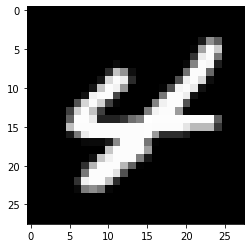

In [12]:
plt.imshow(img)

In [13]:
import os

#print(os.getcwd())
os.chdir('C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits/Images/train/')
png_files = os.listdir()
os.chdir('C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits')
#print(os.getcwd())
#print(png_files)

In [14]:
train_data = pd.read_csv('train.csv')
train_data.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [15]:
train_labels = train_data['label'].values

In [16]:
import glob   
train_images = []
train_images_filename = []
train_path = glob.glob('C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits/Images/train/*.png')
i=0
for i in train_path:
    image = cv2.imread(i)
    train_images.append(image)
    train_images_filename.append(os.path.basename(i))
    
train_images = np.array(train_images)
train_images_filename = np.array(train_images_filename)
print(train_images)
print(train_images.shape)
print(train_images_filename)
print(train_images_filename.shape)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [117]:
train_labels_new = []
for i in range(len(train_images_filename)):
#     print(train_images_filename[i])
    j=0
    for j in range(len(train_data)):
        if train_images_filename[i] == train_data.filename[j]:
            train_labels_new.append(train_data.label[j])    
            print('after match : ', train_data.filename[j], ' : ' , train_images_filename[i] )
            train_data.drop(train_data[train_data['filename'] == train_data['filename'][j]].index, inplace=True)
            train_data = train_data.reset_index(drop=True)           
            break

after match :  0.png  :  0.png
after match :  1.png  :  1.png
after match :  10.png  :  10.png
after match :  100.png  :  100.png
after match :  1000.png  :  1000.png
after match :  10000.png  :  10000.png
after match :  10001.png  :  10001.png
after match :  10002.png  :  10002.png
after match :  10003.png  :  10003.png
after match :  10004.png  :  10004.png
after match :  10005.png  :  10005.png
after match :  10006.png  :  10006.png
after match :  10007.png  :  10007.png
after match :  10008.png  :  10008.png
after match :  10009.png  :  10009.png
after match :  1001.png  :  1001.png
after match :  10010.png  :  10010.png
after match :  10011.png  :  10011.png
after match :  10012.png  :  10012.png
after match :  10013.png  :  10013.png
after match :  10014.png  :  10014.png
after match :  10015.png  :  10015.png
after match :  10016.png  :  10016.png
after match :  10017.png  :  10017.png
after match :  10018.png  :  10018.png
after match :  10019.png  :  10019.png
after match :  1

after match :  10188.png  :  10188.png
after match :  10189.png  :  10189.png
after match :  1019.png  :  1019.png
after match :  10190.png  :  10190.png
after match :  10191.png  :  10191.png
after match :  10192.png  :  10192.png
after match :  10193.png  :  10193.png
after match :  10194.png  :  10194.png
after match :  10195.png  :  10195.png
after match :  10196.png  :  10196.png
after match :  10197.png  :  10197.png
after match :  10198.png  :  10198.png
after match :  10199.png  :  10199.png
after match :  102.png  :  102.png
after match :  1020.png  :  1020.png
after match :  10200.png  :  10200.png
after match :  10201.png  :  10201.png
after match :  10202.png  :  10202.png
after match :  10203.png  :  10203.png
after match :  10204.png  :  10204.png
after match :  10205.png  :  10205.png
after match :  10206.png  :  10206.png
after match :  10207.png  :  10207.png
after match :  10208.png  :  10208.png
after match :  10209.png  :  10209.png
after match :  1021.png  :  1021.

after match :  10379.png  :  10379.png
after match :  1038.png  :  1038.png
after match :  10380.png  :  10380.png
after match :  10381.png  :  10381.png
after match :  10382.png  :  10382.png
after match :  10383.png  :  10383.png
after match :  10384.png  :  10384.png
after match :  10385.png  :  10385.png
after match :  10386.png  :  10386.png
after match :  10387.png  :  10387.png
after match :  10388.png  :  10388.png
after match :  10389.png  :  10389.png
after match :  1039.png  :  1039.png
after match :  10390.png  :  10390.png
after match :  10391.png  :  10391.png
after match :  10392.png  :  10392.png
after match :  10393.png  :  10393.png
after match :  10394.png  :  10394.png
after match :  10395.png  :  10395.png
after match :  10396.png  :  10396.png
after match :  10397.png  :  10397.png
after match :  10398.png  :  10398.png
after match :  10399.png  :  10399.png
after match :  104.png  :  104.png
after match :  1040.png  :  1040.png
after match :  10400.png  :  10400.

after match :  10570.png  :  10570.png
after match :  10571.png  :  10571.png
after match :  10572.png  :  10572.png
after match :  10573.png  :  10573.png
after match :  10574.png  :  10574.png
after match :  10575.png  :  10575.png
after match :  10576.png  :  10576.png
after match :  10577.png  :  10577.png
after match :  10578.png  :  10578.png
after match :  10579.png  :  10579.png
after match :  1058.png  :  1058.png
after match :  10580.png  :  10580.png
after match :  10581.png  :  10581.png
after match :  10582.png  :  10582.png
after match :  10583.png  :  10583.png
after match :  10584.png  :  10584.png
after match :  10585.png  :  10585.png
after match :  10586.png  :  10586.png
after match :  10587.png  :  10587.png
after match :  10588.png  :  10588.png
after match :  10589.png  :  10589.png
after match :  1059.png  :  1059.png
after match :  10590.png  :  10590.png
after match :  10591.png  :  10591.png
after match :  10592.png  :  10592.png
after match :  10593.png  :  

after match :  10761.png  :  10761.png
after match :  10762.png  :  10762.png
after match :  10763.png  :  10763.png
after match :  10764.png  :  10764.png
after match :  10765.png  :  10765.png
after match :  10766.png  :  10766.png
after match :  10767.png  :  10767.png
after match :  10768.png  :  10768.png
after match :  10769.png  :  10769.png
after match :  1077.png  :  1077.png
after match :  10770.png  :  10770.png
after match :  10771.png  :  10771.png
after match :  10772.png  :  10772.png
after match :  10773.png  :  10773.png
after match :  10774.png  :  10774.png
after match :  10775.png  :  10775.png
after match :  10776.png  :  10776.png
after match :  10777.png  :  10777.png
after match :  10778.png  :  10778.png
after match :  10779.png  :  10779.png
after match :  1078.png  :  1078.png
after match :  10780.png  :  10780.png
after match :  10781.png  :  10781.png
after match :  10782.png  :  10782.png
after match :  10783.png  :  10783.png
after match :  10784.png  :  

after match :  10952.png  :  10952.png
after match :  10953.png  :  10953.png
after match :  10954.png  :  10954.png
after match :  10955.png  :  10955.png
after match :  10956.png  :  10956.png
after match :  10957.png  :  10957.png
after match :  10958.png  :  10958.png
after match :  10959.png  :  10959.png
after match :  1096.png  :  1096.png
after match :  10960.png  :  10960.png
after match :  10961.png  :  10961.png
after match :  10962.png  :  10962.png
after match :  10963.png  :  10963.png
after match :  10964.png  :  10964.png
after match :  10965.png  :  10965.png
after match :  10966.png  :  10966.png
after match :  10967.png  :  10967.png
after match :  10968.png  :  10968.png
after match :  10969.png  :  10969.png
after match :  1097.png  :  1097.png
after match :  10970.png  :  10970.png
after match :  10971.png  :  10971.png
after match :  10972.png  :  10972.png
after match :  10973.png  :  10973.png
after match :  10974.png  :  10974.png
after match :  10975.png  :  

after match :  11142.png  :  11142.png
after match :  11143.png  :  11143.png
after match :  11144.png  :  11144.png
after match :  11145.png  :  11145.png
after match :  11146.png  :  11146.png
after match :  11147.png  :  11147.png
after match :  11148.png  :  11148.png
after match :  11149.png  :  11149.png
after match :  1115.png  :  1115.png
after match :  11150.png  :  11150.png
after match :  11151.png  :  11151.png
after match :  11152.png  :  11152.png
after match :  11153.png  :  11153.png
after match :  11154.png  :  11154.png
after match :  11155.png  :  11155.png
after match :  11156.png  :  11156.png
after match :  11157.png  :  11157.png
after match :  11158.png  :  11158.png
after match :  11159.png  :  11159.png
after match :  1116.png  :  1116.png
after match :  11160.png  :  11160.png
after match :  11161.png  :  11161.png
after match :  11162.png  :  11162.png
after match :  11163.png  :  11163.png
after match :  11164.png  :  11164.png
after match :  11165.png  :  

after match :  11333.png  :  11333.png
after match :  11334.png  :  11334.png
after match :  11335.png  :  11335.png
after match :  11336.png  :  11336.png
after match :  11337.png  :  11337.png
after match :  11338.png  :  11338.png
after match :  11339.png  :  11339.png
after match :  1134.png  :  1134.png
after match :  11340.png  :  11340.png
after match :  11341.png  :  11341.png
after match :  11342.png  :  11342.png
after match :  11343.png  :  11343.png
after match :  11344.png  :  11344.png
after match :  11345.png  :  11345.png
after match :  11346.png  :  11346.png
after match :  11347.png  :  11347.png
after match :  11348.png  :  11348.png
after match :  11349.png  :  11349.png
after match :  1135.png  :  1135.png
after match :  11350.png  :  11350.png
after match :  11351.png  :  11351.png
after match :  11352.png  :  11352.png
after match :  11353.png  :  11353.png
after match :  11354.png  :  11354.png
after match :  11355.png  :  11355.png
after match :  11356.png  :  

after match :  11524.png  :  11524.png
after match :  11525.png  :  11525.png
after match :  11526.png  :  11526.png
after match :  11527.png  :  11527.png
after match :  11528.png  :  11528.png
after match :  11529.png  :  11529.png
after match :  1153.png  :  1153.png
after match :  11530.png  :  11530.png
after match :  11531.png  :  11531.png
after match :  11532.png  :  11532.png
after match :  11533.png  :  11533.png
after match :  11534.png  :  11534.png
after match :  11535.png  :  11535.png
after match :  11536.png  :  11536.png
after match :  11537.png  :  11537.png
after match :  11538.png  :  11538.png
after match :  11539.png  :  11539.png
after match :  1154.png  :  1154.png
after match :  11540.png  :  11540.png
after match :  11541.png  :  11541.png
after match :  11542.png  :  11542.png
after match :  11543.png  :  11543.png
after match :  11544.png  :  11544.png
after match :  11545.png  :  11545.png
after match :  11546.png  :  11546.png
after match :  11547.png  :  

after match :  11715.png  :  11715.png
after match :  11716.png  :  11716.png
after match :  11717.png  :  11717.png
after match :  11718.png  :  11718.png
after match :  11719.png  :  11719.png
after match :  1172.png  :  1172.png
after match :  11720.png  :  11720.png
after match :  11721.png  :  11721.png
after match :  11722.png  :  11722.png
after match :  11723.png  :  11723.png
after match :  11724.png  :  11724.png
after match :  11725.png  :  11725.png
after match :  11726.png  :  11726.png
after match :  11727.png  :  11727.png
after match :  11728.png  :  11728.png
after match :  11729.png  :  11729.png
after match :  1173.png  :  1173.png
after match :  11730.png  :  11730.png
after match :  11731.png  :  11731.png
after match :  11732.png  :  11732.png
after match :  11733.png  :  11733.png
after match :  11734.png  :  11734.png
after match :  11735.png  :  11735.png
after match :  11736.png  :  11736.png
after match :  11737.png  :  11737.png
after match :  11738.png  :  

after match :  11906.png  :  11906.png
after match :  11907.png  :  11907.png
after match :  11908.png  :  11908.png
after match :  11909.png  :  11909.png
after match :  1191.png  :  1191.png
after match :  11910.png  :  11910.png
after match :  11911.png  :  11911.png
after match :  11912.png  :  11912.png
after match :  11913.png  :  11913.png
after match :  11914.png  :  11914.png
after match :  11915.png  :  11915.png
after match :  11916.png  :  11916.png
after match :  11917.png  :  11917.png
after match :  11918.png  :  11918.png
after match :  11919.png  :  11919.png
after match :  1192.png  :  1192.png
after match :  11920.png  :  11920.png
after match :  11921.png  :  11921.png
after match :  11922.png  :  11922.png
after match :  11923.png  :  11923.png
after match :  11924.png  :  11924.png
after match :  11925.png  :  11925.png
after match :  11926.png  :  11926.png
after match :  11927.png  :  11927.png
after match :  11928.png  :  11928.png
after match :  11929.png  :  

after match :  12097.png  :  12097.png
after match :  12098.png  :  12098.png
after match :  12099.png  :  12099.png
after match :  121.png  :  121.png
after match :  1210.png  :  1210.png
after match :  12100.png  :  12100.png
after match :  12101.png  :  12101.png
after match :  12102.png  :  12102.png
after match :  12103.png  :  12103.png
after match :  12104.png  :  12104.png
after match :  12105.png  :  12105.png
after match :  12106.png  :  12106.png
after match :  12107.png  :  12107.png
after match :  12108.png  :  12108.png
after match :  12109.png  :  12109.png
after match :  1211.png  :  1211.png
after match :  12110.png  :  12110.png
after match :  12111.png  :  12111.png
after match :  12112.png  :  12112.png
after match :  12113.png  :  12113.png
after match :  12114.png  :  12114.png
after match :  12115.png  :  12115.png
after match :  12116.png  :  12116.png
after match :  12117.png  :  12117.png
after match :  12118.png  :  12118.png
after match :  12119.png  :  1211

after match :  12288.png  :  12288.png
after match :  12289.png  :  12289.png
after match :  1229.png  :  1229.png
after match :  12290.png  :  12290.png
after match :  12291.png  :  12291.png
after match :  12292.png  :  12292.png
after match :  12293.png  :  12293.png
after match :  12294.png  :  12294.png
after match :  12295.png  :  12295.png
after match :  12296.png  :  12296.png
after match :  12297.png  :  12297.png
after match :  12298.png  :  12298.png
after match :  12299.png  :  12299.png
after match :  123.png  :  123.png
after match :  1230.png  :  1230.png
after match :  12300.png  :  12300.png
after match :  12301.png  :  12301.png
after match :  12302.png  :  12302.png
after match :  12303.png  :  12303.png
after match :  12304.png  :  12304.png
after match :  12305.png  :  12305.png
after match :  12306.png  :  12306.png
after match :  12307.png  :  12307.png
after match :  12308.png  :  12308.png
after match :  12309.png  :  12309.png
after match :  1231.png  :  1231.

after match :  12479.png  :  12479.png
after match :  1248.png  :  1248.png
after match :  12480.png  :  12480.png
after match :  12481.png  :  12481.png
after match :  12482.png  :  12482.png
after match :  12483.png  :  12483.png
after match :  12484.png  :  12484.png
after match :  12485.png  :  12485.png
after match :  12486.png  :  12486.png
after match :  12487.png  :  12487.png
after match :  12488.png  :  12488.png
after match :  12489.png  :  12489.png
after match :  1249.png  :  1249.png
after match :  12490.png  :  12490.png
after match :  12491.png  :  12491.png
after match :  12492.png  :  12492.png
after match :  12493.png  :  12493.png
after match :  12494.png  :  12494.png
after match :  12495.png  :  12495.png
after match :  12496.png  :  12496.png
after match :  12497.png  :  12497.png
after match :  12498.png  :  12498.png
after match :  12499.png  :  12499.png
after match :  125.png  :  125.png
after match :  1250.png  :  1250.png
after match :  12500.png  :  12500.

after match :  12670.png  :  12670.png
after match :  12671.png  :  12671.png
after match :  12672.png  :  12672.png
after match :  12673.png  :  12673.png
after match :  12674.png  :  12674.png
after match :  12675.png  :  12675.png
after match :  12676.png  :  12676.png
after match :  12677.png  :  12677.png
after match :  12678.png  :  12678.png
after match :  12679.png  :  12679.png
after match :  1268.png  :  1268.png
after match :  12680.png  :  12680.png
after match :  12681.png  :  12681.png
after match :  12682.png  :  12682.png
after match :  12683.png  :  12683.png
after match :  12684.png  :  12684.png
after match :  12685.png  :  12685.png
after match :  12686.png  :  12686.png
after match :  12687.png  :  12687.png
after match :  12688.png  :  12688.png
after match :  12689.png  :  12689.png
after match :  1269.png  :  1269.png
after match :  12690.png  :  12690.png
after match :  12691.png  :  12691.png
after match :  12692.png  :  12692.png
after match :  12693.png  :  

after match :  12861.png  :  12861.png
after match :  12862.png  :  12862.png
after match :  12863.png  :  12863.png
after match :  12864.png  :  12864.png
after match :  12865.png  :  12865.png
after match :  12866.png  :  12866.png
after match :  12867.png  :  12867.png
after match :  12868.png  :  12868.png
after match :  12869.png  :  12869.png
after match :  1287.png  :  1287.png
after match :  12870.png  :  12870.png
after match :  12871.png  :  12871.png
after match :  12872.png  :  12872.png
after match :  12873.png  :  12873.png
after match :  12874.png  :  12874.png
after match :  12875.png  :  12875.png
after match :  12876.png  :  12876.png
after match :  12877.png  :  12877.png
after match :  12878.png  :  12878.png
after match :  12879.png  :  12879.png
after match :  1288.png  :  1288.png
after match :  12880.png  :  12880.png
after match :  12881.png  :  12881.png
after match :  12882.png  :  12882.png
after match :  12883.png  :  12883.png
after match :  12884.png  :  

after match :  13051.png  :  13051.png
after match :  13052.png  :  13052.png
after match :  13053.png  :  13053.png
after match :  13054.png  :  13054.png
after match :  13055.png  :  13055.png
after match :  13056.png  :  13056.png
after match :  13057.png  :  13057.png
after match :  13058.png  :  13058.png
after match :  13059.png  :  13059.png
after match :  1306.png  :  1306.png
after match :  13060.png  :  13060.png
after match :  13061.png  :  13061.png
after match :  13062.png  :  13062.png
after match :  13063.png  :  13063.png
after match :  13064.png  :  13064.png
after match :  13065.png  :  13065.png
after match :  13066.png  :  13066.png
after match :  13067.png  :  13067.png
after match :  13068.png  :  13068.png
after match :  13069.png  :  13069.png
after match :  1307.png  :  1307.png
after match :  13070.png  :  13070.png
after match :  13071.png  :  13071.png
after match :  13072.png  :  13072.png
after match :  13073.png  :  13073.png
after match :  13074.png  :  

after match :  13242.png  :  13242.png
after match :  13243.png  :  13243.png
after match :  13244.png  :  13244.png
after match :  13245.png  :  13245.png
after match :  13246.png  :  13246.png
after match :  13247.png  :  13247.png
after match :  13248.png  :  13248.png
after match :  13249.png  :  13249.png
after match :  1325.png  :  1325.png
after match :  13250.png  :  13250.png
after match :  13251.png  :  13251.png
after match :  13252.png  :  13252.png
after match :  13253.png  :  13253.png
after match :  13254.png  :  13254.png
after match :  13255.png  :  13255.png
after match :  13256.png  :  13256.png
after match :  13257.png  :  13257.png
after match :  13258.png  :  13258.png
after match :  13259.png  :  13259.png
after match :  1326.png  :  1326.png
after match :  13260.png  :  13260.png
after match :  13261.png  :  13261.png
after match :  13262.png  :  13262.png
after match :  13263.png  :  13263.png
after match :  13264.png  :  13264.png
after match :  13265.png  :  

after match :  13433.png  :  13433.png
after match :  13434.png  :  13434.png
after match :  13435.png  :  13435.png
after match :  13436.png  :  13436.png
after match :  13437.png  :  13437.png
after match :  13438.png  :  13438.png
after match :  13439.png  :  13439.png
after match :  1344.png  :  1344.png
after match :  13440.png  :  13440.png
after match :  13441.png  :  13441.png
after match :  13442.png  :  13442.png
after match :  13443.png  :  13443.png
after match :  13444.png  :  13444.png
after match :  13445.png  :  13445.png
after match :  13446.png  :  13446.png
after match :  13447.png  :  13447.png
after match :  13448.png  :  13448.png
after match :  13449.png  :  13449.png
after match :  1345.png  :  1345.png
after match :  13450.png  :  13450.png
after match :  13451.png  :  13451.png
after match :  13452.png  :  13452.png
after match :  13453.png  :  13453.png
after match :  13454.png  :  13454.png
after match :  13455.png  :  13455.png
after match :  13456.png  :  

after match :  13624.png  :  13624.png
after match :  13625.png  :  13625.png
after match :  13626.png  :  13626.png
after match :  13627.png  :  13627.png
after match :  13628.png  :  13628.png
after match :  13629.png  :  13629.png
after match :  1363.png  :  1363.png
after match :  13630.png  :  13630.png
after match :  13631.png  :  13631.png
after match :  13632.png  :  13632.png
after match :  13633.png  :  13633.png
after match :  13634.png  :  13634.png
after match :  13635.png  :  13635.png
after match :  13636.png  :  13636.png
after match :  13637.png  :  13637.png
after match :  13638.png  :  13638.png
after match :  13639.png  :  13639.png
after match :  1364.png  :  1364.png
after match :  13640.png  :  13640.png
after match :  13641.png  :  13641.png
after match :  13642.png  :  13642.png
after match :  13643.png  :  13643.png
after match :  13644.png  :  13644.png
after match :  13645.png  :  13645.png
after match :  13646.png  :  13646.png
after match :  13647.png  :  

after match :  13815.png  :  13815.png
after match :  13816.png  :  13816.png
after match :  13817.png  :  13817.png
after match :  13818.png  :  13818.png
after match :  13819.png  :  13819.png
after match :  1382.png  :  1382.png
after match :  13820.png  :  13820.png
after match :  13821.png  :  13821.png
after match :  13822.png  :  13822.png
after match :  13823.png  :  13823.png
after match :  13824.png  :  13824.png
after match :  13825.png  :  13825.png
after match :  13826.png  :  13826.png
after match :  13827.png  :  13827.png
after match :  13828.png  :  13828.png
after match :  13829.png  :  13829.png
after match :  1383.png  :  1383.png
after match :  13830.png  :  13830.png
after match :  13831.png  :  13831.png
after match :  13832.png  :  13832.png
after match :  13833.png  :  13833.png
after match :  13834.png  :  13834.png
after match :  13835.png  :  13835.png
after match :  13836.png  :  13836.png
after match :  13837.png  :  13837.png
after match :  13838.png  :  

after match :  14005.png  :  14005.png
after match :  14006.png  :  14006.png
after match :  14007.png  :  14007.png
after match :  14008.png  :  14008.png
after match :  14009.png  :  14009.png
after match :  1401.png  :  1401.png
after match :  14010.png  :  14010.png
after match :  14011.png  :  14011.png
after match :  14012.png  :  14012.png
after match :  14013.png  :  14013.png
after match :  14014.png  :  14014.png
after match :  14015.png  :  14015.png
after match :  14016.png  :  14016.png
after match :  14017.png  :  14017.png
after match :  14018.png  :  14018.png
after match :  14019.png  :  14019.png
after match :  1402.png  :  1402.png
after match :  14020.png  :  14020.png
after match :  14021.png  :  14021.png
after match :  14022.png  :  14022.png
after match :  14023.png  :  14023.png
after match :  14024.png  :  14024.png
after match :  14025.png  :  14025.png
after match :  14026.png  :  14026.png
after match :  14027.png  :  14027.png
after match :  14028.png  :  

after match :  14197.png  :  14197.png
after match :  14198.png  :  14198.png
after match :  14199.png  :  14199.png
after match :  142.png  :  142.png
after match :  1420.png  :  1420.png
after match :  14200.png  :  14200.png
after match :  14201.png  :  14201.png
after match :  14202.png  :  14202.png
after match :  14203.png  :  14203.png
after match :  14204.png  :  14204.png
after match :  14205.png  :  14205.png
after match :  14206.png  :  14206.png
after match :  14207.png  :  14207.png
after match :  14208.png  :  14208.png
after match :  14209.png  :  14209.png
after match :  1421.png  :  1421.png
after match :  14210.png  :  14210.png
after match :  14211.png  :  14211.png
after match :  14212.png  :  14212.png
after match :  14213.png  :  14213.png
after match :  14214.png  :  14214.png
after match :  14215.png  :  14215.png
after match :  14216.png  :  14216.png
after match :  14217.png  :  14217.png
after match :  14218.png  :  14218.png
after match :  14219.png  :  1421

after match :  14388.png  :  14388.png
after match :  14389.png  :  14389.png
after match :  1439.png  :  1439.png
after match :  14390.png  :  14390.png
after match :  14391.png  :  14391.png
after match :  14392.png  :  14392.png
after match :  14393.png  :  14393.png
after match :  14394.png  :  14394.png
after match :  14395.png  :  14395.png
after match :  14396.png  :  14396.png
after match :  14397.png  :  14397.png
after match :  14398.png  :  14398.png
after match :  14399.png  :  14399.png
after match :  144.png  :  144.png
after match :  1440.png  :  1440.png
after match :  14400.png  :  14400.png
after match :  14401.png  :  14401.png
after match :  14402.png  :  14402.png
after match :  14403.png  :  14403.png
after match :  14404.png  :  14404.png
after match :  14405.png  :  14405.png
after match :  14406.png  :  14406.png
after match :  14407.png  :  14407.png
after match :  14408.png  :  14408.png
after match :  14409.png  :  14409.png
after match :  1441.png  :  1441.

after match :  14579.png  :  14579.png
after match :  1458.png  :  1458.png
after match :  14580.png  :  14580.png
after match :  14581.png  :  14581.png
after match :  14582.png  :  14582.png
after match :  14583.png  :  14583.png
after match :  14584.png  :  14584.png
after match :  14585.png  :  14585.png
after match :  14586.png  :  14586.png
after match :  14587.png  :  14587.png
after match :  14588.png  :  14588.png
after match :  14589.png  :  14589.png
after match :  1459.png  :  1459.png
after match :  14590.png  :  14590.png
after match :  14591.png  :  14591.png
after match :  14592.png  :  14592.png
after match :  14593.png  :  14593.png
after match :  14594.png  :  14594.png
after match :  14595.png  :  14595.png
after match :  14596.png  :  14596.png
after match :  14597.png  :  14597.png
after match :  14598.png  :  14598.png
after match :  14599.png  :  14599.png
after match :  146.png  :  146.png
after match :  1460.png  :  1460.png
after match :  14600.png  :  14600.

after match :  14770.png  :  14770.png
after match :  14771.png  :  14771.png
after match :  14772.png  :  14772.png
after match :  14773.png  :  14773.png
after match :  14774.png  :  14774.png
after match :  14775.png  :  14775.png
after match :  14776.png  :  14776.png
after match :  14777.png  :  14777.png
after match :  14778.png  :  14778.png
after match :  14779.png  :  14779.png
after match :  1478.png  :  1478.png
after match :  14780.png  :  14780.png
after match :  14781.png  :  14781.png
after match :  14782.png  :  14782.png
after match :  14783.png  :  14783.png
after match :  14784.png  :  14784.png
after match :  14785.png  :  14785.png
after match :  14786.png  :  14786.png
after match :  14787.png  :  14787.png
after match :  14788.png  :  14788.png
after match :  14789.png  :  14789.png
after match :  1479.png  :  1479.png
after match :  14790.png  :  14790.png
after match :  14791.png  :  14791.png
after match :  14792.png  :  14792.png
after match :  14793.png  :  

after match :  14961.png  :  14961.png
after match :  14962.png  :  14962.png
after match :  14963.png  :  14963.png
after match :  14964.png  :  14964.png
after match :  14965.png  :  14965.png
after match :  14966.png  :  14966.png
after match :  14967.png  :  14967.png
after match :  14968.png  :  14968.png
after match :  14969.png  :  14969.png
after match :  1497.png  :  1497.png
after match :  14970.png  :  14970.png
after match :  14971.png  :  14971.png
after match :  14972.png  :  14972.png
after match :  14973.png  :  14973.png
after match :  14974.png  :  14974.png
after match :  14975.png  :  14975.png
after match :  14976.png  :  14976.png
after match :  14977.png  :  14977.png
after match :  14978.png  :  14978.png
after match :  14979.png  :  14979.png
after match :  1498.png  :  1498.png
after match :  14980.png  :  14980.png
after match :  14981.png  :  14981.png
after match :  14982.png  :  14982.png
after match :  14983.png  :  14983.png
after match :  14984.png  :  

after match :  15151.png  :  15151.png
after match :  15152.png  :  15152.png
after match :  15153.png  :  15153.png
after match :  15154.png  :  15154.png
after match :  15155.png  :  15155.png
after match :  15156.png  :  15156.png
after match :  15157.png  :  15157.png
after match :  15158.png  :  15158.png
after match :  15159.png  :  15159.png
after match :  1516.png  :  1516.png
after match :  15160.png  :  15160.png
after match :  15161.png  :  15161.png
after match :  15162.png  :  15162.png
after match :  15163.png  :  15163.png
after match :  15164.png  :  15164.png
after match :  15165.png  :  15165.png
after match :  15166.png  :  15166.png
after match :  15167.png  :  15167.png
after match :  15168.png  :  15168.png
after match :  15169.png  :  15169.png
after match :  1517.png  :  1517.png
after match :  15170.png  :  15170.png
after match :  15171.png  :  15171.png
after match :  15172.png  :  15172.png
after match :  15173.png  :  15173.png
after match :  15174.png  :  

after match :  15342.png  :  15342.png
after match :  15343.png  :  15343.png
after match :  15344.png  :  15344.png
after match :  15345.png  :  15345.png
after match :  15346.png  :  15346.png
after match :  15347.png  :  15347.png
after match :  15348.png  :  15348.png
after match :  15349.png  :  15349.png
after match :  1535.png  :  1535.png
after match :  15350.png  :  15350.png
after match :  15351.png  :  15351.png
after match :  15352.png  :  15352.png
after match :  15353.png  :  15353.png
after match :  15354.png  :  15354.png
after match :  15355.png  :  15355.png
after match :  15356.png  :  15356.png
after match :  15357.png  :  15357.png
after match :  15358.png  :  15358.png
after match :  15359.png  :  15359.png
after match :  1536.png  :  1536.png
after match :  15360.png  :  15360.png
after match :  15361.png  :  15361.png
after match :  15362.png  :  15362.png
after match :  15363.png  :  15363.png
after match :  15364.png  :  15364.png
after match :  15365.png  :  

after match :  15533.png  :  15533.png
after match :  15534.png  :  15534.png
after match :  15535.png  :  15535.png
after match :  15536.png  :  15536.png
after match :  15537.png  :  15537.png
after match :  15538.png  :  15538.png
after match :  15539.png  :  15539.png
after match :  1554.png  :  1554.png
after match :  15540.png  :  15540.png
after match :  15541.png  :  15541.png
after match :  15542.png  :  15542.png
after match :  15543.png  :  15543.png
after match :  15544.png  :  15544.png
after match :  15545.png  :  15545.png
after match :  15546.png  :  15546.png
after match :  15547.png  :  15547.png
after match :  15548.png  :  15548.png
after match :  15549.png  :  15549.png
after match :  1555.png  :  1555.png
after match :  15550.png  :  15550.png
after match :  15551.png  :  15551.png
after match :  15552.png  :  15552.png
after match :  15553.png  :  15553.png
after match :  15554.png  :  15554.png
after match :  15555.png  :  15555.png
after match :  15556.png  :  

after match :  15724.png  :  15724.png
after match :  15725.png  :  15725.png
after match :  15726.png  :  15726.png
after match :  15727.png  :  15727.png
after match :  15728.png  :  15728.png
after match :  15729.png  :  15729.png
after match :  1573.png  :  1573.png
after match :  15730.png  :  15730.png
after match :  15731.png  :  15731.png
after match :  15732.png  :  15732.png
after match :  15733.png  :  15733.png
after match :  15734.png  :  15734.png
after match :  15735.png  :  15735.png
after match :  15736.png  :  15736.png
after match :  15737.png  :  15737.png
after match :  15738.png  :  15738.png
after match :  15739.png  :  15739.png
after match :  1574.png  :  1574.png
after match :  15740.png  :  15740.png
after match :  15741.png  :  15741.png
after match :  15742.png  :  15742.png
after match :  15743.png  :  15743.png
after match :  15744.png  :  15744.png
after match :  15745.png  :  15745.png
after match :  15746.png  :  15746.png
after match :  15747.png  :  

after match :  15915.png  :  15915.png
after match :  15916.png  :  15916.png
after match :  15917.png  :  15917.png
after match :  15918.png  :  15918.png
after match :  15919.png  :  15919.png
after match :  1592.png  :  1592.png
after match :  15920.png  :  15920.png
after match :  15921.png  :  15921.png
after match :  15922.png  :  15922.png
after match :  15923.png  :  15923.png
after match :  15924.png  :  15924.png
after match :  15925.png  :  15925.png
after match :  15926.png  :  15926.png
after match :  15927.png  :  15927.png
after match :  15928.png  :  15928.png
after match :  15929.png  :  15929.png
after match :  1593.png  :  1593.png
after match :  15930.png  :  15930.png
after match :  15931.png  :  15931.png
after match :  15932.png  :  15932.png
after match :  15933.png  :  15933.png
after match :  15934.png  :  15934.png
after match :  15935.png  :  15935.png
after match :  15936.png  :  15936.png
after match :  15937.png  :  15937.png
after match :  15938.png  :  

after match :  16105.png  :  16105.png
after match :  16106.png  :  16106.png
after match :  16107.png  :  16107.png
after match :  16108.png  :  16108.png
after match :  16109.png  :  16109.png
after match :  1611.png  :  1611.png
after match :  16110.png  :  16110.png
after match :  16111.png  :  16111.png
after match :  16112.png  :  16112.png
after match :  16113.png  :  16113.png
after match :  16114.png  :  16114.png
after match :  16115.png  :  16115.png
after match :  16116.png  :  16116.png
after match :  16117.png  :  16117.png
after match :  16118.png  :  16118.png
after match :  16119.png  :  16119.png
after match :  1612.png  :  1612.png
after match :  16120.png  :  16120.png
after match :  16121.png  :  16121.png
after match :  16122.png  :  16122.png
after match :  16123.png  :  16123.png
after match :  16124.png  :  16124.png
after match :  16125.png  :  16125.png
after match :  16126.png  :  16126.png
after match :  16127.png  :  16127.png
after match :  16128.png  :  

after match :  16297.png  :  16297.png
after match :  16298.png  :  16298.png
after match :  16299.png  :  16299.png
after match :  163.png  :  163.png
after match :  1630.png  :  1630.png
after match :  16300.png  :  16300.png
after match :  16301.png  :  16301.png
after match :  16302.png  :  16302.png
after match :  16303.png  :  16303.png
after match :  16304.png  :  16304.png
after match :  16305.png  :  16305.png
after match :  16306.png  :  16306.png
after match :  16307.png  :  16307.png
after match :  16308.png  :  16308.png
after match :  16309.png  :  16309.png
after match :  1631.png  :  1631.png
after match :  16310.png  :  16310.png
after match :  16311.png  :  16311.png
after match :  16312.png  :  16312.png
after match :  16313.png  :  16313.png
after match :  16314.png  :  16314.png
after match :  16315.png  :  16315.png
after match :  16316.png  :  16316.png
after match :  16317.png  :  16317.png
after match :  16318.png  :  16318.png
after match :  16319.png  :  1631

after match :  16488.png  :  16488.png
after match :  16489.png  :  16489.png
after match :  1649.png  :  1649.png
after match :  16490.png  :  16490.png
after match :  16491.png  :  16491.png
after match :  16492.png  :  16492.png
after match :  16493.png  :  16493.png
after match :  16494.png  :  16494.png
after match :  16495.png  :  16495.png
after match :  16496.png  :  16496.png
after match :  16497.png  :  16497.png
after match :  16498.png  :  16498.png
after match :  16499.png  :  16499.png
after match :  165.png  :  165.png
after match :  1650.png  :  1650.png
after match :  16500.png  :  16500.png
after match :  16501.png  :  16501.png
after match :  16502.png  :  16502.png
after match :  16503.png  :  16503.png
after match :  16504.png  :  16504.png
after match :  16505.png  :  16505.png
after match :  16506.png  :  16506.png
after match :  16507.png  :  16507.png
after match :  16508.png  :  16508.png
after match :  16509.png  :  16509.png
after match :  1651.png  :  1651.

after match :  16679.png  :  16679.png
after match :  1668.png  :  1668.png
after match :  16680.png  :  16680.png
after match :  16681.png  :  16681.png
after match :  16682.png  :  16682.png
after match :  16683.png  :  16683.png
after match :  16684.png  :  16684.png
after match :  16685.png  :  16685.png
after match :  16686.png  :  16686.png
after match :  16687.png  :  16687.png
after match :  16688.png  :  16688.png
after match :  16689.png  :  16689.png
after match :  1669.png  :  1669.png
after match :  16690.png  :  16690.png
after match :  16691.png  :  16691.png
after match :  16692.png  :  16692.png
after match :  16693.png  :  16693.png
after match :  16694.png  :  16694.png
after match :  16695.png  :  16695.png
after match :  16696.png  :  16696.png
after match :  16697.png  :  16697.png
after match :  16698.png  :  16698.png
after match :  16699.png  :  16699.png
after match :  167.png  :  167.png
after match :  1670.png  :  1670.png
after match :  16700.png  :  16700.

after match :  16870.png  :  16870.png
after match :  16871.png  :  16871.png
after match :  16872.png  :  16872.png
after match :  16873.png  :  16873.png
after match :  16874.png  :  16874.png
after match :  16875.png  :  16875.png
after match :  16876.png  :  16876.png
after match :  16877.png  :  16877.png
after match :  16878.png  :  16878.png
after match :  16879.png  :  16879.png
after match :  1688.png  :  1688.png
after match :  16880.png  :  16880.png
after match :  16881.png  :  16881.png
after match :  16882.png  :  16882.png
after match :  16883.png  :  16883.png
after match :  16884.png  :  16884.png
after match :  16885.png  :  16885.png
after match :  16886.png  :  16886.png
after match :  16887.png  :  16887.png
after match :  16888.png  :  16888.png
after match :  16889.png  :  16889.png
after match :  1689.png  :  1689.png
after match :  16890.png  :  16890.png
after match :  16891.png  :  16891.png
after match :  16892.png  :  16892.png
after match :  16893.png  :  

after match :  17060.png  :  17060.png
after match :  17061.png  :  17061.png
after match :  17062.png  :  17062.png
after match :  17063.png  :  17063.png
after match :  17064.png  :  17064.png
after match :  17065.png  :  17065.png
after match :  17066.png  :  17066.png
after match :  17067.png  :  17067.png
after match :  17068.png  :  17068.png
after match :  17069.png  :  17069.png
after match :  1707.png  :  1707.png
after match :  17070.png  :  17070.png
after match :  17071.png  :  17071.png
after match :  17072.png  :  17072.png
after match :  17073.png  :  17073.png
after match :  17074.png  :  17074.png
after match :  17075.png  :  17075.png
after match :  17076.png  :  17076.png
after match :  17077.png  :  17077.png
after match :  17078.png  :  17078.png
after match :  17079.png  :  17079.png
after match :  1708.png  :  1708.png
after match :  17080.png  :  17080.png
after match :  17081.png  :  17081.png
after match :  17082.png  :  17082.png
after match :  17083.png  :  

after match :  17251.png  :  17251.png
after match :  17252.png  :  17252.png
after match :  17253.png  :  17253.png
after match :  17254.png  :  17254.png
after match :  17255.png  :  17255.png
after match :  17256.png  :  17256.png
after match :  17257.png  :  17257.png
after match :  17258.png  :  17258.png
after match :  17259.png  :  17259.png
after match :  1726.png  :  1726.png
after match :  17260.png  :  17260.png
after match :  17261.png  :  17261.png
after match :  17262.png  :  17262.png
after match :  17263.png  :  17263.png
after match :  17264.png  :  17264.png
after match :  17265.png  :  17265.png
after match :  17266.png  :  17266.png
after match :  17267.png  :  17267.png
after match :  17268.png  :  17268.png
after match :  17269.png  :  17269.png
after match :  1727.png  :  1727.png
after match :  17270.png  :  17270.png
after match :  17271.png  :  17271.png
after match :  17272.png  :  17272.png
after match :  17273.png  :  17273.png
after match :  17274.png  :  

after match :  17442.png  :  17442.png
after match :  17443.png  :  17443.png
after match :  17444.png  :  17444.png
after match :  17445.png  :  17445.png
after match :  17446.png  :  17446.png
after match :  17447.png  :  17447.png
after match :  17448.png  :  17448.png
after match :  17449.png  :  17449.png
after match :  1745.png  :  1745.png
after match :  17450.png  :  17450.png
after match :  17451.png  :  17451.png
after match :  17452.png  :  17452.png
after match :  17453.png  :  17453.png
after match :  17454.png  :  17454.png
after match :  17455.png  :  17455.png
after match :  17456.png  :  17456.png
after match :  17457.png  :  17457.png
after match :  17458.png  :  17458.png
after match :  17459.png  :  17459.png
after match :  1746.png  :  1746.png
after match :  17460.png  :  17460.png
after match :  17461.png  :  17461.png
after match :  17462.png  :  17462.png
after match :  17463.png  :  17463.png
after match :  17464.png  :  17464.png
after match :  17465.png  :  

after match :  17633.png  :  17633.png
after match :  17634.png  :  17634.png
after match :  17635.png  :  17635.png
after match :  17636.png  :  17636.png
after match :  17637.png  :  17637.png
after match :  17638.png  :  17638.png
after match :  17639.png  :  17639.png
after match :  1764.png  :  1764.png
after match :  17640.png  :  17640.png
after match :  17641.png  :  17641.png
after match :  17642.png  :  17642.png
after match :  17643.png  :  17643.png
after match :  17644.png  :  17644.png
after match :  17645.png  :  17645.png
after match :  17646.png  :  17646.png
after match :  17647.png  :  17647.png
after match :  17648.png  :  17648.png
after match :  17649.png  :  17649.png
after match :  1765.png  :  1765.png
after match :  17650.png  :  17650.png
after match :  17651.png  :  17651.png
after match :  17652.png  :  17652.png
after match :  17653.png  :  17653.png
after match :  17654.png  :  17654.png
after match :  17655.png  :  17655.png
after match :  17656.png  :  

after match :  17824.png  :  17824.png
after match :  17825.png  :  17825.png
after match :  17826.png  :  17826.png
after match :  17827.png  :  17827.png
after match :  17828.png  :  17828.png
after match :  17829.png  :  17829.png
after match :  1783.png  :  1783.png
after match :  17830.png  :  17830.png
after match :  17831.png  :  17831.png
after match :  17832.png  :  17832.png
after match :  17833.png  :  17833.png
after match :  17834.png  :  17834.png
after match :  17835.png  :  17835.png
after match :  17836.png  :  17836.png
after match :  17837.png  :  17837.png
after match :  17838.png  :  17838.png
after match :  17839.png  :  17839.png
after match :  1784.png  :  1784.png
after match :  17840.png  :  17840.png
after match :  17841.png  :  17841.png
after match :  17842.png  :  17842.png
after match :  17843.png  :  17843.png
after match :  17844.png  :  17844.png
after match :  17845.png  :  17845.png
after match :  17846.png  :  17846.png
after match :  17847.png  :  

after match :  18014.png  :  18014.png
after match :  18015.png  :  18015.png
after match :  18016.png  :  18016.png
after match :  18017.png  :  18017.png
after match :  18018.png  :  18018.png
after match :  18019.png  :  18019.png
after match :  1802.png  :  1802.png
after match :  18020.png  :  18020.png
after match :  18021.png  :  18021.png
after match :  18022.png  :  18022.png
after match :  18023.png  :  18023.png
after match :  18024.png  :  18024.png
after match :  18025.png  :  18025.png
after match :  18026.png  :  18026.png
after match :  18027.png  :  18027.png
after match :  18028.png  :  18028.png
after match :  18029.png  :  18029.png
after match :  1803.png  :  1803.png
after match :  18030.png  :  18030.png
after match :  18031.png  :  18031.png
after match :  18032.png  :  18032.png
after match :  18033.png  :  18033.png
after match :  18034.png  :  18034.png
after match :  18035.png  :  18035.png
after match :  18036.png  :  18036.png
after match :  18037.png  :  

after match :  18205.png  :  18205.png
after match :  18206.png  :  18206.png
after match :  18207.png  :  18207.png
after match :  18208.png  :  18208.png
after match :  18209.png  :  18209.png
after match :  1821.png  :  1821.png
after match :  18210.png  :  18210.png
after match :  18211.png  :  18211.png
after match :  18212.png  :  18212.png
after match :  18213.png  :  18213.png
after match :  18214.png  :  18214.png
after match :  18215.png  :  18215.png
after match :  18216.png  :  18216.png
after match :  18217.png  :  18217.png
after match :  18218.png  :  18218.png
after match :  18219.png  :  18219.png
after match :  1822.png  :  1822.png
after match :  18220.png  :  18220.png
after match :  18221.png  :  18221.png
after match :  18222.png  :  18222.png
after match :  18223.png  :  18223.png
after match :  18224.png  :  18224.png
after match :  18225.png  :  18225.png
after match :  18226.png  :  18226.png
after match :  18227.png  :  18227.png
after match :  18228.png  :  

after match :  18397.png  :  18397.png
after match :  18398.png  :  18398.png
after match :  18399.png  :  18399.png
after match :  184.png  :  184.png
after match :  1840.png  :  1840.png
after match :  18400.png  :  18400.png
after match :  18401.png  :  18401.png
after match :  18402.png  :  18402.png
after match :  18403.png  :  18403.png
after match :  18404.png  :  18404.png
after match :  18405.png  :  18405.png
after match :  18406.png  :  18406.png
after match :  18407.png  :  18407.png
after match :  18408.png  :  18408.png
after match :  18409.png  :  18409.png
after match :  1841.png  :  1841.png
after match :  18410.png  :  18410.png
after match :  18411.png  :  18411.png
after match :  18412.png  :  18412.png
after match :  18413.png  :  18413.png
after match :  18414.png  :  18414.png
after match :  18415.png  :  18415.png
after match :  18416.png  :  18416.png
after match :  18417.png  :  18417.png
after match :  18418.png  :  18418.png
after match :  18419.png  :  1841

after match :  18588.png  :  18588.png
after match :  18589.png  :  18589.png
after match :  1859.png  :  1859.png
after match :  18590.png  :  18590.png
after match :  18591.png  :  18591.png
after match :  18592.png  :  18592.png
after match :  18593.png  :  18593.png
after match :  18594.png  :  18594.png
after match :  18595.png  :  18595.png
after match :  18596.png  :  18596.png
after match :  18597.png  :  18597.png
after match :  18598.png  :  18598.png
after match :  18599.png  :  18599.png
after match :  186.png  :  186.png
after match :  1860.png  :  1860.png
after match :  18600.png  :  18600.png
after match :  18601.png  :  18601.png
after match :  18602.png  :  18602.png
after match :  18603.png  :  18603.png
after match :  18604.png  :  18604.png
after match :  18605.png  :  18605.png
after match :  18606.png  :  18606.png
after match :  18607.png  :  18607.png
after match :  18608.png  :  18608.png
after match :  18609.png  :  18609.png
after match :  1861.png  :  1861.

after match :  18779.png  :  18779.png
after match :  1878.png  :  1878.png
after match :  18780.png  :  18780.png
after match :  18781.png  :  18781.png
after match :  18782.png  :  18782.png
after match :  18783.png  :  18783.png
after match :  18784.png  :  18784.png
after match :  18785.png  :  18785.png
after match :  18786.png  :  18786.png
after match :  18787.png  :  18787.png
after match :  18788.png  :  18788.png
after match :  18789.png  :  18789.png
after match :  1879.png  :  1879.png
after match :  18790.png  :  18790.png
after match :  18791.png  :  18791.png
after match :  18792.png  :  18792.png
after match :  18793.png  :  18793.png
after match :  18794.png  :  18794.png
after match :  18795.png  :  18795.png
after match :  18796.png  :  18796.png
after match :  18797.png  :  18797.png
after match :  18798.png  :  18798.png
after match :  18799.png  :  18799.png
after match :  188.png  :  188.png
after match :  1880.png  :  1880.png
after match :  18800.png  :  18800.

after match :  18970.png  :  18970.png
after match :  18971.png  :  18971.png
after match :  18972.png  :  18972.png
after match :  18973.png  :  18973.png
after match :  18974.png  :  18974.png
after match :  18975.png  :  18975.png
after match :  18976.png  :  18976.png
after match :  18977.png  :  18977.png
after match :  18978.png  :  18978.png
after match :  18979.png  :  18979.png
after match :  1898.png  :  1898.png
after match :  18980.png  :  18980.png
after match :  18981.png  :  18981.png
after match :  18982.png  :  18982.png
after match :  18983.png  :  18983.png
after match :  18984.png  :  18984.png
after match :  18985.png  :  18985.png
after match :  18986.png  :  18986.png
after match :  18987.png  :  18987.png
after match :  18988.png  :  18988.png
after match :  18989.png  :  18989.png
after match :  1899.png  :  1899.png
after match :  18990.png  :  18990.png
after match :  18991.png  :  18991.png
after match :  18992.png  :  18992.png
after match :  18993.png  :  

after match :  19160.png  :  19160.png
after match :  19161.png  :  19161.png
after match :  19162.png  :  19162.png
after match :  19163.png  :  19163.png
after match :  19164.png  :  19164.png
after match :  19165.png  :  19165.png
after match :  19166.png  :  19166.png
after match :  19167.png  :  19167.png
after match :  19168.png  :  19168.png
after match :  19169.png  :  19169.png
after match :  1917.png  :  1917.png
after match :  19170.png  :  19170.png
after match :  19171.png  :  19171.png
after match :  19172.png  :  19172.png
after match :  19173.png  :  19173.png
after match :  19174.png  :  19174.png
after match :  19175.png  :  19175.png
after match :  19176.png  :  19176.png
after match :  19177.png  :  19177.png
after match :  19178.png  :  19178.png
after match :  19179.png  :  19179.png
after match :  1918.png  :  1918.png
after match :  19180.png  :  19180.png
after match :  19181.png  :  19181.png
after match :  19182.png  :  19182.png
after match :  19183.png  :  

after match :  19351.png  :  19351.png
after match :  19352.png  :  19352.png
after match :  19353.png  :  19353.png
after match :  19354.png  :  19354.png
after match :  19355.png  :  19355.png
after match :  19356.png  :  19356.png
after match :  19357.png  :  19357.png
after match :  19358.png  :  19358.png
after match :  19359.png  :  19359.png
after match :  1936.png  :  1936.png
after match :  19360.png  :  19360.png
after match :  19361.png  :  19361.png
after match :  19362.png  :  19362.png
after match :  19363.png  :  19363.png
after match :  19364.png  :  19364.png
after match :  19365.png  :  19365.png
after match :  19366.png  :  19366.png
after match :  19367.png  :  19367.png
after match :  19368.png  :  19368.png
after match :  19369.png  :  19369.png
after match :  1937.png  :  1937.png
after match :  19370.png  :  19370.png
after match :  19371.png  :  19371.png
after match :  19372.png  :  19372.png
after match :  19373.png  :  19373.png
after match :  19374.png  :  

after match :  19542.png  :  19542.png
after match :  19543.png  :  19543.png
after match :  19544.png  :  19544.png
after match :  19545.png  :  19545.png
after match :  19546.png  :  19546.png
after match :  19547.png  :  19547.png
after match :  19548.png  :  19548.png
after match :  19549.png  :  19549.png
after match :  1955.png  :  1955.png
after match :  19550.png  :  19550.png
after match :  19551.png  :  19551.png
after match :  19552.png  :  19552.png
after match :  19553.png  :  19553.png
after match :  19554.png  :  19554.png
after match :  19555.png  :  19555.png
after match :  19556.png  :  19556.png
after match :  19557.png  :  19557.png
after match :  19558.png  :  19558.png
after match :  19559.png  :  19559.png
after match :  1956.png  :  1956.png
after match :  19560.png  :  19560.png
after match :  19561.png  :  19561.png
after match :  19562.png  :  19562.png
after match :  19563.png  :  19563.png
after match :  19564.png  :  19564.png
after match :  19565.png  :  

after match :  19733.png  :  19733.png
after match :  19734.png  :  19734.png
after match :  19735.png  :  19735.png
after match :  19736.png  :  19736.png
after match :  19737.png  :  19737.png
after match :  19738.png  :  19738.png
after match :  19739.png  :  19739.png
after match :  1974.png  :  1974.png
after match :  19740.png  :  19740.png
after match :  19741.png  :  19741.png
after match :  19742.png  :  19742.png
after match :  19743.png  :  19743.png
after match :  19744.png  :  19744.png
after match :  19745.png  :  19745.png
after match :  19746.png  :  19746.png
after match :  19747.png  :  19747.png
after match :  19748.png  :  19748.png
after match :  19749.png  :  19749.png
after match :  1975.png  :  1975.png
after match :  19750.png  :  19750.png
after match :  19751.png  :  19751.png
after match :  19752.png  :  19752.png
after match :  19753.png  :  19753.png
after match :  19754.png  :  19754.png
after match :  19755.png  :  19755.png
after match :  19756.png  :  

after match :  19924.png  :  19924.png
after match :  19925.png  :  19925.png
after match :  19926.png  :  19926.png
after match :  19927.png  :  19927.png
after match :  19928.png  :  19928.png
after match :  19929.png  :  19929.png
after match :  1993.png  :  1993.png
after match :  19930.png  :  19930.png
after match :  19931.png  :  19931.png
after match :  19932.png  :  19932.png
after match :  19933.png  :  19933.png
after match :  19934.png  :  19934.png
after match :  19935.png  :  19935.png
after match :  19936.png  :  19936.png
after match :  19937.png  :  19937.png
after match :  19938.png  :  19938.png
after match :  19939.png  :  19939.png
after match :  1994.png  :  1994.png
after match :  19940.png  :  19940.png
after match :  19941.png  :  19941.png
after match :  19942.png  :  19942.png
after match :  19943.png  :  19943.png
after match :  19944.png  :  19944.png
after match :  19945.png  :  19945.png
after match :  19946.png  :  19946.png
after match :  19947.png  :  

after match :  20113.png  :  20113.png
after match :  20114.png  :  20114.png
after match :  20115.png  :  20115.png
after match :  20116.png  :  20116.png
after match :  20117.png  :  20117.png
after match :  20118.png  :  20118.png
after match :  20119.png  :  20119.png
after match :  2012.png  :  2012.png
after match :  20120.png  :  20120.png
after match :  20121.png  :  20121.png
after match :  20122.png  :  20122.png
after match :  20123.png  :  20123.png
after match :  20124.png  :  20124.png
after match :  20125.png  :  20125.png
after match :  20126.png  :  20126.png
after match :  20127.png  :  20127.png
after match :  20128.png  :  20128.png
after match :  20129.png  :  20129.png
after match :  2013.png  :  2013.png
after match :  20130.png  :  20130.png
after match :  20131.png  :  20131.png
after match :  20132.png  :  20132.png
after match :  20133.png  :  20133.png
after match :  20134.png  :  20134.png
after match :  20135.png  :  20135.png
after match :  20136.png  :  

after match :  20304.png  :  20304.png
after match :  20305.png  :  20305.png
after match :  20306.png  :  20306.png
after match :  20307.png  :  20307.png
after match :  20308.png  :  20308.png
after match :  20309.png  :  20309.png
after match :  2031.png  :  2031.png
after match :  20310.png  :  20310.png
after match :  20311.png  :  20311.png
after match :  20312.png  :  20312.png
after match :  20313.png  :  20313.png
after match :  20314.png  :  20314.png
after match :  20315.png  :  20315.png
after match :  20316.png  :  20316.png
after match :  20317.png  :  20317.png
after match :  20318.png  :  20318.png
after match :  20319.png  :  20319.png
after match :  2032.png  :  2032.png
after match :  20320.png  :  20320.png
after match :  20321.png  :  20321.png
after match :  20322.png  :  20322.png
after match :  20323.png  :  20323.png
after match :  20324.png  :  20324.png
after match :  20325.png  :  20325.png
after match :  20326.png  :  20326.png
after match :  20327.png  :  

after match :  20496.png  :  20496.png
after match :  20497.png  :  20497.png
after match :  20498.png  :  20498.png
after match :  20499.png  :  20499.png
after match :  205.png  :  205.png
after match :  2050.png  :  2050.png
after match :  20500.png  :  20500.png
after match :  20501.png  :  20501.png
after match :  20502.png  :  20502.png
after match :  20503.png  :  20503.png
after match :  20504.png  :  20504.png
after match :  20505.png  :  20505.png
after match :  20506.png  :  20506.png
after match :  20507.png  :  20507.png
after match :  20508.png  :  20508.png
after match :  20509.png  :  20509.png
after match :  2051.png  :  2051.png
after match :  20510.png  :  20510.png
after match :  20511.png  :  20511.png
after match :  20512.png  :  20512.png
after match :  20513.png  :  20513.png
after match :  20514.png  :  20514.png
after match :  20515.png  :  20515.png
after match :  20516.png  :  20516.png
after match :  20517.png  :  20517.png
after match :  20518.png  :  2051

after match :  20687.png  :  20687.png
after match :  20688.png  :  20688.png
after match :  20689.png  :  20689.png
after match :  2069.png  :  2069.png
after match :  20690.png  :  20690.png
after match :  20691.png  :  20691.png
after match :  20692.png  :  20692.png
after match :  20693.png  :  20693.png
after match :  20694.png  :  20694.png
after match :  20695.png  :  20695.png
after match :  20696.png  :  20696.png
after match :  20697.png  :  20697.png
after match :  20698.png  :  20698.png
after match :  20699.png  :  20699.png
after match :  207.png  :  207.png
after match :  2070.png  :  2070.png
after match :  20700.png  :  20700.png
after match :  20701.png  :  20701.png
after match :  20702.png  :  20702.png
after match :  20703.png  :  20703.png
after match :  20704.png  :  20704.png
after match :  20705.png  :  20705.png
after match :  20706.png  :  20706.png
after match :  20707.png  :  20707.png
after match :  20708.png  :  20708.png
after match :  20709.png  :  2070

after match :  20878.png  :  20878.png
after match :  20879.png  :  20879.png
after match :  2088.png  :  2088.png
after match :  20880.png  :  20880.png
after match :  20881.png  :  20881.png
after match :  20882.png  :  20882.png
after match :  20883.png  :  20883.png
after match :  20884.png  :  20884.png
after match :  20885.png  :  20885.png
after match :  20886.png  :  20886.png
after match :  20887.png  :  20887.png
after match :  20888.png  :  20888.png
after match :  20889.png  :  20889.png
after match :  2089.png  :  2089.png
after match :  20890.png  :  20890.png
after match :  20891.png  :  20891.png
after match :  20892.png  :  20892.png
after match :  20893.png  :  20893.png
after match :  20894.png  :  20894.png
after match :  20895.png  :  20895.png
after match :  20896.png  :  20896.png
after match :  20897.png  :  20897.png
after match :  20898.png  :  20898.png
after match :  20899.png  :  20899.png
after match :  209.png  :  209.png
after match :  2090.png  :  2090.

after match :  21068.png  :  21068.png
after match :  21069.png  :  21069.png
after match :  2107.png  :  2107.png
after match :  21070.png  :  21070.png
after match :  21071.png  :  21071.png
after match :  21072.png  :  21072.png
after match :  21073.png  :  21073.png
after match :  21074.png  :  21074.png
after match :  21075.png  :  21075.png
after match :  21076.png  :  21076.png
after match :  21077.png  :  21077.png
after match :  21078.png  :  21078.png
after match :  21079.png  :  21079.png
after match :  2108.png  :  2108.png
after match :  21080.png  :  21080.png
after match :  21081.png  :  21081.png
after match :  21082.png  :  21082.png
after match :  21083.png  :  21083.png
after match :  21084.png  :  21084.png
after match :  21085.png  :  21085.png
after match :  21086.png  :  21086.png
after match :  21087.png  :  21087.png
after match :  21088.png  :  21088.png
after match :  21089.png  :  21089.png
after match :  2109.png  :  2109.png
after match :  21090.png  :  21

after match :  21259.png  :  21259.png
after match :  2126.png  :  2126.png
after match :  21260.png  :  21260.png
after match :  21261.png  :  21261.png
after match :  21262.png  :  21262.png
after match :  21263.png  :  21263.png
after match :  21264.png  :  21264.png
after match :  21265.png  :  21265.png
after match :  21266.png  :  21266.png
after match :  21267.png  :  21267.png
after match :  21268.png  :  21268.png
after match :  21269.png  :  21269.png
after match :  2127.png  :  2127.png
after match :  21270.png  :  21270.png
after match :  21271.png  :  21271.png
after match :  21272.png  :  21272.png
after match :  21273.png  :  21273.png
after match :  21274.png  :  21274.png
after match :  21275.png  :  21275.png
after match :  21276.png  :  21276.png
after match :  21277.png  :  21277.png
after match :  21278.png  :  21278.png
after match :  21279.png  :  21279.png
after match :  2128.png  :  2128.png
after match :  21280.png  :  21280.png
after match :  21281.png  :  21

after match :  21450.png  :  21450.png
after match :  21451.png  :  21451.png
after match :  21452.png  :  21452.png
after match :  21453.png  :  21453.png
after match :  21454.png  :  21454.png
after match :  21455.png  :  21455.png
after match :  21456.png  :  21456.png
after match :  21457.png  :  21457.png
after match :  21458.png  :  21458.png
after match :  21459.png  :  21459.png
after match :  2146.png  :  2146.png
after match :  21460.png  :  21460.png
after match :  21461.png  :  21461.png
after match :  21462.png  :  21462.png
after match :  21463.png  :  21463.png
after match :  21464.png  :  21464.png
after match :  21465.png  :  21465.png
after match :  21466.png  :  21466.png
after match :  21467.png  :  21467.png
after match :  21468.png  :  21468.png
after match :  21469.png  :  21469.png
after match :  2147.png  :  2147.png
after match :  21470.png  :  21470.png
after match :  21471.png  :  21471.png
after match :  21472.png  :  21472.png
after match :  21473.png  :  

after match :  21641.png  :  21641.png
after match :  21642.png  :  21642.png
after match :  21643.png  :  21643.png
after match :  21644.png  :  21644.png
after match :  21645.png  :  21645.png
after match :  21646.png  :  21646.png
after match :  21647.png  :  21647.png
after match :  21648.png  :  21648.png
after match :  21649.png  :  21649.png
after match :  2165.png  :  2165.png
after match :  21650.png  :  21650.png
after match :  21651.png  :  21651.png
after match :  21652.png  :  21652.png
after match :  21653.png  :  21653.png
after match :  21654.png  :  21654.png
after match :  21655.png  :  21655.png
after match :  21656.png  :  21656.png
after match :  21657.png  :  21657.png
after match :  21658.png  :  21658.png
after match :  21659.png  :  21659.png
after match :  2166.png  :  2166.png
after match :  21660.png  :  21660.png
after match :  21661.png  :  21661.png
after match :  21662.png  :  21662.png
after match :  21663.png  :  21663.png
after match :  21664.png  :  

after match :  21832.png  :  21832.png
after match :  21833.png  :  21833.png
after match :  21834.png  :  21834.png
after match :  21835.png  :  21835.png
after match :  21836.png  :  21836.png
after match :  21837.png  :  21837.png
after match :  21838.png  :  21838.png
after match :  21839.png  :  21839.png
after match :  2184.png  :  2184.png
after match :  21840.png  :  21840.png
after match :  21841.png  :  21841.png
after match :  21842.png  :  21842.png
after match :  21843.png  :  21843.png
after match :  21844.png  :  21844.png
after match :  21845.png  :  21845.png
after match :  21846.png  :  21846.png
after match :  21847.png  :  21847.png
after match :  21848.png  :  21848.png
after match :  21849.png  :  21849.png
after match :  2185.png  :  2185.png
after match :  21850.png  :  21850.png
after match :  21851.png  :  21851.png
after match :  21852.png  :  21852.png
after match :  21853.png  :  21853.png
after match :  21854.png  :  21854.png
after match :  21855.png  :  

after match :  22022.png  :  22022.png
after match :  22023.png  :  22023.png
after match :  22024.png  :  22024.png
after match :  22025.png  :  22025.png
after match :  22026.png  :  22026.png
after match :  22027.png  :  22027.png
after match :  22028.png  :  22028.png
after match :  22029.png  :  22029.png
after match :  2203.png  :  2203.png
after match :  22030.png  :  22030.png
after match :  22031.png  :  22031.png
after match :  22032.png  :  22032.png
after match :  22033.png  :  22033.png
after match :  22034.png  :  22034.png
after match :  22035.png  :  22035.png
after match :  22036.png  :  22036.png
after match :  22037.png  :  22037.png
after match :  22038.png  :  22038.png
after match :  22039.png  :  22039.png
after match :  2204.png  :  2204.png
after match :  22040.png  :  22040.png
after match :  22041.png  :  22041.png
after match :  22042.png  :  22042.png
after match :  22043.png  :  22043.png
after match :  22044.png  :  22044.png
after match :  22045.png  :  

after match :  22213.png  :  22213.png
after match :  22214.png  :  22214.png
after match :  22215.png  :  22215.png
after match :  22216.png  :  22216.png
after match :  22217.png  :  22217.png
after match :  22218.png  :  22218.png
after match :  22219.png  :  22219.png
after match :  2222.png  :  2222.png
after match :  22220.png  :  22220.png
after match :  22221.png  :  22221.png
after match :  22222.png  :  22222.png
after match :  22223.png  :  22223.png
after match :  22224.png  :  22224.png
after match :  22225.png  :  22225.png
after match :  22226.png  :  22226.png
after match :  22227.png  :  22227.png
after match :  22228.png  :  22228.png
after match :  22229.png  :  22229.png
after match :  2223.png  :  2223.png
after match :  22230.png  :  22230.png
after match :  22231.png  :  22231.png
after match :  22232.png  :  22232.png
after match :  22233.png  :  22233.png
after match :  22234.png  :  22234.png
after match :  22235.png  :  22235.png
after match :  22236.png  :  

after match :  22404.png  :  22404.png
after match :  22405.png  :  22405.png
after match :  22406.png  :  22406.png
after match :  22407.png  :  22407.png
after match :  22408.png  :  22408.png
after match :  22409.png  :  22409.png
after match :  2241.png  :  2241.png
after match :  22410.png  :  22410.png
after match :  22411.png  :  22411.png
after match :  22412.png  :  22412.png
after match :  22413.png  :  22413.png
after match :  22414.png  :  22414.png
after match :  22415.png  :  22415.png
after match :  22416.png  :  22416.png
after match :  22417.png  :  22417.png
after match :  22418.png  :  22418.png
after match :  22419.png  :  22419.png
after match :  2242.png  :  2242.png
after match :  22420.png  :  22420.png
after match :  22421.png  :  22421.png
after match :  22422.png  :  22422.png
after match :  22423.png  :  22423.png
after match :  22424.png  :  22424.png
after match :  22425.png  :  22425.png
after match :  22426.png  :  22426.png
after match :  22427.png  :  

after match :  22596.png  :  22596.png
after match :  22597.png  :  22597.png
after match :  22598.png  :  22598.png
after match :  22599.png  :  22599.png
after match :  226.png  :  226.png
after match :  2260.png  :  2260.png
after match :  22600.png  :  22600.png
after match :  22601.png  :  22601.png
after match :  22602.png  :  22602.png
after match :  22603.png  :  22603.png
after match :  22604.png  :  22604.png
after match :  22605.png  :  22605.png
after match :  22606.png  :  22606.png
after match :  22607.png  :  22607.png
after match :  22608.png  :  22608.png
after match :  22609.png  :  22609.png
after match :  2261.png  :  2261.png
after match :  22610.png  :  22610.png
after match :  22611.png  :  22611.png
after match :  22612.png  :  22612.png
after match :  22613.png  :  22613.png
after match :  22614.png  :  22614.png
after match :  22615.png  :  22615.png
after match :  22616.png  :  22616.png
after match :  22617.png  :  22617.png
after match :  22618.png  :  2261

after match :  22787.png  :  22787.png
after match :  22788.png  :  22788.png
after match :  22789.png  :  22789.png
after match :  2279.png  :  2279.png
after match :  22790.png  :  22790.png
after match :  22791.png  :  22791.png
after match :  22792.png  :  22792.png
after match :  22793.png  :  22793.png
after match :  22794.png  :  22794.png
after match :  22795.png  :  22795.png
after match :  22796.png  :  22796.png
after match :  22797.png  :  22797.png
after match :  22798.png  :  22798.png
after match :  22799.png  :  22799.png
after match :  228.png  :  228.png
after match :  2280.png  :  2280.png
after match :  22800.png  :  22800.png
after match :  22801.png  :  22801.png
after match :  22802.png  :  22802.png
after match :  22803.png  :  22803.png
after match :  22804.png  :  22804.png
after match :  22805.png  :  22805.png
after match :  22806.png  :  22806.png
after match :  22807.png  :  22807.png
after match :  22808.png  :  22808.png
after match :  22809.png  :  2280

after match :  22978.png  :  22978.png
after match :  22979.png  :  22979.png
after match :  2298.png  :  2298.png
after match :  22980.png  :  22980.png
after match :  22981.png  :  22981.png
after match :  22982.png  :  22982.png
after match :  22983.png  :  22983.png
after match :  22984.png  :  22984.png
after match :  22985.png  :  22985.png
after match :  22986.png  :  22986.png
after match :  22987.png  :  22987.png
after match :  22988.png  :  22988.png
after match :  22989.png  :  22989.png
after match :  2299.png  :  2299.png
after match :  22990.png  :  22990.png
after match :  22991.png  :  22991.png
after match :  22992.png  :  22992.png
after match :  22993.png  :  22993.png
after match :  22994.png  :  22994.png
after match :  22995.png  :  22995.png
after match :  22996.png  :  22996.png
after match :  22997.png  :  22997.png
after match :  22998.png  :  22998.png
after match :  22999.png  :  22999.png
after match :  23.png  :  23.png
after match :  230.png  :  230.png


after match :  23168.png  :  23168.png
after match :  23169.png  :  23169.png
after match :  2317.png  :  2317.png
after match :  23170.png  :  23170.png
after match :  23171.png  :  23171.png
after match :  23172.png  :  23172.png
after match :  23173.png  :  23173.png
after match :  23174.png  :  23174.png
after match :  23175.png  :  23175.png
after match :  23176.png  :  23176.png
after match :  23177.png  :  23177.png
after match :  23178.png  :  23178.png
after match :  23179.png  :  23179.png
after match :  2318.png  :  2318.png
after match :  23180.png  :  23180.png
after match :  23181.png  :  23181.png
after match :  23182.png  :  23182.png
after match :  23183.png  :  23183.png
after match :  23184.png  :  23184.png
after match :  23185.png  :  23185.png
after match :  23186.png  :  23186.png
after match :  23187.png  :  23187.png
after match :  23188.png  :  23188.png
after match :  23189.png  :  23189.png
after match :  2319.png  :  2319.png
after match :  23190.png  :  23

after match :  23359.png  :  23359.png
after match :  2336.png  :  2336.png
after match :  23360.png  :  23360.png
after match :  23361.png  :  23361.png
after match :  23362.png  :  23362.png
after match :  23363.png  :  23363.png
after match :  23364.png  :  23364.png
after match :  23365.png  :  23365.png
after match :  23366.png  :  23366.png
after match :  23367.png  :  23367.png
after match :  23368.png  :  23368.png
after match :  23369.png  :  23369.png
after match :  2337.png  :  2337.png
after match :  23370.png  :  23370.png
after match :  23371.png  :  23371.png
after match :  23372.png  :  23372.png
after match :  23373.png  :  23373.png
after match :  23374.png  :  23374.png
after match :  23375.png  :  23375.png
after match :  23376.png  :  23376.png
after match :  23377.png  :  23377.png
after match :  23378.png  :  23378.png
after match :  23379.png  :  23379.png
after match :  2338.png  :  2338.png
after match :  23380.png  :  23380.png
after match :  23381.png  :  23

after match :  23550.png  :  23550.png
after match :  23551.png  :  23551.png
after match :  23552.png  :  23552.png
after match :  23553.png  :  23553.png
after match :  23554.png  :  23554.png
after match :  23555.png  :  23555.png
after match :  23556.png  :  23556.png
after match :  23557.png  :  23557.png
after match :  23558.png  :  23558.png
after match :  23559.png  :  23559.png
after match :  2356.png  :  2356.png
after match :  23560.png  :  23560.png
after match :  23561.png  :  23561.png
after match :  23562.png  :  23562.png
after match :  23563.png  :  23563.png
after match :  23564.png  :  23564.png
after match :  23565.png  :  23565.png
after match :  23566.png  :  23566.png
after match :  23567.png  :  23567.png
after match :  23568.png  :  23568.png
after match :  23569.png  :  23569.png
after match :  2357.png  :  2357.png
after match :  23570.png  :  23570.png
after match :  23571.png  :  23571.png
after match :  23572.png  :  23572.png
after match :  23573.png  :  

after match :  23741.png  :  23741.png
after match :  23742.png  :  23742.png
after match :  23743.png  :  23743.png
after match :  23744.png  :  23744.png
after match :  23745.png  :  23745.png
after match :  23746.png  :  23746.png
after match :  23747.png  :  23747.png
after match :  23748.png  :  23748.png
after match :  23749.png  :  23749.png
after match :  2375.png  :  2375.png
after match :  23750.png  :  23750.png
after match :  23751.png  :  23751.png
after match :  23752.png  :  23752.png
after match :  23753.png  :  23753.png
after match :  23754.png  :  23754.png
after match :  23755.png  :  23755.png
after match :  23756.png  :  23756.png
after match :  23757.png  :  23757.png
after match :  23758.png  :  23758.png
after match :  23759.png  :  23759.png
after match :  2376.png  :  2376.png
after match :  23760.png  :  23760.png
after match :  23761.png  :  23761.png
after match :  23762.png  :  23762.png
after match :  23763.png  :  23763.png
after match :  23764.png  :  

after match :  23932.png  :  23932.png
after match :  23933.png  :  23933.png
after match :  23934.png  :  23934.png
after match :  23935.png  :  23935.png
after match :  23936.png  :  23936.png
after match :  23937.png  :  23937.png
after match :  23938.png  :  23938.png
after match :  23939.png  :  23939.png
after match :  2394.png  :  2394.png
after match :  23940.png  :  23940.png
after match :  23941.png  :  23941.png
after match :  23942.png  :  23942.png
after match :  23943.png  :  23943.png
after match :  23944.png  :  23944.png
after match :  23945.png  :  23945.png
after match :  23946.png  :  23946.png
after match :  23947.png  :  23947.png
after match :  23948.png  :  23948.png
after match :  23949.png  :  23949.png
after match :  2395.png  :  2395.png
after match :  23950.png  :  23950.png
after match :  23951.png  :  23951.png
after match :  23952.png  :  23952.png
after match :  23953.png  :  23953.png
after match :  23954.png  :  23954.png
after match :  23955.png  :  

after match :  24122.png  :  24122.png
after match :  24123.png  :  24123.png
after match :  24124.png  :  24124.png
after match :  24125.png  :  24125.png
after match :  24126.png  :  24126.png
after match :  24127.png  :  24127.png
after match :  24128.png  :  24128.png
after match :  24129.png  :  24129.png
after match :  2413.png  :  2413.png
after match :  24130.png  :  24130.png
after match :  24131.png  :  24131.png
after match :  24132.png  :  24132.png
after match :  24133.png  :  24133.png
after match :  24134.png  :  24134.png
after match :  24135.png  :  24135.png
after match :  24136.png  :  24136.png
after match :  24137.png  :  24137.png
after match :  24138.png  :  24138.png
after match :  24139.png  :  24139.png
after match :  2414.png  :  2414.png
after match :  24140.png  :  24140.png
after match :  24141.png  :  24141.png
after match :  24142.png  :  24142.png
after match :  24143.png  :  24143.png
after match :  24144.png  :  24144.png
after match :  24145.png  :  

after match :  24313.png  :  24313.png
after match :  24314.png  :  24314.png
after match :  24315.png  :  24315.png
after match :  24316.png  :  24316.png
after match :  24317.png  :  24317.png
after match :  24318.png  :  24318.png
after match :  24319.png  :  24319.png
after match :  2432.png  :  2432.png
after match :  24320.png  :  24320.png
after match :  24321.png  :  24321.png
after match :  24322.png  :  24322.png
after match :  24323.png  :  24323.png
after match :  24324.png  :  24324.png
after match :  24325.png  :  24325.png
after match :  24326.png  :  24326.png
after match :  24327.png  :  24327.png
after match :  24328.png  :  24328.png
after match :  24329.png  :  24329.png
after match :  2433.png  :  2433.png
after match :  24330.png  :  24330.png
after match :  24331.png  :  24331.png
after match :  24332.png  :  24332.png
after match :  24333.png  :  24333.png
after match :  24334.png  :  24334.png
after match :  24335.png  :  24335.png
after match :  24336.png  :  

after match :  24504.png  :  24504.png
after match :  24505.png  :  24505.png
after match :  24506.png  :  24506.png
after match :  24507.png  :  24507.png
after match :  24508.png  :  24508.png
after match :  24509.png  :  24509.png
after match :  2451.png  :  2451.png
after match :  24510.png  :  24510.png
after match :  24511.png  :  24511.png
after match :  24512.png  :  24512.png
after match :  24513.png  :  24513.png
after match :  24514.png  :  24514.png
after match :  24515.png  :  24515.png
after match :  24516.png  :  24516.png
after match :  24517.png  :  24517.png
after match :  24518.png  :  24518.png
after match :  24519.png  :  24519.png
after match :  2452.png  :  2452.png
after match :  24520.png  :  24520.png
after match :  24521.png  :  24521.png
after match :  24522.png  :  24522.png
after match :  24523.png  :  24523.png
after match :  24524.png  :  24524.png
after match :  24525.png  :  24525.png
after match :  24526.png  :  24526.png
after match :  24527.png  :  

after match :  24696.png  :  24696.png
after match :  24697.png  :  24697.png
after match :  24698.png  :  24698.png
after match :  24699.png  :  24699.png
after match :  247.png  :  247.png
after match :  2470.png  :  2470.png
after match :  24700.png  :  24700.png
after match :  24701.png  :  24701.png
after match :  24702.png  :  24702.png
after match :  24703.png  :  24703.png
after match :  24704.png  :  24704.png
after match :  24705.png  :  24705.png
after match :  24706.png  :  24706.png
after match :  24707.png  :  24707.png
after match :  24708.png  :  24708.png
after match :  24709.png  :  24709.png
after match :  2471.png  :  2471.png
after match :  24710.png  :  24710.png
after match :  24711.png  :  24711.png
after match :  24712.png  :  24712.png
after match :  24713.png  :  24713.png
after match :  24714.png  :  24714.png
after match :  24715.png  :  24715.png
after match :  24716.png  :  24716.png
after match :  24717.png  :  24717.png
after match :  24718.png  :  2471

after match :  24887.png  :  24887.png
after match :  24888.png  :  24888.png
after match :  24889.png  :  24889.png
after match :  2489.png  :  2489.png
after match :  24890.png  :  24890.png
after match :  24891.png  :  24891.png
after match :  24892.png  :  24892.png
after match :  24893.png  :  24893.png
after match :  24894.png  :  24894.png
after match :  24895.png  :  24895.png
after match :  24896.png  :  24896.png
after match :  24897.png  :  24897.png
after match :  24898.png  :  24898.png
after match :  24899.png  :  24899.png
after match :  249.png  :  249.png
after match :  2490.png  :  2490.png
after match :  24900.png  :  24900.png
after match :  24901.png  :  24901.png
after match :  24902.png  :  24902.png
after match :  24903.png  :  24903.png
after match :  24904.png  :  24904.png
after match :  24905.png  :  24905.png
after match :  24906.png  :  24906.png
after match :  24907.png  :  24907.png
after match :  24908.png  :  24908.png
after match :  24909.png  :  2490

after match :  25077.png  :  25077.png
after match :  25078.png  :  25078.png
after match :  25079.png  :  25079.png
after match :  2508.png  :  2508.png
after match :  25080.png  :  25080.png
after match :  25081.png  :  25081.png
after match :  25082.png  :  25082.png
after match :  25083.png  :  25083.png
after match :  25084.png  :  25084.png
after match :  25085.png  :  25085.png
after match :  25086.png  :  25086.png
after match :  25087.png  :  25087.png
after match :  25088.png  :  25088.png
after match :  25089.png  :  25089.png
after match :  2509.png  :  2509.png
after match :  25090.png  :  25090.png
after match :  25091.png  :  25091.png
after match :  25092.png  :  25092.png
after match :  25093.png  :  25093.png
after match :  25094.png  :  25094.png
after match :  25095.png  :  25095.png
after match :  25096.png  :  25096.png
after match :  25097.png  :  25097.png
after match :  25098.png  :  25098.png
after match :  25099.png  :  25099.png
after match :  251.png  :  25

after match :  25268.png  :  25268.png
after match :  25269.png  :  25269.png
after match :  2527.png  :  2527.png
after match :  25270.png  :  25270.png
after match :  25271.png  :  25271.png
after match :  25272.png  :  25272.png
after match :  25273.png  :  25273.png
after match :  25274.png  :  25274.png
after match :  25275.png  :  25275.png
after match :  25276.png  :  25276.png
after match :  25277.png  :  25277.png
after match :  25278.png  :  25278.png
after match :  25279.png  :  25279.png
after match :  2528.png  :  2528.png
after match :  25280.png  :  25280.png
after match :  25281.png  :  25281.png
after match :  25282.png  :  25282.png
after match :  25283.png  :  25283.png
after match :  25284.png  :  25284.png
after match :  25285.png  :  25285.png
after match :  25286.png  :  25286.png
after match :  25287.png  :  25287.png
after match :  25288.png  :  25288.png
after match :  25289.png  :  25289.png
after match :  2529.png  :  2529.png
after match :  25290.png  :  25

after match :  25459.png  :  25459.png
after match :  2546.png  :  2546.png
after match :  25460.png  :  25460.png
after match :  25461.png  :  25461.png
after match :  25462.png  :  25462.png
after match :  25463.png  :  25463.png
after match :  25464.png  :  25464.png
after match :  25465.png  :  25465.png
after match :  25466.png  :  25466.png
after match :  25467.png  :  25467.png
after match :  25468.png  :  25468.png
after match :  25469.png  :  25469.png
after match :  2547.png  :  2547.png
after match :  25470.png  :  25470.png
after match :  25471.png  :  25471.png
after match :  25472.png  :  25472.png
after match :  25473.png  :  25473.png
after match :  25474.png  :  25474.png
after match :  25475.png  :  25475.png
after match :  25476.png  :  25476.png
after match :  25477.png  :  25477.png
after match :  25478.png  :  25478.png
after match :  25479.png  :  25479.png
after match :  2548.png  :  2548.png
after match :  25480.png  :  25480.png
after match :  25481.png  :  25

after match :  25650.png  :  25650.png
after match :  25651.png  :  25651.png
after match :  25652.png  :  25652.png
after match :  25653.png  :  25653.png
after match :  25654.png  :  25654.png
after match :  25655.png  :  25655.png
after match :  25656.png  :  25656.png
after match :  25657.png  :  25657.png
after match :  25658.png  :  25658.png
after match :  25659.png  :  25659.png
after match :  2566.png  :  2566.png
after match :  25660.png  :  25660.png
after match :  25661.png  :  25661.png
after match :  25662.png  :  25662.png
after match :  25663.png  :  25663.png
after match :  25664.png  :  25664.png
after match :  25665.png  :  25665.png
after match :  25666.png  :  25666.png
after match :  25667.png  :  25667.png
after match :  25668.png  :  25668.png
after match :  25669.png  :  25669.png
after match :  2567.png  :  2567.png
after match :  25670.png  :  25670.png
after match :  25671.png  :  25671.png
after match :  25672.png  :  25672.png
after match :  25673.png  :  

after match :  25841.png  :  25841.png
after match :  25842.png  :  25842.png
after match :  25843.png  :  25843.png
after match :  25844.png  :  25844.png
after match :  25845.png  :  25845.png
after match :  25846.png  :  25846.png
after match :  25847.png  :  25847.png
after match :  25848.png  :  25848.png
after match :  25849.png  :  25849.png
after match :  2585.png  :  2585.png
after match :  25850.png  :  25850.png
after match :  25851.png  :  25851.png
after match :  25852.png  :  25852.png
after match :  25853.png  :  25853.png
after match :  25854.png  :  25854.png
after match :  25855.png  :  25855.png
after match :  25856.png  :  25856.png
after match :  25857.png  :  25857.png
after match :  25858.png  :  25858.png
after match :  25859.png  :  25859.png
after match :  2586.png  :  2586.png
after match :  25860.png  :  25860.png
after match :  25861.png  :  25861.png
after match :  25862.png  :  25862.png
after match :  25863.png  :  25863.png
after match :  25864.png  :  

after match :  26031.png  :  26031.png
after match :  26032.png  :  26032.png
after match :  26033.png  :  26033.png
after match :  26034.png  :  26034.png
after match :  26035.png  :  26035.png
after match :  26036.png  :  26036.png
after match :  26037.png  :  26037.png
after match :  26038.png  :  26038.png
after match :  26039.png  :  26039.png
after match :  2604.png  :  2604.png
after match :  26040.png  :  26040.png
after match :  26041.png  :  26041.png
after match :  26042.png  :  26042.png
after match :  26043.png  :  26043.png
after match :  26044.png  :  26044.png
after match :  26045.png  :  26045.png
after match :  26046.png  :  26046.png
after match :  26047.png  :  26047.png
after match :  26048.png  :  26048.png
after match :  26049.png  :  26049.png
after match :  2605.png  :  2605.png
after match :  26050.png  :  26050.png
after match :  26051.png  :  26051.png
after match :  26052.png  :  26052.png
after match :  26053.png  :  26053.png
after match :  26054.png  :  

after match :  26222.png  :  26222.png
after match :  26223.png  :  26223.png
after match :  26224.png  :  26224.png
after match :  26225.png  :  26225.png
after match :  26226.png  :  26226.png
after match :  26227.png  :  26227.png
after match :  26228.png  :  26228.png
after match :  26229.png  :  26229.png
after match :  2623.png  :  2623.png
after match :  26230.png  :  26230.png
after match :  26231.png  :  26231.png
after match :  26232.png  :  26232.png
after match :  26233.png  :  26233.png
after match :  26234.png  :  26234.png
after match :  26235.png  :  26235.png
after match :  26236.png  :  26236.png
after match :  26237.png  :  26237.png
after match :  26238.png  :  26238.png
after match :  26239.png  :  26239.png
after match :  2624.png  :  2624.png
after match :  26240.png  :  26240.png
after match :  26241.png  :  26241.png
after match :  26242.png  :  26242.png
after match :  26243.png  :  26243.png
after match :  26244.png  :  26244.png
after match :  26245.png  :  

after match :  26413.png  :  26413.png
after match :  26414.png  :  26414.png
after match :  26415.png  :  26415.png
after match :  26416.png  :  26416.png
after match :  26417.png  :  26417.png
after match :  26418.png  :  26418.png
after match :  26419.png  :  26419.png
after match :  2642.png  :  2642.png
after match :  26420.png  :  26420.png
after match :  26421.png  :  26421.png
after match :  26422.png  :  26422.png
after match :  26423.png  :  26423.png
after match :  26424.png  :  26424.png
after match :  26425.png  :  26425.png
after match :  26426.png  :  26426.png
after match :  26427.png  :  26427.png
after match :  26428.png  :  26428.png
after match :  26429.png  :  26429.png
after match :  2643.png  :  2643.png
after match :  26430.png  :  26430.png
after match :  26431.png  :  26431.png
after match :  26432.png  :  26432.png
after match :  26433.png  :  26433.png
after match :  26434.png  :  26434.png
after match :  26435.png  :  26435.png
after match :  26436.png  :  

after match :  26604.png  :  26604.png
after match :  26605.png  :  26605.png
after match :  26606.png  :  26606.png
after match :  26607.png  :  26607.png
after match :  26608.png  :  26608.png
after match :  26609.png  :  26609.png
after match :  2661.png  :  2661.png
after match :  26610.png  :  26610.png
after match :  26611.png  :  26611.png
after match :  26612.png  :  26612.png
after match :  26613.png  :  26613.png
after match :  26614.png  :  26614.png
after match :  26615.png  :  26615.png
after match :  26616.png  :  26616.png
after match :  26617.png  :  26617.png
after match :  26618.png  :  26618.png
after match :  26619.png  :  26619.png
after match :  2662.png  :  2662.png
after match :  26620.png  :  26620.png
after match :  26621.png  :  26621.png
after match :  26622.png  :  26622.png
after match :  26623.png  :  26623.png
after match :  26624.png  :  26624.png
after match :  26625.png  :  26625.png
after match :  26626.png  :  26626.png
after match :  26627.png  :  

after match :  26796.png  :  26796.png
after match :  26797.png  :  26797.png
after match :  26798.png  :  26798.png
after match :  26799.png  :  26799.png
after match :  268.png  :  268.png
after match :  2680.png  :  2680.png
after match :  26800.png  :  26800.png
after match :  26801.png  :  26801.png
after match :  26802.png  :  26802.png
after match :  26803.png  :  26803.png
after match :  26804.png  :  26804.png
after match :  26805.png  :  26805.png
after match :  26806.png  :  26806.png
after match :  26807.png  :  26807.png
after match :  26808.png  :  26808.png
after match :  26809.png  :  26809.png
after match :  2681.png  :  2681.png
after match :  26810.png  :  26810.png
after match :  26811.png  :  26811.png
after match :  26812.png  :  26812.png
after match :  26813.png  :  26813.png
after match :  26814.png  :  26814.png
after match :  26815.png  :  26815.png
after match :  26816.png  :  26816.png
after match :  26817.png  :  26817.png
after match :  26818.png  :  2681

after match :  26987.png  :  26987.png
after match :  26988.png  :  26988.png
after match :  26989.png  :  26989.png
after match :  2699.png  :  2699.png
after match :  26990.png  :  26990.png
after match :  26991.png  :  26991.png
after match :  26992.png  :  26992.png
after match :  26993.png  :  26993.png
after match :  26994.png  :  26994.png
after match :  26995.png  :  26995.png
after match :  26996.png  :  26996.png
after match :  26997.png  :  26997.png
after match :  26998.png  :  26998.png
after match :  26999.png  :  26999.png
after match :  27.png  :  27.png
after match :  270.png  :  270.png
after match :  2700.png  :  2700.png
after match :  27000.png  :  27000.png
after match :  27001.png  :  27001.png
after match :  27002.png  :  27002.png
after match :  27003.png  :  27003.png
after match :  27004.png  :  27004.png
after match :  27005.png  :  27005.png
after match :  27006.png  :  27006.png
after match :  27007.png  :  27007.png
after match :  27008.png  :  27008.png


after match :  27177.png  :  27177.png
after match :  27178.png  :  27178.png
after match :  27179.png  :  27179.png
after match :  2718.png  :  2718.png
after match :  27180.png  :  27180.png
after match :  27181.png  :  27181.png
after match :  27182.png  :  27182.png
after match :  27183.png  :  27183.png
after match :  27184.png  :  27184.png
after match :  27185.png  :  27185.png
after match :  27186.png  :  27186.png
after match :  27187.png  :  27187.png
after match :  27188.png  :  27188.png
after match :  27189.png  :  27189.png
after match :  2719.png  :  2719.png
after match :  27190.png  :  27190.png
after match :  27191.png  :  27191.png
after match :  27192.png  :  27192.png
after match :  27193.png  :  27193.png
after match :  27194.png  :  27194.png
after match :  27195.png  :  27195.png
after match :  27196.png  :  27196.png
after match :  27197.png  :  27197.png
after match :  27198.png  :  27198.png
after match :  27199.png  :  27199.png
after match :  272.png  :  27

after match :  27368.png  :  27368.png
after match :  27369.png  :  27369.png
after match :  2737.png  :  2737.png
after match :  27370.png  :  27370.png
after match :  27371.png  :  27371.png
after match :  27372.png  :  27372.png
after match :  27373.png  :  27373.png
after match :  27374.png  :  27374.png
after match :  27375.png  :  27375.png
after match :  27376.png  :  27376.png
after match :  27377.png  :  27377.png
after match :  27378.png  :  27378.png
after match :  27379.png  :  27379.png
after match :  2738.png  :  2738.png
after match :  27380.png  :  27380.png
after match :  27381.png  :  27381.png
after match :  27382.png  :  27382.png
after match :  27383.png  :  27383.png
after match :  27384.png  :  27384.png
after match :  27385.png  :  27385.png
after match :  27386.png  :  27386.png
after match :  27387.png  :  27387.png
after match :  27388.png  :  27388.png
after match :  27389.png  :  27389.png
after match :  2739.png  :  2739.png
after match :  27390.png  :  27

after match :  27559.png  :  27559.png
after match :  2756.png  :  2756.png
after match :  27560.png  :  27560.png
after match :  27561.png  :  27561.png
after match :  27562.png  :  27562.png
after match :  27563.png  :  27563.png
after match :  27564.png  :  27564.png
after match :  27565.png  :  27565.png
after match :  27566.png  :  27566.png
after match :  27567.png  :  27567.png
after match :  27568.png  :  27568.png
after match :  27569.png  :  27569.png
after match :  2757.png  :  2757.png
after match :  27570.png  :  27570.png
after match :  27571.png  :  27571.png
after match :  27572.png  :  27572.png
after match :  27573.png  :  27573.png
after match :  27574.png  :  27574.png
after match :  27575.png  :  27575.png
after match :  27576.png  :  27576.png
after match :  27577.png  :  27577.png
after match :  27578.png  :  27578.png
after match :  27579.png  :  27579.png
after match :  2758.png  :  2758.png
after match :  27580.png  :  27580.png
after match :  27581.png  :  27

after match :  27750.png  :  27750.png
after match :  27751.png  :  27751.png
after match :  27752.png  :  27752.png
after match :  27753.png  :  27753.png
after match :  27754.png  :  27754.png
after match :  27755.png  :  27755.png
after match :  27756.png  :  27756.png
after match :  27757.png  :  27757.png
after match :  27758.png  :  27758.png
after match :  27759.png  :  27759.png
after match :  2776.png  :  2776.png
after match :  27760.png  :  27760.png
after match :  27761.png  :  27761.png
after match :  27762.png  :  27762.png
after match :  27763.png  :  27763.png
after match :  27764.png  :  27764.png
after match :  27765.png  :  27765.png
after match :  27766.png  :  27766.png
after match :  27767.png  :  27767.png
after match :  27768.png  :  27768.png
after match :  27769.png  :  27769.png
after match :  2777.png  :  2777.png
after match :  27770.png  :  27770.png
after match :  27771.png  :  27771.png
after match :  27772.png  :  27772.png
after match :  27773.png  :  

after match :  27941.png  :  27941.png
after match :  27942.png  :  27942.png
after match :  27943.png  :  27943.png
after match :  27944.png  :  27944.png
after match :  27945.png  :  27945.png
after match :  27946.png  :  27946.png
after match :  27947.png  :  27947.png
after match :  27948.png  :  27948.png
after match :  27949.png  :  27949.png
after match :  2795.png  :  2795.png
after match :  27950.png  :  27950.png
after match :  27951.png  :  27951.png
after match :  27952.png  :  27952.png
after match :  27953.png  :  27953.png
after match :  27954.png  :  27954.png
after match :  27955.png  :  27955.png
after match :  27956.png  :  27956.png
after match :  27957.png  :  27957.png
after match :  27958.png  :  27958.png
after match :  27959.png  :  27959.png
after match :  2796.png  :  2796.png
after match :  27960.png  :  27960.png
after match :  27961.png  :  27961.png
after match :  27962.png  :  27962.png
after match :  27963.png  :  27963.png
after match :  27964.png  :  

after match :  28131.png  :  28131.png
after match :  28132.png  :  28132.png
after match :  28133.png  :  28133.png
after match :  28134.png  :  28134.png
after match :  28135.png  :  28135.png
after match :  28136.png  :  28136.png
after match :  28137.png  :  28137.png
after match :  28138.png  :  28138.png
after match :  28139.png  :  28139.png
after match :  2814.png  :  2814.png
after match :  28140.png  :  28140.png
after match :  28141.png  :  28141.png
after match :  28142.png  :  28142.png
after match :  28143.png  :  28143.png
after match :  28144.png  :  28144.png
after match :  28145.png  :  28145.png
after match :  28146.png  :  28146.png
after match :  28147.png  :  28147.png
after match :  28148.png  :  28148.png
after match :  28149.png  :  28149.png
after match :  2815.png  :  2815.png
after match :  28150.png  :  28150.png
after match :  28151.png  :  28151.png
after match :  28152.png  :  28152.png
after match :  28153.png  :  28153.png
after match :  28154.png  :  

after match :  28322.png  :  28322.png
after match :  28323.png  :  28323.png
after match :  28324.png  :  28324.png
after match :  28325.png  :  28325.png
after match :  28326.png  :  28326.png
after match :  28327.png  :  28327.png
after match :  28328.png  :  28328.png
after match :  28329.png  :  28329.png
after match :  2833.png  :  2833.png
after match :  28330.png  :  28330.png
after match :  28331.png  :  28331.png
after match :  28332.png  :  28332.png
after match :  28333.png  :  28333.png
after match :  28334.png  :  28334.png
after match :  28335.png  :  28335.png
after match :  28336.png  :  28336.png
after match :  28337.png  :  28337.png
after match :  28338.png  :  28338.png
after match :  28339.png  :  28339.png
after match :  2834.png  :  2834.png
after match :  28340.png  :  28340.png
after match :  28341.png  :  28341.png
after match :  28342.png  :  28342.png
after match :  28343.png  :  28343.png
after match :  28344.png  :  28344.png
after match :  28345.png  :  

after match :  28514.png  :  28514.png
after match :  28515.png  :  28515.png
after match :  28516.png  :  28516.png
after match :  28517.png  :  28517.png
after match :  28518.png  :  28518.png
after match :  28519.png  :  28519.png
after match :  2852.png  :  2852.png
after match :  28520.png  :  28520.png
after match :  28521.png  :  28521.png
after match :  28522.png  :  28522.png
after match :  28523.png  :  28523.png
after match :  28524.png  :  28524.png
after match :  28525.png  :  28525.png
after match :  28526.png  :  28526.png
after match :  28527.png  :  28527.png
after match :  28528.png  :  28528.png
after match :  28529.png  :  28529.png
after match :  2853.png  :  2853.png
after match :  28530.png  :  28530.png
after match :  28531.png  :  28531.png
after match :  28532.png  :  28532.png
after match :  28533.png  :  28533.png
after match :  28534.png  :  28534.png
after match :  28535.png  :  28535.png
after match :  28536.png  :  28536.png
after match :  28537.png  :  

after match :  28706.png  :  28706.png
after match :  28707.png  :  28707.png
after match :  28708.png  :  28708.png
after match :  28709.png  :  28709.png
after match :  2871.png  :  2871.png
after match :  28710.png  :  28710.png
after match :  28711.png  :  28711.png
after match :  28712.png  :  28712.png
after match :  28713.png  :  28713.png
after match :  28714.png  :  28714.png
after match :  28715.png  :  28715.png
after match :  28716.png  :  28716.png
after match :  28717.png  :  28717.png
after match :  28718.png  :  28718.png
after match :  28719.png  :  28719.png
after match :  2872.png  :  2872.png
after match :  28720.png  :  28720.png
after match :  28721.png  :  28721.png
after match :  28722.png  :  28722.png
after match :  28723.png  :  28723.png
after match :  28724.png  :  28724.png
after match :  28725.png  :  28725.png
after match :  28726.png  :  28726.png
after match :  28727.png  :  28727.png
after match :  28728.png  :  28728.png
after match :  28729.png  :  

after match :  28899.png  :  28899.png
after match :  289.png  :  289.png
after match :  2890.png  :  2890.png
after match :  28900.png  :  28900.png
after match :  28901.png  :  28901.png
after match :  28902.png  :  28902.png
after match :  28903.png  :  28903.png
after match :  28904.png  :  28904.png
after match :  28905.png  :  28905.png
after match :  28906.png  :  28906.png
after match :  28907.png  :  28907.png
after match :  28908.png  :  28908.png
after match :  28909.png  :  28909.png
after match :  2891.png  :  2891.png
after match :  28910.png  :  28910.png
after match :  28911.png  :  28911.png
after match :  28912.png  :  28912.png
after match :  28913.png  :  28913.png
after match :  28914.png  :  28914.png
after match :  28915.png  :  28915.png
after match :  28916.png  :  28916.png
after match :  28917.png  :  28917.png
after match :  28918.png  :  28918.png
after match :  28919.png  :  28919.png
after match :  2892.png  :  2892.png
after match :  28920.png  :  28920.

after match :  29090.png  :  29090.png
after match :  29091.png  :  29091.png
after match :  29092.png  :  29092.png
after match :  29093.png  :  29093.png
after match :  29094.png  :  29094.png
after match :  29095.png  :  29095.png
after match :  29096.png  :  29096.png
after match :  29097.png  :  29097.png
after match :  29098.png  :  29098.png
after match :  29099.png  :  29099.png
after match :  291.png  :  291.png
after match :  2910.png  :  2910.png
after match :  29100.png  :  29100.png
after match :  29101.png  :  29101.png
after match :  29102.png  :  29102.png
after match :  29103.png  :  29103.png
after match :  29104.png  :  29104.png
after match :  29105.png  :  29105.png
after match :  29106.png  :  29106.png
after match :  29107.png  :  29107.png
after match :  29108.png  :  29108.png
after match :  29109.png  :  29109.png
after match :  2911.png  :  2911.png
after match :  29110.png  :  29110.png
after match :  29111.png  :  29111.png
after match :  29112.png  :  2911

after match :  29282.png  :  29282.png
after match :  29283.png  :  29283.png
after match :  29284.png  :  29284.png
after match :  29285.png  :  29285.png
after match :  29286.png  :  29286.png
after match :  29287.png  :  29287.png
after match :  29288.png  :  29288.png
after match :  29289.png  :  29289.png
after match :  2929.png  :  2929.png
after match :  29290.png  :  29290.png
after match :  29291.png  :  29291.png
after match :  29292.png  :  29292.png
after match :  29293.png  :  29293.png
after match :  29294.png  :  29294.png
after match :  29295.png  :  29295.png
after match :  29296.png  :  29296.png
after match :  29297.png  :  29297.png
after match :  29298.png  :  29298.png
after match :  29299.png  :  29299.png
after match :  293.png  :  293.png
after match :  2930.png  :  2930.png
after match :  29300.png  :  29300.png
after match :  29301.png  :  29301.png
after match :  29302.png  :  29302.png
after match :  29303.png  :  29303.png
after match :  29304.png  :  2930

after match :  29473.png  :  29473.png
after match :  29474.png  :  29474.png
after match :  29475.png  :  29475.png
after match :  29476.png  :  29476.png
after match :  29477.png  :  29477.png
after match :  29478.png  :  29478.png
after match :  29479.png  :  29479.png
after match :  2948.png  :  2948.png
after match :  29480.png  :  29480.png
after match :  29481.png  :  29481.png
after match :  29482.png  :  29482.png
after match :  29483.png  :  29483.png
after match :  29484.png  :  29484.png
after match :  29485.png  :  29485.png
after match :  29486.png  :  29486.png
after match :  29487.png  :  29487.png
after match :  29488.png  :  29488.png
after match :  29489.png  :  29489.png
after match :  2949.png  :  2949.png
after match :  29490.png  :  29490.png
after match :  29491.png  :  29491.png
after match :  29492.png  :  29492.png
after match :  29493.png  :  29493.png
after match :  29494.png  :  29494.png
after match :  29495.png  :  29495.png
after match :  29496.png  :  

after match :  29665.png  :  29665.png
after match :  29666.png  :  29666.png
after match :  29667.png  :  29667.png
after match :  29668.png  :  29668.png
after match :  29669.png  :  29669.png
after match :  2967.png  :  2967.png
after match :  29670.png  :  29670.png
after match :  29671.png  :  29671.png
after match :  29672.png  :  29672.png
after match :  29673.png  :  29673.png
after match :  29674.png  :  29674.png
after match :  29675.png  :  29675.png
after match :  29676.png  :  29676.png
after match :  29677.png  :  29677.png
after match :  29678.png  :  29678.png
after match :  29679.png  :  29679.png
after match :  2968.png  :  2968.png
after match :  29680.png  :  29680.png
after match :  29681.png  :  29681.png
after match :  29682.png  :  29682.png
after match :  29683.png  :  29683.png
after match :  29684.png  :  29684.png
after match :  29685.png  :  29685.png
after match :  29686.png  :  29686.png
after match :  29687.png  :  29687.png
after match :  29688.png  :  

after match :  29856.png  :  29856.png
after match :  29857.png  :  29857.png
after match :  29858.png  :  29858.png
after match :  29859.png  :  29859.png
after match :  2986.png  :  2986.png
after match :  29860.png  :  29860.png
after match :  29861.png  :  29861.png
after match :  29862.png  :  29862.png
after match :  29863.png  :  29863.png
after match :  29864.png  :  29864.png
after match :  29865.png  :  29865.png
after match :  29866.png  :  29866.png
after match :  29867.png  :  29867.png
after match :  29868.png  :  29868.png
after match :  29869.png  :  29869.png
after match :  2987.png  :  2987.png
after match :  29870.png  :  29870.png
after match :  29871.png  :  29871.png
after match :  29872.png  :  29872.png
after match :  29873.png  :  29873.png
after match :  29874.png  :  29874.png
after match :  29875.png  :  29875.png
after match :  29876.png  :  29876.png
after match :  29877.png  :  29877.png
after match :  29878.png  :  29878.png
after match :  29879.png  :  

after match :  30045.png  :  30045.png
after match :  30046.png  :  30046.png
after match :  30047.png  :  30047.png
after match :  30048.png  :  30048.png
after match :  30049.png  :  30049.png
after match :  3005.png  :  3005.png
after match :  30050.png  :  30050.png
after match :  30051.png  :  30051.png
after match :  30052.png  :  30052.png
after match :  30053.png  :  30053.png
after match :  30054.png  :  30054.png
after match :  30055.png  :  30055.png
after match :  30056.png  :  30056.png
after match :  30057.png  :  30057.png
after match :  30058.png  :  30058.png
after match :  30059.png  :  30059.png
after match :  3006.png  :  3006.png
after match :  30060.png  :  30060.png
after match :  30061.png  :  30061.png
after match :  30062.png  :  30062.png
after match :  30063.png  :  30063.png
after match :  30064.png  :  30064.png
after match :  30065.png  :  30065.png
after match :  30066.png  :  30066.png
after match :  30067.png  :  30067.png
after match :  30068.png  :  

after match :  30236.png  :  30236.png
after match :  30237.png  :  30237.png
after match :  30238.png  :  30238.png
after match :  30239.png  :  30239.png
after match :  3024.png  :  3024.png
after match :  30240.png  :  30240.png
after match :  30241.png  :  30241.png
after match :  30242.png  :  30242.png
after match :  30243.png  :  30243.png
after match :  30244.png  :  30244.png
after match :  30245.png  :  30245.png
after match :  30246.png  :  30246.png
after match :  30247.png  :  30247.png
after match :  30248.png  :  30248.png
after match :  30249.png  :  30249.png
after match :  3025.png  :  3025.png
after match :  30250.png  :  30250.png
after match :  30251.png  :  30251.png
after match :  30252.png  :  30252.png
after match :  30253.png  :  30253.png
after match :  30254.png  :  30254.png
after match :  30255.png  :  30255.png
after match :  30256.png  :  30256.png
after match :  30257.png  :  30257.png
after match :  30258.png  :  30258.png
after match :  30259.png  :  

after match :  30427.png  :  30427.png
after match :  30428.png  :  30428.png
after match :  30429.png  :  30429.png
after match :  3043.png  :  3043.png
after match :  30430.png  :  30430.png
after match :  30431.png  :  30431.png
after match :  30432.png  :  30432.png
after match :  30433.png  :  30433.png
after match :  30434.png  :  30434.png
after match :  30435.png  :  30435.png
after match :  30436.png  :  30436.png
after match :  30437.png  :  30437.png
after match :  30438.png  :  30438.png
after match :  30439.png  :  30439.png
after match :  3044.png  :  3044.png
after match :  30440.png  :  30440.png
after match :  30441.png  :  30441.png
after match :  30442.png  :  30442.png
after match :  30443.png  :  30443.png
after match :  30444.png  :  30444.png
after match :  30445.png  :  30445.png
after match :  30446.png  :  30446.png
after match :  30447.png  :  30447.png
after match :  30448.png  :  30448.png
after match :  30449.png  :  30449.png
after match :  3045.png  :  3

after match :  30619.png  :  30619.png
after match :  3062.png  :  3062.png
after match :  30620.png  :  30620.png
after match :  30621.png  :  30621.png
after match :  30622.png  :  30622.png
after match :  30623.png  :  30623.png
after match :  30624.png  :  30624.png
after match :  30625.png  :  30625.png
after match :  30626.png  :  30626.png
after match :  30627.png  :  30627.png
after match :  30628.png  :  30628.png
after match :  30629.png  :  30629.png
after match :  3063.png  :  3063.png
after match :  30630.png  :  30630.png
after match :  30631.png  :  30631.png
after match :  30632.png  :  30632.png
after match :  30633.png  :  30633.png
after match :  30634.png  :  30634.png
after match :  30635.png  :  30635.png
after match :  30636.png  :  30636.png
after match :  30637.png  :  30637.png
after match :  30638.png  :  30638.png
after match :  30639.png  :  30639.png
after match :  3064.png  :  3064.png
after match :  30640.png  :  30640.png
after match :  30641.png  :  30

after match :  30811.png  :  30811.png
after match :  30812.png  :  30812.png
after match :  30813.png  :  30813.png
after match :  30814.png  :  30814.png
after match :  30815.png  :  30815.png
after match :  30816.png  :  30816.png
after match :  30817.png  :  30817.png
after match :  30818.png  :  30818.png
after match :  30819.png  :  30819.png
after match :  3082.png  :  3082.png
after match :  30820.png  :  30820.png
after match :  30821.png  :  30821.png
after match :  30822.png  :  30822.png
after match :  30823.png  :  30823.png
after match :  30824.png  :  30824.png
after match :  30825.png  :  30825.png
after match :  30826.png  :  30826.png
after match :  30827.png  :  30827.png
after match :  30828.png  :  30828.png
after match :  30829.png  :  30829.png
after match :  3083.png  :  3083.png
after match :  30830.png  :  30830.png
after match :  30831.png  :  30831.png
after match :  30832.png  :  30832.png
after match :  30833.png  :  30833.png
after match :  30834.png  :  

after match :  31001.png  :  31001.png
after match :  31002.png  :  31002.png
after match :  31003.png  :  31003.png
after match :  31004.png  :  31004.png
after match :  31005.png  :  31005.png
after match :  31006.png  :  31006.png
after match :  31007.png  :  31007.png
after match :  31008.png  :  31008.png
after match :  31009.png  :  31009.png
after match :  3101.png  :  3101.png
after match :  31010.png  :  31010.png
after match :  31011.png  :  31011.png
after match :  31012.png  :  31012.png
after match :  31013.png  :  31013.png
after match :  31014.png  :  31014.png
after match :  31015.png  :  31015.png
after match :  31016.png  :  31016.png
after match :  31017.png  :  31017.png
after match :  31018.png  :  31018.png
after match :  31019.png  :  31019.png
after match :  3102.png  :  3102.png
after match :  31020.png  :  31020.png
after match :  31021.png  :  31021.png
after match :  31022.png  :  31022.png
after match :  31023.png  :  31023.png
after match :  31024.png  :  

after match :  31193.png  :  31193.png
after match :  31194.png  :  31194.png
after match :  31195.png  :  31195.png
after match :  31196.png  :  31196.png
after match :  31197.png  :  31197.png
after match :  31198.png  :  31198.png
after match :  31199.png  :  31199.png
after match :  312.png  :  312.png
after match :  3120.png  :  3120.png
after match :  31200.png  :  31200.png
after match :  31201.png  :  31201.png
after match :  31202.png  :  31202.png
after match :  31203.png  :  31203.png
after match :  31204.png  :  31204.png
after match :  31205.png  :  31205.png
after match :  31206.png  :  31206.png
after match :  31207.png  :  31207.png
after match :  31208.png  :  31208.png
after match :  31209.png  :  31209.png
after match :  3121.png  :  3121.png
after match :  31210.png  :  31210.png
after match :  31211.png  :  31211.png
after match :  31212.png  :  31212.png
after match :  31213.png  :  31213.png
after match :  31214.png  :  31214.png
after match :  31215.png  :  3121

after match :  31384.png  :  31384.png
after match :  31385.png  :  31385.png
after match :  31386.png  :  31386.png
after match :  31387.png  :  31387.png
after match :  31388.png  :  31388.png
after match :  31389.png  :  31389.png
after match :  3139.png  :  3139.png
after match :  31390.png  :  31390.png
after match :  31391.png  :  31391.png
after match :  31392.png  :  31392.png
after match :  31393.png  :  31393.png
after match :  31394.png  :  31394.png
after match :  31395.png  :  31395.png
after match :  31396.png  :  31396.png
after match :  31397.png  :  31397.png
after match :  31398.png  :  31398.png
after match :  31399.png  :  31399.png
after match :  314.png  :  314.png
after match :  3140.png  :  3140.png
after match :  31400.png  :  31400.png
after match :  31401.png  :  31401.png
after match :  31402.png  :  31402.png
after match :  31403.png  :  31403.png
after match :  31404.png  :  31404.png
after match :  31405.png  :  31405.png
after match :  31406.png  :  3140

after match :  31575.png  :  31575.png
after match :  31576.png  :  31576.png
after match :  31577.png  :  31577.png
after match :  31578.png  :  31578.png
after match :  31579.png  :  31579.png
after match :  3158.png  :  3158.png
after match :  31580.png  :  31580.png
after match :  31581.png  :  31581.png
after match :  31582.png  :  31582.png
after match :  31583.png  :  31583.png
after match :  31584.png  :  31584.png
after match :  31585.png  :  31585.png
after match :  31586.png  :  31586.png
after match :  31587.png  :  31587.png
after match :  31588.png  :  31588.png
after match :  31589.png  :  31589.png
after match :  3159.png  :  3159.png
after match :  31590.png  :  31590.png
after match :  31591.png  :  31591.png
after match :  31592.png  :  31592.png
after match :  31593.png  :  31593.png
after match :  31594.png  :  31594.png
after match :  31595.png  :  31595.png
after match :  31596.png  :  31596.png
after match :  31597.png  :  31597.png
after match :  31598.png  :  

after match :  31766.png  :  31766.png
after match :  31767.png  :  31767.png
after match :  31768.png  :  31768.png
after match :  31769.png  :  31769.png
after match :  3177.png  :  3177.png
after match :  31770.png  :  31770.png
after match :  31771.png  :  31771.png
after match :  31772.png  :  31772.png
after match :  31773.png  :  31773.png
after match :  31774.png  :  31774.png
after match :  31775.png  :  31775.png
after match :  31776.png  :  31776.png
after match :  31777.png  :  31777.png
after match :  31778.png  :  31778.png
after match :  31779.png  :  31779.png
after match :  3178.png  :  3178.png
after match :  31780.png  :  31780.png
after match :  31781.png  :  31781.png
after match :  31782.png  :  31782.png
after match :  31783.png  :  31783.png
after match :  31784.png  :  31784.png
after match :  31785.png  :  31785.png
after match :  31786.png  :  31786.png
after match :  31787.png  :  31787.png
after match :  31788.png  :  31788.png
after match :  31789.png  :  

after match :  31957.png  :  31957.png
after match :  31958.png  :  31958.png
after match :  31959.png  :  31959.png
after match :  3196.png  :  3196.png
after match :  31960.png  :  31960.png
after match :  31961.png  :  31961.png
after match :  31962.png  :  31962.png
after match :  31963.png  :  31963.png
after match :  31964.png  :  31964.png
after match :  31965.png  :  31965.png
after match :  31966.png  :  31966.png
after match :  31967.png  :  31967.png
after match :  31968.png  :  31968.png
after match :  31969.png  :  31969.png
after match :  3197.png  :  3197.png
after match :  31970.png  :  31970.png
after match :  31971.png  :  31971.png
after match :  31972.png  :  31972.png
after match :  31973.png  :  31973.png
after match :  31974.png  :  31974.png
after match :  31975.png  :  31975.png
after match :  31976.png  :  31976.png
after match :  31977.png  :  31977.png
after match :  31978.png  :  31978.png
after match :  31979.png  :  31979.png
after match :  3198.png  :  3

after match :  32148.png  :  32148.png
after match :  32149.png  :  32149.png
after match :  3215.png  :  3215.png
after match :  32150.png  :  32150.png
after match :  32151.png  :  32151.png
after match :  32152.png  :  32152.png
after match :  32153.png  :  32153.png
after match :  32154.png  :  32154.png
after match :  32155.png  :  32155.png
after match :  32156.png  :  32156.png
after match :  32157.png  :  32157.png
after match :  32158.png  :  32158.png
after match :  32159.png  :  32159.png
after match :  3216.png  :  3216.png
after match :  32160.png  :  32160.png
after match :  32161.png  :  32161.png
after match :  32162.png  :  32162.png
after match :  32163.png  :  32163.png
after match :  32164.png  :  32164.png
after match :  32165.png  :  32165.png
after match :  32166.png  :  32166.png
after match :  32167.png  :  32167.png
after match :  32168.png  :  32168.png
after match :  32169.png  :  32169.png
after match :  3217.png  :  3217.png
after match :  32170.png  :  32

after match :  32339.png  :  32339.png
after match :  3234.png  :  3234.png
after match :  32340.png  :  32340.png
after match :  32341.png  :  32341.png
after match :  32342.png  :  32342.png
after match :  32343.png  :  32343.png
after match :  32344.png  :  32344.png
after match :  32345.png  :  32345.png
after match :  32346.png  :  32346.png
after match :  32347.png  :  32347.png
after match :  32348.png  :  32348.png
after match :  32349.png  :  32349.png
after match :  3235.png  :  3235.png
after match :  32350.png  :  32350.png
after match :  32351.png  :  32351.png
after match :  32352.png  :  32352.png
after match :  32353.png  :  32353.png
after match :  32354.png  :  32354.png
after match :  32355.png  :  32355.png
after match :  32356.png  :  32356.png
after match :  32357.png  :  32357.png
after match :  32358.png  :  32358.png
after match :  32359.png  :  32359.png
after match :  3236.png  :  3236.png
after match :  32360.png  :  32360.png
after match :  32361.png  :  32

after match :  32531.png  :  32531.png
after match :  32532.png  :  32532.png
after match :  32533.png  :  32533.png
after match :  32534.png  :  32534.png
after match :  32535.png  :  32535.png
after match :  32536.png  :  32536.png
after match :  32537.png  :  32537.png
after match :  32538.png  :  32538.png
after match :  32539.png  :  32539.png
after match :  3254.png  :  3254.png
after match :  32540.png  :  32540.png
after match :  32541.png  :  32541.png
after match :  32542.png  :  32542.png
after match :  32543.png  :  32543.png
after match :  32544.png  :  32544.png
after match :  32545.png  :  32545.png
after match :  32546.png  :  32546.png
after match :  32547.png  :  32547.png
after match :  32548.png  :  32548.png
after match :  32549.png  :  32549.png
after match :  3255.png  :  3255.png
after match :  32550.png  :  32550.png
after match :  32551.png  :  32551.png
after match :  32552.png  :  32552.png
after match :  32553.png  :  32553.png
after match :  32554.png  :  

after match :  32723.png  :  32723.png
after match :  32724.png  :  32724.png
after match :  32725.png  :  32725.png
after match :  32726.png  :  32726.png
after match :  32727.png  :  32727.png
after match :  32728.png  :  32728.png
after match :  32729.png  :  32729.png
after match :  3273.png  :  3273.png
after match :  32730.png  :  32730.png
after match :  32731.png  :  32731.png
after match :  32732.png  :  32732.png
after match :  32733.png  :  32733.png
after match :  32734.png  :  32734.png
after match :  32735.png  :  32735.png
after match :  32736.png  :  32736.png
after match :  32737.png  :  32737.png
after match :  32738.png  :  32738.png
after match :  32739.png  :  32739.png
after match :  3274.png  :  3274.png
after match :  32740.png  :  32740.png
after match :  32741.png  :  32741.png
after match :  32742.png  :  32742.png
after match :  32743.png  :  32743.png
after match :  32744.png  :  32744.png
after match :  32745.png  :  32745.png
after match :  32746.png  :  

after match :  32914.png  :  32914.png
after match :  32915.png  :  32915.png
after match :  32916.png  :  32916.png
after match :  32917.png  :  32917.png
after match :  32918.png  :  32918.png
after match :  32919.png  :  32919.png
after match :  3292.png  :  3292.png
after match :  32920.png  :  32920.png
after match :  32921.png  :  32921.png
after match :  32922.png  :  32922.png
after match :  32923.png  :  32923.png
after match :  32924.png  :  32924.png
after match :  32925.png  :  32925.png
after match :  32926.png  :  32926.png
after match :  32927.png  :  32927.png
after match :  32928.png  :  32928.png
after match :  32929.png  :  32929.png
after match :  3293.png  :  3293.png
after match :  32930.png  :  32930.png
after match :  32931.png  :  32931.png
after match :  32932.png  :  32932.png
after match :  32933.png  :  32933.png
after match :  32934.png  :  32934.png
after match :  32935.png  :  32935.png
after match :  32936.png  :  32936.png
after match :  32937.png  :  

after match :  33104.png  :  33104.png
after match :  33105.png  :  33105.png
after match :  33106.png  :  33106.png
after match :  33107.png  :  33107.png
after match :  33108.png  :  33108.png
after match :  33109.png  :  33109.png
after match :  3311.png  :  3311.png
after match :  33110.png  :  33110.png
after match :  33111.png  :  33111.png
after match :  33112.png  :  33112.png
after match :  33113.png  :  33113.png
after match :  33114.png  :  33114.png
after match :  33115.png  :  33115.png
after match :  33116.png  :  33116.png
after match :  33117.png  :  33117.png
after match :  33118.png  :  33118.png
after match :  33119.png  :  33119.png
after match :  3312.png  :  3312.png
after match :  33120.png  :  33120.png
after match :  33121.png  :  33121.png
after match :  33122.png  :  33122.png
after match :  33123.png  :  33123.png
after match :  33124.png  :  33124.png
after match :  33125.png  :  33125.png
after match :  33126.png  :  33126.png
after match :  33127.png  :  

after match :  33296.png  :  33296.png
after match :  33297.png  :  33297.png
after match :  33298.png  :  33298.png
after match :  33299.png  :  33299.png
after match :  333.png  :  333.png
after match :  3330.png  :  3330.png
after match :  33300.png  :  33300.png
after match :  33301.png  :  33301.png
after match :  33302.png  :  33302.png
after match :  33303.png  :  33303.png
after match :  33304.png  :  33304.png
after match :  33305.png  :  33305.png
after match :  33306.png  :  33306.png
after match :  33307.png  :  33307.png
after match :  33308.png  :  33308.png
after match :  33309.png  :  33309.png
after match :  3331.png  :  3331.png
after match :  33310.png  :  33310.png
after match :  33311.png  :  33311.png
after match :  33312.png  :  33312.png
after match :  33313.png  :  33313.png
after match :  33314.png  :  33314.png
after match :  33315.png  :  33315.png
after match :  33316.png  :  33316.png
after match :  33317.png  :  33317.png
after match :  33318.png  :  3331

after match :  33487.png  :  33487.png
after match :  33488.png  :  33488.png
after match :  33489.png  :  33489.png
after match :  3349.png  :  3349.png
after match :  33490.png  :  33490.png
after match :  33491.png  :  33491.png
after match :  33492.png  :  33492.png
after match :  33493.png  :  33493.png
after match :  33494.png  :  33494.png
after match :  33495.png  :  33495.png
after match :  33496.png  :  33496.png
after match :  33497.png  :  33497.png
after match :  33498.png  :  33498.png
after match :  33499.png  :  33499.png
after match :  335.png  :  335.png
after match :  3350.png  :  3350.png
after match :  33500.png  :  33500.png
after match :  33501.png  :  33501.png
after match :  33502.png  :  33502.png
after match :  33503.png  :  33503.png
after match :  33504.png  :  33504.png
after match :  33505.png  :  33505.png
after match :  33506.png  :  33506.png
after match :  33507.png  :  33507.png
after match :  33508.png  :  33508.png
after match :  33509.png  :  3350

after match :  33679.png  :  33679.png
after match :  3368.png  :  3368.png
after match :  33680.png  :  33680.png
after match :  33681.png  :  33681.png
after match :  33682.png  :  33682.png
after match :  33683.png  :  33683.png
after match :  33684.png  :  33684.png
after match :  33685.png  :  33685.png
after match :  33686.png  :  33686.png
after match :  33687.png  :  33687.png
after match :  33688.png  :  33688.png
after match :  33689.png  :  33689.png
after match :  3369.png  :  3369.png
after match :  33690.png  :  33690.png
after match :  33691.png  :  33691.png
after match :  33692.png  :  33692.png
after match :  33693.png  :  33693.png
after match :  33694.png  :  33694.png
after match :  33695.png  :  33695.png
after match :  33696.png  :  33696.png
after match :  33697.png  :  33697.png
after match :  33698.png  :  33698.png
after match :  33699.png  :  33699.png
after match :  337.png  :  337.png
after match :  3370.png  :  3370.png
after match :  33700.png  :  33700.

after match :  33871.png  :  33871.png
after match :  33872.png  :  33872.png
after match :  33873.png  :  33873.png
after match :  33874.png  :  33874.png
after match :  33875.png  :  33875.png
after match :  33876.png  :  33876.png
after match :  33877.png  :  33877.png
after match :  33878.png  :  33878.png
after match :  33879.png  :  33879.png
after match :  3388.png  :  3388.png
after match :  33880.png  :  33880.png
after match :  33881.png  :  33881.png
after match :  33882.png  :  33882.png
after match :  33883.png  :  33883.png
after match :  33884.png  :  33884.png
after match :  33885.png  :  33885.png
after match :  33886.png  :  33886.png
after match :  33887.png  :  33887.png
after match :  33888.png  :  33888.png
after match :  33889.png  :  33889.png
after match :  3389.png  :  3389.png
after match :  33890.png  :  33890.png
after match :  33891.png  :  33891.png
after match :  33892.png  :  33892.png
after match :  33893.png  :  33893.png
after match :  33894.png  :  

after match :  34061.png  :  34061.png
after match :  34062.png  :  34062.png
after match :  34063.png  :  34063.png
after match :  34064.png  :  34064.png
after match :  34065.png  :  34065.png
after match :  34066.png  :  34066.png
after match :  34067.png  :  34067.png
after match :  34068.png  :  34068.png
after match :  34069.png  :  34069.png
after match :  3407.png  :  3407.png
after match :  34070.png  :  34070.png
after match :  34071.png  :  34071.png
after match :  34072.png  :  34072.png
after match :  34073.png  :  34073.png
after match :  34074.png  :  34074.png
after match :  34075.png  :  34075.png
after match :  34076.png  :  34076.png
after match :  34077.png  :  34077.png
after match :  34078.png  :  34078.png
after match :  34079.png  :  34079.png
after match :  3408.png  :  3408.png
after match :  34080.png  :  34080.png
after match :  34081.png  :  34081.png
after match :  34082.png  :  34082.png
after match :  34083.png  :  34083.png
after match :  34084.png  :  

after match :  34252.png  :  34252.png
after match :  34253.png  :  34253.png
after match :  34254.png  :  34254.png
after match :  34255.png  :  34255.png
after match :  34256.png  :  34256.png
after match :  34257.png  :  34257.png
after match :  34258.png  :  34258.png
after match :  34259.png  :  34259.png
after match :  3426.png  :  3426.png
after match :  34260.png  :  34260.png
after match :  34261.png  :  34261.png
after match :  34262.png  :  34262.png
after match :  34263.png  :  34263.png
after match :  34264.png  :  34264.png
after match :  34265.png  :  34265.png
after match :  34266.png  :  34266.png
after match :  34267.png  :  34267.png
after match :  34268.png  :  34268.png
after match :  34269.png  :  34269.png
after match :  3427.png  :  3427.png
after match :  34270.png  :  34270.png
after match :  34271.png  :  34271.png
after match :  34272.png  :  34272.png
after match :  34273.png  :  34273.png
after match :  34274.png  :  34274.png
after match :  34275.png  :  

after match :  34444.png  :  34444.png
after match :  34445.png  :  34445.png
after match :  34446.png  :  34446.png
after match :  34447.png  :  34447.png
after match :  34448.png  :  34448.png
after match :  34449.png  :  34449.png
after match :  3445.png  :  3445.png
after match :  34450.png  :  34450.png
after match :  34451.png  :  34451.png
after match :  34452.png  :  34452.png
after match :  34453.png  :  34453.png
after match :  34454.png  :  34454.png
after match :  34455.png  :  34455.png
after match :  34456.png  :  34456.png
after match :  34457.png  :  34457.png
after match :  34458.png  :  34458.png
after match :  34459.png  :  34459.png
after match :  3446.png  :  3446.png
after match :  34460.png  :  34460.png
after match :  34461.png  :  34461.png
after match :  34462.png  :  34462.png
after match :  34463.png  :  34463.png
after match :  34464.png  :  34464.png
after match :  34465.png  :  34465.png
after match :  34466.png  :  34466.png
after match :  34467.png  :  

after match :  34635.png  :  34635.png
after match :  34636.png  :  34636.png
after match :  34637.png  :  34637.png
after match :  34638.png  :  34638.png
after match :  34639.png  :  34639.png
after match :  3464.png  :  3464.png
after match :  34640.png  :  34640.png
after match :  34641.png  :  34641.png
after match :  34642.png  :  34642.png
after match :  34643.png  :  34643.png
after match :  34644.png  :  34644.png
after match :  34645.png  :  34645.png
after match :  34646.png  :  34646.png
after match :  34647.png  :  34647.png
after match :  34648.png  :  34648.png
after match :  34649.png  :  34649.png
after match :  3465.png  :  3465.png
after match :  34650.png  :  34650.png
after match :  34651.png  :  34651.png
after match :  34652.png  :  34652.png
after match :  34653.png  :  34653.png
after match :  34654.png  :  34654.png
after match :  34655.png  :  34655.png
after match :  34656.png  :  34656.png
after match :  34657.png  :  34657.png
after match :  34658.png  :  

after match :  34826.png  :  34826.png
after match :  34827.png  :  34827.png
after match :  34828.png  :  34828.png
after match :  34829.png  :  34829.png
after match :  3483.png  :  3483.png
after match :  34830.png  :  34830.png
after match :  34831.png  :  34831.png
after match :  34832.png  :  34832.png
after match :  34833.png  :  34833.png
after match :  34834.png  :  34834.png
after match :  34835.png  :  34835.png
after match :  34836.png  :  34836.png
after match :  34837.png  :  34837.png
after match :  34838.png  :  34838.png
after match :  34839.png  :  34839.png
after match :  3484.png  :  3484.png
after match :  34840.png  :  34840.png
after match :  34841.png  :  34841.png
after match :  34842.png  :  34842.png
after match :  34843.png  :  34843.png
after match :  34844.png  :  34844.png
after match :  34845.png  :  34845.png
after match :  34846.png  :  34846.png
after match :  34847.png  :  34847.png
after match :  34848.png  :  34848.png
after match :  34849.png  :  

after match :  35016.png  :  35016.png
after match :  35017.png  :  35017.png
after match :  35018.png  :  35018.png
after match :  35019.png  :  35019.png
after match :  3502.png  :  3502.png
after match :  35020.png  :  35020.png
after match :  35021.png  :  35021.png
after match :  35022.png  :  35022.png
after match :  35023.png  :  35023.png
after match :  35024.png  :  35024.png
after match :  35025.png  :  35025.png
after match :  35026.png  :  35026.png
after match :  35027.png  :  35027.png
after match :  35028.png  :  35028.png
after match :  35029.png  :  35029.png
after match :  3503.png  :  3503.png
after match :  35030.png  :  35030.png
after match :  35031.png  :  35031.png
after match :  35032.png  :  35032.png
after match :  35033.png  :  35033.png
after match :  35034.png  :  35034.png
after match :  35035.png  :  35035.png
after match :  35036.png  :  35036.png
after match :  35037.png  :  35037.png
after match :  35038.png  :  35038.png
after match :  35039.png  :  

after match :  35207.png  :  35207.png
after match :  35208.png  :  35208.png
after match :  35209.png  :  35209.png
after match :  3521.png  :  3521.png
after match :  35210.png  :  35210.png
after match :  35211.png  :  35211.png
after match :  35212.png  :  35212.png
after match :  35213.png  :  35213.png
after match :  35214.png  :  35214.png
after match :  35215.png  :  35215.png
after match :  35216.png  :  35216.png
after match :  35217.png  :  35217.png
after match :  35218.png  :  35218.png
after match :  35219.png  :  35219.png
after match :  3522.png  :  3522.png
after match :  35220.png  :  35220.png
after match :  35221.png  :  35221.png
after match :  35222.png  :  35222.png
after match :  35223.png  :  35223.png
after match :  35224.png  :  35224.png
after match :  35225.png  :  35225.png
after match :  35226.png  :  35226.png
after match :  35227.png  :  35227.png
after match :  35228.png  :  35228.png
after match :  35229.png  :  35229.png
after match :  3523.png  :  3

after match :  35400.png  :  35400.png
after match :  35401.png  :  35401.png
after match :  35402.png  :  35402.png
after match :  35403.png  :  35403.png
after match :  35404.png  :  35404.png
after match :  35405.png  :  35405.png
after match :  35406.png  :  35406.png
after match :  35407.png  :  35407.png
after match :  35408.png  :  35408.png
after match :  35409.png  :  35409.png
after match :  3541.png  :  3541.png
after match :  35410.png  :  35410.png
after match :  35411.png  :  35411.png
after match :  35412.png  :  35412.png
after match :  35413.png  :  35413.png
after match :  35414.png  :  35414.png
after match :  35415.png  :  35415.png
after match :  35416.png  :  35416.png
after match :  35417.png  :  35417.png
after match :  35418.png  :  35418.png
after match :  35419.png  :  35419.png
after match :  3542.png  :  3542.png
after match :  35420.png  :  35420.png
after match :  35421.png  :  35421.png
after match :  35422.png  :  35422.png
after match :  35423.png  :  

after match :  35592.png  :  35592.png
after match :  35593.png  :  35593.png
after match :  35594.png  :  35594.png
after match :  35595.png  :  35595.png
after match :  35596.png  :  35596.png
after match :  35597.png  :  35597.png
after match :  35598.png  :  35598.png
after match :  35599.png  :  35599.png
after match :  356.png  :  356.png
after match :  3560.png  :  3560.png
after match :  35600.png  :  35600.png
after match :  35601.png  :  35601.png
after match :  35602.png  :  35602.png
after match :  35603.png  :  35603.png
after match :  35604.png  :  35604.png
after match :  35605.png  :  35605.png
after match :  35606.png  :  35606.png
after match :  35607.png  :  35607.png
after match :  35608.png  :  35608.png
after match :  35609.png  :  35609.png
after match :  3561.png  :  3561.png
after match :  35610.png  :  35610.png
after match :  35611.png  :  35611.png
after match :  35612.png  :  35612.png
after match :  35613.png  :  35613.png
after match :  35614.png  :  3561

after match :  35783.png  :  35783.png
after match :  35784.png  :  35784.png
after match :  35785.png  :  35785.png
after match :  35786.png  :  35786.png
after match :  35787.png  :  35787.png
after match :  35788.png  :  35788.png
after match :  35789.png  :  35789.png
after match :  3579.png  :  3579.png
after match :  35790.png  :  35790.png
after match :  35791.png  :  35791.png
after match :  35792.png  :  35792.png
after match :  35793.png  :  35793.png
after match :  35794.png  :  35794.png
after match :  35795.png  :  35795.png
after match :  35796.png  :  35796.png
after match :  35797.png  :  35797.png
after match :  35798.png  :  35798.png
after match :  35799.png  :  35799.png
after match :  358.png  :  358.png
after match :  3580.png  :  3580.png
after match :  35800.png  :  35800.png
after match :  35801.png  :  35801.png
after match :  35802.png  :  35802.png
after match :  35803.png  :  35803.png
after match :  35804.png  :  35804.png
after match :  35805.png  :  3580

after match :  35975.png  :  35975.png
after match :  35976.png  :  35976.png
after match :  35977.png  :  35977.png
after match :  35978.png  :  35978.png
after match :  35979.png  :  35979.png
after match :  3598.png  :  3598.png
after match :  35980.png  :  35980.png
after match :  35981.png  :  35981.png
after match :  35982.png  :  35982.png
after match :  35983.png  :  35983.png
after match :  35984.png  :  35984.png
after match :  35985.png  :  35985.png
after match :  35986.png  :  35986.png
after match :  35987.png  :  35987.png
after match :  35988.png  :  35988.png
after match :  35989.png  :  35989.png
after match :  3599.png  :  3599.png
after match :  35990.png  :  35990.png
after match :  35991.png  :  35991.png
after match :  35992.png  :  35992.png
after match :  35993.png  :  35993.png
after match :  35994.png  :  35994.png
after match :  35995.png  :  35995.png
after match :  35996.png  :  35996.png
after match :  35997.png  :  35997.png
after match :  35998.png  :  

after match :  36166.png  :  36166.png
after match :  36167.png  :  36167.png
after match :  36168.png  :  36168.png
after match :  36169.png  :  36169.png
after match :  3617.png  :  3617.png
after match :  36170.png  :  36170.png
after match :  36171.png  :  36171.png
after match :  36172.png  :  36172.png
after match :  36173.png  :  36173.png
after match :  36174.png  :  36174.png
after match :  36175.png  :  36175.png
after match :  36176.png  :  36176.png
after match :  36177.png  :  36177.png
after match :  36178.png  :  36178.png
after match :  36179.png  :  36179.png
after match :  3618.png  :  3618.png
after match :  36180.png  :  36180.png
after match :  36181.png  :  36181.png
after match :  36182.png  :  36182.png
after match :  36183.png  :  36183.png
after match :  36184.png  :  36184.png
after match :  36185.png  :  36185.png
after match :  36186.png  :  36186.png
after match :  36187.png  :  36187.png
after match :  36188.png  :  36188.png
after match :  36189.png  :  

after match :  36357.png  :  36357.png
after match :  36358.png  :  36358.png
after match :  36359.png  :  36359.png
after match :  3636.png  :  3636.png
after match :  36360.png  :  36360.png
after match :  36361.png  :  36361.png
after match :  36362.png  :  36362.png
after match :  36363.png  :  36363.png
after match :  36364.png  :  36364.png
after match :  36365.png  :  36365.png
after match :  36366.png  :  36366.png
after match :  36367.png  :  36367.png
after match :  36368.png  :  36368.png
after match :  36369.png  :  36369.png
after match :  3637.png  :  3637.png
after match :  36370.png  :  36370.png
after match :  36371.png  :  36371.png
after match :  36372.png  :  36372.png
after match :  36373.png  :  36373.png
after match :  36374.png  :  36374.png
after match :  36375.png  :  36375.png
after match :  36376.png  :  36376.png
after match :  36377.png  :  36377.png
after match :  36378.png  :  36378.png
after match :  36379.png  :  36379.png
after match :  3638.png  :  3

after match :  36548.png  :  36548.png
after match :  36549.png  :  36549.png
after match :  3655.png  :  3655.png
after match :  36550.png  :  36550.png
after match :  36551.png  :  36551.png
after match :  36552.png  :  36552.png
after match :  36553.png  :  36553.png
after match :  36554.png  :  36554.png
after match :  36555.png  :  36555.png
after match :  36556.png  :  36556.png
after match :  36557.png  :  36557.png
after match :  36558.png  :  36558.png
after match :  36559.png  :  36559.png
after match :  3656.png  :  3656.png
after match :  36560.png  :  36560.png
after match :  36561.png  :  36561.png
after match :  36562.png  :  36562.png
after match :  36563.png  :  36563.png
after match :  36564.png  :  36564.png
after match :  36565.png  :  36565.png
after match :  36566.png  :  36566.png
after match :  36567.png  :  36567.png
after match :  36568.png  :  36568.png
after match :  36569.png  :  36569.png
after match :  3657.png  :  3657.png
after match :  36570.png  :  36

after match :  36740.png  :  36740.png
after match :  36741.png  :  36741.png
after match :  36742.png  :  36742.png
after match :  36743.png  :  36743.png
after match :  36744.png  :  36744.png
after match :  36745.png  :  36745.png
after match :  36746.png  :  36746.png
after match :  36747.png  :  36747.png
after match :  36748.png  :  36748.png
after match :  36749.png  :  36749.png
after match :  3675.png  :  3675.png
after match :  36750.png  :  36750.png
after match :  36751.png  :  36751.png
after match :  36752.png  :  36752.png
after match :  36753.png  :  36753.png
after match :  36754.png  :  36754.png
after match :  36755.png  :  36755.png
after match :  36756.png  :  36756.png
after match :  36757.png  :  36757.png
after match :  36758.png  :  36758.png
after match :  36759.png  :  36759.png
after match :  3676.png  :  3676.png
after match :  36760.png  :  36760.png
after match :  36761.png  :  36761.png
after match :  36762.png  :  36762.png
after match :  36763.png  :  

after match :  36931.png  :  36931.png
after match :  36932.png  :  36932.png
after match :  36933.png  :  36933.png
after match :  36934.png  :  36934.png
after match :  36935.png  :  36935.png
after match :  36936.png  :  36936.png
after match :  36937.png  :  36937.png
after match :  36938.png  :  36938.png
after match :  36939.png  :  36939.png
after match :  3694.png  :  3694.png
after match :  36940.png  :  36940.png
after match :  36941.png  :  36941.png
after match :  36942.png  :  36942.png
after match :  36943.png  :  36943.png
after match :  36944.png  :  36944.png
after match :  36945.png  :  36945.png
after match :  36946.png  :  36946.png
after match :  36947.png  :  36947.png
after match :  36948.png  :  36948.png
after match :  36949.png  :  36949.png
after match :  3695.png  :  3695.png
after match :  36950.png  :  36950.png
after match :  36951.png  :  36951.png
after match :  36952.png  :  36952.png
after match :  36953.png  :  36953.png
after match :  36954.png  :  

after match :  37121.png  :  37121.png
after match :  37122.png  :  37122.png
after match :  37123.png  :  37123.png
after match :  37124.png  :  37124.png
after match :  37125.png  :  37125.png
after match :  37126.png  :  37126.png
after match :  37127.png  :  37127.png
after match :  37128.png  :  37128.png
after match :  37129.png  :  37129.png
after match :  3713.png  :  3713.png
after match :  37130.png  :  37130.png
after match :  37131.png  :  37131.png
after match :  37132.png  :  37132.png
after match :  37133.png  :  37133.png
after match :  37134.png  :  37134.png
after match :  37135.png  :  37135.png
after match :  37136.png  :  37136.png
after match :  37137.png  :  37137.png
after match :  37138.png  :  37138.png
after match :  37139.png  :  37139.png
after match :  3714.png  :  3714.png
after match :  37140.png  :  37140.png
after match :  37141.png  :  37141.png
after match :  37142.png  :  37142.png
after match :  37143.png  :  37143.png
after match :  37144.png  :  

after match :  37312.png  :  37312.png
after match :  37313.png  :  37313.png
after match :  37314.png  :  37314.png
after match :  37315.png  :  37315.png
after match :  37316.png  :  37316.png
after match :  37317.png  :  37317.png
after match :  37318.png  :  37318.png
after match :  37319.png  :  37319.png
after match :  3732.png  :  3732.png
after match :  37320.png  :  37320.png
after match :  37321.png  :  37321.png
after match :  37322.png  :  37322.png
after match :  37323.png  :  37323.png
after match :  37324.png  :  37324.png
after match :  37325.png  :  37325.png
after match :  37326.png  :  37326.png
after match :  37327.png  :  37327.png
after match :  37328.png  :  37328.png
after match :  37329.png  :  37329.png
after match :  3733.png  :  3733.png
after match :  37330.png  :  37330.png
after match :  37331.png  :  37331.png
after match :  37332.png  :  37332.png
after match :  37333.png  :  37333.png
after match :  37334.png  :  37334.png
after match :  37335.png  :  

after match :  37504.png  :  37504.png
after match :  37505.png  :  37505.png
after match :  37506.png  :  37506.png
after match :  37507.png  :  37507.png
after match :  37508.png  :  37508.png
after match :  37509.png  :  37509.png
after match :  3751.png  :  3751.png
after match :  37510.png  :  37510.png
after match :  37511.png  :  37511.png
after match :  37512.png  :  37512.png
after match :  37513.png  :  37513.png
after match :  37514.png  :  37514.png
after match :  37515.png  :  37515.png
after match :  37516.png  :  37516.png
after match :  37517.png  :  37517.png
after match :  37518.png  :  37518.png
after match :  37519.png  :  37519.png
after match :  3752.png  :  3752.png
after match :  37520.png  :  37520.png
after match :  37521.png  :  37521.png
after match :  37522.png  :  37522.png
after match :  37523.png  :  37523.png
after match :  37524.png  :  37524.png
after match :  37525.png  :  37525.png
after match :  37526.png  :  37526.png
after match :  37527.png  :  

after match :  37697.png  :  37697.png
after match :  37698.png  :  37698.png
after match :  37699.png  :  37699.png
after match :  377.png  :  377.png
after match :  3770.png  :  3770.png
after match :  37700.png  :  37700.png
after match :  37701.png  :  37701.png
after match :  37702.png  :  37702.png
after match :  37703.png  :  37703.png
after match :  37704.png  :  37704.png
after match :  37705.png  :  37705.png
after match :  37706.png  :  37706.png
after match :  37707.png  :  37707.png
after match :  37708.png  :  37708.png
after match :  37709.png  :  37709.png
after match :  3771.png  :  3771.png
after match :  37710.png  :  37710.png
after match :  37711.png  :  37711.png
after match :  37712.png  :  37712.png
after match :  37713.png  :  37713.png
after match :  37714.png  :  37714.png
after match :  37715.png  :  37715.png
after match :  37716.png  :  37716.png
after match :  37717.png  :  37717.png
after match :  37718.png  :  37718.png
after match :  37719.png  :  3771

after match :  37889.png  :  37889.png
after match :  3789.png  :  3789.png
after match :  37890.png  :  37890.png
after match :  37891.png  :  37891.png
after match :  37892.png  :  37892.png
after match :  37893.png  :  37893.png
after match :  37894.png  :  37894.png
after match :  37895.png  :  37895.png
after match :  37896.png  :  37896.png
after match :  37897.png  :  37897.png
after match :  37898.png  :  37898.png
after match :  37899.png  :  37899.png
after match :  379.png  :  379.png
after match :  3790.png  :  3790.png
after match :  37900.png  :  37900.png
after match :  37901.png  :  37901.png
after match :  37902.png  :  37902.png
after match :  37903.png  :  37903.png
after match :  37904.png  :  37904.png
after match :  37905.png  :  37905.png
after match :  37906.png  :  37906.png
after match :  37907.png  :  37907.png
after match :  37908.png  :  37908.png
after match :  37909.png  :  37909.png
after match :  3791.png  :  3791.png
after match :  37910.png  :  37910.

after match :  38079.png  :  38079.png
after match :  3808.png  :  3808.png
after match :  38080.png  :  38080.png
after match :  38081.png  :  38081.png
after match :  38082.png  :  38082.png
after match :  38083.png  :  38083.png
after match :  38084.png  :  38084.png
after match :  38085.png  :  38085.png
after match :  38086.png  :  38086.png
after match :  38087.png  :  38087.png
after match :  38088.png  :  38088.png
after match :  38089.png  :  38089.png
after match :  3809.png  :  3809.png
after match :  38090.png  :  38090.png
after match :  38091.png  :  38091.png
after match :  38092.png  :  38092.png
after match :  38093.png  :  38093.png
after match :  38094.png  :  38094.png
after match :  38095.png  :  38095.png
after match :  38096.png  :  38096.png
after match :  38097.png  :  38097.png
after match :  38098.png  :  38098.png
after match :  38099.png  :  38099.png
after match :  381.png  :  381.png
after match :  3810.png  :  3810.png
after match :  38100.png  :  38100.

after match :  38271.png  :  38271.png
after match :  38272.png  :  38272.png
after match :  38273.png  :  38273.png
after match :  38274.png  :  38274.png
after match :  38275.png  :  38275.png
after match :  38276.png  :  38276.png
after match :  38277.png  :  38277.png
after match :  38278.png  :  38278.png
after match :  38279.png  :  38279.png
after match :  3828.png  :  3828.png
after match :  38280.png  :  38280.png
after match :  38281.png  :  38281.png
after match :  38282.png  :  38282.png
after match :  38283.png  :  38283.png
after match :  38284.png  :  38284.png
after match :  38285.png  :  38285.png
after match :  38286.png  :  38286.png
after match :  38287.png  :  38287.png
after match :  38288.png  :  38288.png
after match :  38289.png  :  38289.png
after match :  3829.png  :  3829.png
after match :  38290.png  :  38290.png
after match :  38291.png  :  38291.png
after match :  38292.png  :  38292.png
after match :  38293.png  :  38293.png
after match :  38294.png  :  

after match :  38463.png  :  38463.png
after match :  38464.png  :  38464.png
after match :  38465.png  :  38465.png
after match :  38466.png  :  38466.png
after match :  38467.png  :  38467.png
after match :  38468.png  :  38468.png
after match :  38469.png  :  38469.png
after match :  3847.png  :  3847.png
after match :  38470.png  :  38470.png
after match :  38471.png  :  38471.png
after match :  38472.png  :  38472.png
after match :  38473.png  :  38473.png
after match :  38474.png  :  38474.png
after match :  38475.png  :  38475.png
after match :  38476.png  :  38476.png
after match :  38477.png  :  38477.png
after match :  38478.png  :  38478.png
after match :  38479.png  :  38479.png
after match :  3848.png  :  3848.png
after match :  38480.png  :  38480.png
after match :  38481.png  :  38481.png
after match :  38482.png  :  38482.png
after match :  38483.png  :  38483.png
after match :  38484.png  :  38484.png
after match :  38485.png  :  38485.png
after match :  38486.png  :  

after match :  38654.png  :  38654.png
after match :  38655.png  :  38655.png
after match :  38656.png  :  38656.png
after match :  38657.png  :  38657.png
after match :  38658.png  :  38658.png
after match :  38659.png  :  38659.png
after match :  3866.png  :  3866.png
after match :  38660.png  :  38660.png
after match :  38661.png  :  38661.png
after match :  38662.png  :  38662.png
after match :  38663.png  :  38663.png
after match :  38664.png  :  38664.png
after match :  38665.png  :  38665.png
after match :  38666.png  :  38666.png
after match :  38667.png  :  38667.png
after match :  38668.png  :  38668.png
after match :  38669.png  :  38669.png
after match :  3867.png  :  3867.png
after match :  38670.png  :  38670.png
after match :  38671.png  :  38671.png
after match :  38672.png  :  38672.png
after match :  38673.png  :  38673.png
after match :  38674.png  :  38674.png
after match :  38675.png  :  38675.png
after match :  38676.png  :  38676.png
after match :  38677.png  :  

after match :  38845.png  :  38845.png
after match :  38846.png  :  38846.png
after match :  38847.png  :  38847.png
after match :  38848.png  :  38848.png
after match :  38849.png  :  38849.png
after match :  3885.png  :  3885.png
after match :  38850.png  :  38850.png
after match :  38851.png  :  38851.png
after match :  38852.png  :  38852.png
after match :  38853.png  :  38853.png
after match :  38854.png  :  38854.png
after match :  38855.png  :  38855.png
after match :  38856.png  :  38856.png
after match :  38857.png  :  38857.png
after match :  38858.png  :  38858.png
after match :  38859.png  :  38859.png
after match :  3886.png  :  3886.png
after match :  38860.png  :  38860.png
after match :  38861.png  :  38861.png
after match :  38862.png  :  38862.png
after match :  38863.png  :  38863.png
after match :  38864.png  :  38864.png
after match :  38865.png  :  38865.png
after match :  38866.png  :  38866.png
after match :  38867.png  :  38867.png
after match :  38868.png  :  

after match :  39036.png  :  39036.png
after match :  39037.png  :  39037.png
after match :  39038.png  :  39038.png
after match :  39039.png  :  39039.png
after match :  3904.png  :  3904.png
after match :  39040.png  :  39040.png
after match :  39041.png  :  39041.png
after match :  39042.png  :  39042.png
after match :  39043.png  :  39043.png
after match :  39044.png  :  39044.png
after match :  39045.png  :  39045.png
after match :  39046.png  :  39046.png
after match :  39047.png  :  39047.png
after match :  39048.png  :  39048.png
after match :  39049.png  :  39049.png
after match :  3905.png  :  3905.png
after match :  39050.png  :  39050.png
after match :  39051.png  :  39051.png
after match :  39052.png  :  39052.png
after match :  39053.png  :  39053.png
after match :  39054.png  :  39054.png
after match :  39055.png  :  39055.png
after match :  39056.png  :  39056.png
after match :  39057.png  :  39057.png
after match :  39058.png  :  39058.png
after match :  39059.png  :  

after match :  39228.png  :  39228.png
after match :  39229.png  :  39229.png
after match :  3923.png  :  3923.png
after match :  39230.png  :  39230.png
after match :  39231.png  :  39231.png
after match :  39232.png  :  39232.png
after match :  39233.png  :  39233.png
after match :  39234.png  :  39234.png
after match :  39235.png  :  39235.png
after match :  39236.png  :  39236.png
after match :  39237.png  :  39237.png
after match :  39238.png  :  39238.png
after match :  39239.png  :  39239.png
after match :  3924.png  :  3924.png
after match :  39240.png  :  39240.png
after match :  39241.png  :  39241.png
after match :  39242.png  :  39242.png
after match :  39243.png  :  39243.png
after match :  39244.png  :  39244.png
after match :  39245.png  :  39245.png
after match :  39246.png  :  39246.png
after match :  39247.png  :  39247.png
after match :  39248.png  :  39248.png
after match :  39249.png  :  39249.png
after match :  3925.png  :  3925.png
after match :  39250.png  :  39

after match :  39419.png  :  39419.png
after match :  3942.png  :  3942.png
after match :  39420.png  :  39420.png
after match :  39421.png  :  39421.png
after match :  39422.png  :  39422.png
after match :  39423.png  :  39423.png
after match :  39424.png  :  39424.png
after match :  39425.png  :  39425.png
after match :  39426.png  :  39426.png
after match :  39427.png  :  39427.png
after match :  39428.png  :  39428.png
after match :  39429.png  :  39429.png
after match :  3943.png  :  3943.png
after match :  39430.png  :  39430.png
after match :  39431.png  :  39431.png
after match :  39432.png  :  39432.png
after match :  39433.png  :  39433.png
after match :  39434.png  :  39434.png
after match :  39435.png  :  39435.png
after match :  39436.png  :  39436.png
after match :  39437.png  :  39437.png
after match :  39438.png  :  39438.png
after match :  39439.png  :  39439.png
after match :  3944.png  :  3944.png
after match :  39440.png  :  39440.png
after match :  39441.png  :  39

after match :  39611.png  :  39611.png
after match :  39612.png  :  39612.png
after match :  39613.png  :  39613.png
after match :  39614.png  :  39614.png
after match :  39615.png  :  39615.png
after match :  39616.png  :  39616.png
after match :  39617.png  :  39617.png
after match :  39618.png  :  39618.png
after match :  39619.png  :  39619.png
after match :  3962.png  :  3962.png
after match :  39620.png  :  39620.png
after match :  39621.png  :  39621.png
after match :  39622.png  :  39622.png
after match :  39623.png  :  39623.png
after match :  39624.png  :  39624.png
after match :  39625.png  :  39625.png
after match :  39626.png  :  39626.png
after match :  39627.png  :  39627.png
after match :  39628.png  :  39628.png
after match :  39629.png  :  39629.png
after match :  3963.png  :  3963.png
after match :  39630.png  :  39630.png
after match :  39631.png  :  39631.png
after match :  39632.png  :  39632.png
after match :  39633.png  :  39633.png
after match :  39634.png  :  

after match :  39803.png  :  39803.png
after match :  39804.png  :  39804.png
after match :  39805.png  :  39805.png
after match :  39806.png  :  39806.png
after match :  39807.png  :  39807.png
after match :  39808.png  :  39808.png
after match :  39809.png  :  39809.png
after match :  3981.png  :  3981.png
after match :  39810.png  :  39810.png
after match :  39811.png  :  39811.png
after match :  39812.png  :  39812.png
after match :  39813.png  :  39813.png
after match :  39814.png  :  39814.png
after match :  39815.png  :  39815.png
after match :  39816.png  :  39816.png
after match :  39817.png  :  39817.png
after match :  39818.png  :  39818.png
after match :  39819.png  :  39819.png
after match :  3982.png  :  3982.png
after match :  39820.png  :  39820.png
after match :  39821.png  :  39821.png
after match :  39822.png  :  39822.png
after match :  39823.png  :  39823.png
after match :  39824.png  :  39824.png
after match :  39825.png  :  39825.png
after match :  39826.png  :  

after match :  39996.png  :  39996.png
after match :  39997.png  :  39997.png
after match :  39998.png  :  39998.png
after match :  39999.png  :  39999.png
after match :  4.png  :  4.png
after match :  40.png  :  40.png
after match :  400.png  :  400.png
after match :  4000.png  :  4000.png
after match :  40000.png  :  40000.png
after match :  40001.png  :  40001.png
after match :  40002.png  :  40002.png
after match :  40003.png  :  40003.png
after match :  40004.png  :  40004.png
after match :  40005.png  :  40005.png
after match :  40006.png  :  40006.png
after match :  40007.png  :  40007.png
after match :  40008.png  :  40008.png
after match :  40009.png  :  40009.png
after match :  4001.png  :  4001.png
after match :  40010.png  :  40010.png
after match :  40011.png  :  40011.png
after match :  40012.png  :  40012.png
after match :  40013.png  :  40013.png
after match :  40014.png  :  40014.png
after match :  40015.png  :  40015.png
after match :  40016.png  :  40016.png
after ma

after match :  40185.png  :  40185.png
after match :  40186.png  :  40186.png
after match :  40187.png  :  40187.png
after match :  40188.png  :  40188.png
after match :  40189.png  :  40189.png
after match :  4019.png  :  4019.png
after match :  40190.png  :  40190.png
after match :  40191.png  :  40191.png
after match :  40192.png  :  40192.png
after match :  40193.png  :  40193.png
after match :  40194.png  :  40194.png
after match :  40195.png  :  40195.png
after match :  40196.png  :  40196.png
after match :  40197.png  :  40197.png
after match :  40198.png  :  40198.png
after match :  40199.png  :  40199.png
after match :  402.png  :  402.png
after match :  4020.png  :  4020.png
after match :  40200.png  :  40200.png
after match :  40201.png  :  40201.png
after match :  40202.png  :  40202.png
after match :  40203.png  :  40203.png
after match :  40204.png  :  40204.png
after match :  40205.png  :  40205.png
after match :  40206.png  :  40206.png
after match :  40207.png  :  4020

after match :  40377.png  :  40377.png
after match :  40378.png  :  40378.png
after match :  40379.png  :  40379.png
after match :  4038.png  :  4038.png
after match :  40380.png  :  40380.png
after match :  40381.png  :  40381.png
after match :  40382.png  :  40382.png
after match :  40383.png  :  40383.png
after match :  40384.png  :  40384.png
after match :  40385.png  :  40385.png
after match :  40386.png  :  40386.png
after match :  40387.png  :  40387.png
after match :  40388.png  :  40388.png
after match :  40389.png  :  40389.png
after match :  4039.png  :  4039.png
after match :  40390.png  :  40390.png
after match :  40391.png  :  40391.png
after match :  40392.png  :  40392.png
after match :  40393.png  :  40393.png
after match :  40394.png  :  40394.png
after match :  40395.png  :  40395.png
after match :  40396.png  :  40396.png
after match :  40397.png  :  40397.png
after match :  40398.png  :  40398.png
after match :  40399.png  :  40399.png
after match :  404.png  :  40

after match :  40569.png  :  40569.png
after match :  4057.png  :  4057.png
after match :  40570.png  :  40570.png
after match :  40571.png  :  40571.png
after match :  40572.png  :  40572.png
after match :  40573.png  :  40573.png
after match :  40574.png  :  40574.png
after match :  40575.png  :  40575.png
after match :  40576.png  :  40576.png
after match :  40577.png  :  40577.png
after match :  40578.png  :  40578.png
after match :  40579.png  :  40579.png
after match :  4058.png  :  4058.png
after match :  40580.png  :  40580.png
after match :  40581.png  :  40581.png
after match :  40582.png  :  40582.png
after match :  40583.png  :  40583.png
after match :  40584.png  :  40584.png
after match :  40585.png  :  40585.png
after match :  40586.png  :  40586.png
after match :  40587.png  :  40587.png
after match :  40588.png  :  40588.png
after match :  40589.png  :  40589.png
after match :  4059.png  :  4059.png
after match :  40590.png  :  40590.png
after match :  40591.png  :  40

after match :  40761.png  :  40761.png
after match :  40762.png  :  40762.png
after match :  40763.png  :  40763.png
after match :  40764.png  :  40764.png
after match :  40765.png  :  40765.png
after match :  40766.png  :  40766.png
after match :  40767.png  :  40767.png
after match :  40768.png  :  40768.png
after match :  40769.png  :  40769.png
after match :  4077.png  :  4077.png
after match :  40770.png  :  40770.png
after match :  40771.png  :  40771.png
after match :  40772.png  :  40772.png
after match :  40773.png  :  40773.png
after match :  40774.png  :  40774.png
after match :  40775.png  :  40775.png
after match :  40776.png  :  40776.png
after match :  40777.png  :  40777.png
after match :  40778.png  :  40778.png
after match :  40779.png  :  40779.png
after match :  4078.png  :  4078.png
after match :  40780.png  :  40780.png
after match :  40781.png  :  40781.png
after match :  40782.png  :  40782.png
after match :  40783.png  :  40783.png
after match :  40784.png  :  

after match :  40953.png  :  40953.png
after match :  40954.png  :  40954.png
after match :  40955.png  :  40955.png
after match :  40956.png  :  40956.png
after match :  40957.png  :  40957.png
after match :  40958.png  :  40958.png
after match :  40959.png  :  40959.png
after match :  4096.png  :  4096.png
after match :  40960.png  :  40960.png
after match :  40961.png  :  40961.png
after match :  40962.png  :  40962.png
after match :  40963.png  :  40963.png
after match :  40964.png  :  40964.png
after match :  40965.png  :  40965.png
after match :  40966.png  :  40966.png
after match :  40967.png  :  40967.png
after match :  40968.png  :  40968.png
after match :  40969.png  :  40969.png
after match :  4097.png  :  4097.png
after match :  40970.png  :  40970.png
after match :  40971.png  :  40971.png
after match :  40972.png  :  40972.png
after match :  40973.png  :  40973.png
after match :  40974.png  :  40974.png
after match :  40975.png  :  40975.png
after match :  40976.png  :  

after match :  41143.png  :  41143.png
after match :  41144.png  :  41144.png
after match :  41145.png  :  41145.png
after match :  41146.png  :  41146.png
after match :  41147.png  :  41147.png
after match :  41148.png  :  41148.png
after match :  41149.png  :  41149.png
after match :  4115.png  :  4115.png
after match :  41150.png  :  41150.png
after match :  41151.png  :  41151.png
after match :  41152.png  :  41152.png
after match :  41153.png  :  41153.png
after match :  41154.png  :  41154.png
after match :  41155.png  :  41155.png
after match :  41156.png  :  41156.png
after match :  41157.png  :  41157.png
after match :  41158.png  :  41158.png
after match :  41159.png  :  41159.png
after match :  4116.png  :  4116.png
after match :  41160.png  :  41160.png
after match :  41161.png  :  41161.png
after match :  41162.png  :  41162.png
after match :  41163.png  :  41163.png
after match :  41164.png  :  41164.png
after match :  41165.png  :  41165.png
after match :  41166.png  :  

after match :  41335.png  :  41335.png
after match :  41336.png  :  41336.png
after match :  41337.png  :  41337.png
after match :  41338.png  :  41338.png
after match :  41339.png  :  41339.png
after match :  4134.png  :  4134.png
after match :  41340.png  :  41340.png
after match :  41341.png  :  41341.png
after match :  41342.png  :  41342.png
after match :  41343.png  :  41343.png
after match :  41344.png  :  41344.png
after match :  41345.png  :  41345.png
after match :  41346.png  :  41346.png
after match :  41347.png  :  41347.png
after match :  41348.png  :  41348.png
after match :  41349.png  :  41349.png
after match :  4135.png  :  4135.png
after match :  41350.png  :  41350.png
after match :  41351.png  :  41351.png
after match :  41352.png  :  41352.png
after match :  41353.png  :  41353.png
after match :  41354.png  :  41354.png
after match :  41355.png  :  41355.png
after match :  41356.png  :  41356.png
after match :  41357.png  :  41357.png
after match :  41358.png  :  

after match :  41526.png  :  41526.png
after match :  41527.png  :  41527.png
after match :  41528.png  :  41528.png
after match :  41529.png  :  41529.png
after match :  4153.png  :  4153.png
after match :  41530.png  :  41530.png
after match :  41531.png  :  41531.png
after match :  41532.png  :  41532.png
after match :  41533.png  :  41533.png
after match :  41534.png  :  41534.png
after match :  41535.png  :  41535.png
after match :  41536.png  :  41536.png
after match :  41537.png  :  41537.png
after match :  41538.png  :  41538.png
after match :  41539.png  :  41539.png
after match :  4154.png  :  4154.png
after match :  41540.png  :  41540.png
after match :  41541.png  :  41541.png
after match :  41542.png  :  41542.png
after match :  41543.png  :  41543.png
after match :  41544.png  :  41544.png
after match :  41545.png  :  41545.png
after match :  41546.png  :  41546.png
after match :  41547.png  :  41547.png
after match :  41548.png  :  41548.png
after match :  41549.png  :  

after match :  41718.png  :  41718.png
after match :  41719.png  :  41719.png
after match :  4172.png  :  4172.png
after match :  41720.png  :  41720.png
after match :  41721.png  :  41721.png
after match :  41722.png  :  41722.png
after match :  41723.png  :  41723.png
after match :  41724.png  :  41724.png
after match :  41725.png  :  41725.png
after match :  41726.png  :  41726.png
after match :  41727.png  :  41727.png
after match :  41728.png  :  41728.png
after match :  41729.png  :  41729.png
after match :  4173.png  :  4173.png
after match :  41730.png  :  41730.png
after match :  41731.png  :  41731.png
after match :  41732.png  :  41732.png
after match :  41733.png  :  41733.png
after match :  41734.png  :  41734.png
after match :  41735.png  :  41735.png
after match :  41736.png  :  41736.png
after match :  41737.png  :  41737.png
after match :  41738.png  :  41738.png
after match :  41739.png  :  41739.png
after match :  4174.png  :  4174.png
after match :  41740.png  :  41

after match :  41910.png  :  41910.png
after match :  41911.png  :  41911.png
after match :  41912.png  :  41912.png
after match :  41913.png  :  41913.png
after match :  41914.png  :  41914.png
after match :  41915.png  :  41915.png
after match :  41916.png  :  41916.png
after match :  41917.png  :  41917.png
after match :  41918.png  :  41918.png
after match :  41919.png  :  41919.png
after match :  4192.png  :  4192.png
after match :  41920.png  :  41920.png
after match :  41921.png  :  41921.png
after match :  41922.png  :  41922.png
after match :  41923.png  :  41923.png
after match :  41924.png  :  41924.png
after match :  41925.png  :  41925.png
after match :  41926.png  :  41926.png
after match :  41927.png  :  41927.png
after match :  41928.png  :  41928.png
after match :  41929.png  :  41929.png
after match :  4193.png  :  4193.png
after match :  41930.png  :  41930.png
after match :  41931.png  :  41931.png
after match :  41932.png  :  41932.png
after match :  41933.png  :  

after match :  42101.png  :  42101.png
after match :  42102.png  :  42102.png
after match :  42103.png  :  42103.png
after match :  42104.png  :  42104.png
after match :  42105.png  :  42105.png
after match :  42106.png  :  42106.png
after match :  42107.png  :  42107.png
after match :  42108.png  :  42108.png
after match :  42109.png  :  42109.png
after match :  4211.png  :  4211.png
after match :  42110.png  :  42110.png
after match :  42111.png  :  42111.png
after match :  42112.png  :  42112.png
after match :  42113.png  :  42113.png
after match :  42114.png  :  42114.png
after match :  42115.png  :  42115.png
after match :  42116.png  :  42116.png
after match :  42117.png  :  42117.png
after match :  42118.png  :  42118.png
after match :  42119.png  :  42119.png
after match :  4212.png  :  4212.png
after match :  42120.png  :  42120.png
after match :  42121.png  :  42121.png
after match :  42122.png  :  42122.png
after match :  42123.png  :  42123.png
after match :  42124.png  :  

after match :  42293.png  :  42293.png
after match :  42294.png  :  42294.png
after match :  42295.png  :  42295.png
after match :  42296.png  :  42296.png
after match :  42297.png  :  42297.png
after match :  42298.png  :  42298.png
after match :  42299.png  :  42299.png
after match :  423.png  :  423.png
after match :  4230.png  :  4230.png
after match :  42300.png  :  42300.png
after match :  42301.png  :  42301.png
after match :  42302.png  :  42302.png
after match :  42303.png  :  42303.png
after match :  42304.png  :  42304.png
after match :  42305.png  :  42305.png
after match :  42306.png  :  42306.png
after match :  42307.png  :  42307.png
after match :  42308.png  :  42308.png
after match :  42309.png  :  42309.png
after match :  4231.png  :  4231.png
after match :  42310.png  :  42310.png
after match :  42311.png  :  42311.png
after match :  42312.png  :  42312.png
after match :  42313.png  :  42313.png
after match :  42314.png  :  42314.png
after match :  42315.png  :  4231

after match :  42485.png  :  42485.png
after match :  42486.png  :  42486.png
after match :  42487.png  :  42487.png
after match :  42488.png  :  42488.png
after match :  42489.png  :  42489.png
after match :  4249.png  :  4249.png
after match :  42490.png  :  42490.png
after match :  42491.png  :  42491.png
after match :  42492.png  :  42492.png
after match :  42493.png  :  42493.png
after match :  42494.png  :  42494.png
after match :  42495.png  :  42495.png
after match :  42496.png  :  42496.png
after match :  42497.png  :  42497.png
after match :  42498.png  :  42498.png
after match :  42499.png  :  42499.png
after match :  425.png  :  425.png
after match :  4250.png  :  4250.png
after match :  42500.png  :  42500.png
after match :  42501.png  :  42501.png
after match :  42502.png  :  42502.png
after match :  42503.png  :  42503.png
after match :  42504.png  :  42504.png
after match :  42505.png  :  42505.png
after match :  42506.png  :  42506.png
after match :  42507.png  :  4250

after match :  42677.png  :  42677.png
after match :  42678.png  :  42678.png
after match :  42679.png  :  42679.png
after match :  4268.png  :  4268.png
after match :  42680.png  :  42680.png
after match :  42681.png  :  42681.png
after match :  42682.png  :  42682.png
after match :  42683.png  :  42683.png
after match :  42684.png  :  42684.png
after match :  42685.png  :  42685.png
after match :  42686.png  :  42686.png
after match :  42687.png  :  42687.png
after match :  42688.png  :  42688.png
after match :  42689.png  :  42689.png
after match :  4269.png  :  4269.png
after match :  42690.png  :  42690.png
after match :  42691.png  :  42691.png
after match :  42692.png  :  42692.png
after match :  42693.png  :  42693.png
after match :  42694.png  :  42694.png
after match :  42695.png  :  42695.png
after match :  42696.png  :  42696.png
after match :  42697.png  :  42697.png
after match :  42698.png  :  42698.png
after match :  42699.png  :  42699.png
after match :  427.png  :  42

after match :  42869.png  :  42869.png
after match :  4287.png  :  4287.png
after match :  42870.png  :  42870.png
after match :  42871.png  :  42871.png
after match :  42872.png  :  42872.png
after match :  42873.png  :  42873.png
after match :  42874.png  :  42874.png
after match :  42875.png  :  42875.png
after match :  42876.png  :  42876.png
after match :  42877.png  :  42877.png
after match :  42878.png  :  42878.png
after match :  42879.png  :  42879.png
after match :  4288.png  :  4288.png
after match :  42880.png  :  42880.png
after match :  42881.png  :  42881.png
after match :  42882.png  :  42882.png
after match :  42883.png  :  42883.png
after match :  42884.png  :  42884.png
after match :  42885.png  :  42885.png
after match :  42886.png  :  42886.png
after match :  42887.png  :  42887.png
after match :  42888.png  :  42888.png
after match :  42889.png  :  42889.png
after match :  4289.png  :  4289.png
after match :  42890.png  :  42890.png
after match :  42891.png  :  42

after match :  43059.png  :  43059.png
after match :  4306.png  :  4306.png
after match :  43060.png  :  43060.png
after match :  43061.png  :  43061.png
after match :  43062.png  :  43062.png
after match :  43063.png  :  43063.png
after match :  43064.png  :  43064.png
after match :  43065.png  :  43065.png
after match :  43066.png  :  43066.png
after match :  43067.png  :  43067.png
after match :  43068.png  :  43068.png
after match :  43069.png  :  43069.png
after match :  4307.png  :  4307.png
after match :  43070.png  :  43070.png
after match :  43071.png  :  43071.png
after match :  43072.png  :  43072.png
after match :  43073.png  :  43073.png
after match :  43074.png  :  43074.png
after match :  43075.png  :  43075.png
after match :  43076.png  :  43076.png
after match :  43077.png  :  43077.png
after match :  43078.png  :  43078.png
after match :  43079.png  :  43079.png
after match :  4308.png  :  4308.png
after match :  43080.png  :  43080.png
after match :  43081.png  :  43

after match :  43251.png  :  43251.png
after match :  43252.png  :  43252.png
after match :  43253.png  :  43253.png
after match :  43254.png  :  43254.png
after match :  43255.png  :  43255.png
after match :  43256.png  :  43256.png
after match :  43257.png  :  43257.png
after match :  43258.png  :  43258.png
after match :  43259.png  :  43259.png
after match :  4326.png  :  4326.png
after match :  43260.png  :  43260.png
after match :  43261.png  :  43261.png
after match :  43262.png  :  43262.png
after match :  43263.png  :  43263.png
after match :  43264.png  :  43264.png
after match :  43265.png  :  43265.png
after match :  43266.png  :  43266.png
after match :  43267.png  :  43267.png
after match :  43268.png  :  43268.png
after match :  43269.png  :  43269.png
after match :  4327.png  :  4327.png
after match :  43270.png  :  43270.png
after match :  43271.png  :  43271.png
after match :  43272.png  :  43272.png
after match :  43273.png  :  43273.png
after match :  43274.png  :  

after match :  43442.png  :  43442.png
after match :  43443.png  :  43443.png
after match :  43444.png  :  43444.png
after match :  43445.png  :  43445.png
after match :  43446.png  :  43446.png
after match :  43447.png  :  43447.png
after match :  43448.png  :  43448.png
after match :  43449.png  :  43449.png
after match :  4345.png  :  4345.png
after match :  43450.png  :  43450.png
after match :  43451.png  :  43451.png
after match :  43452.png  :  43452.png
after match :  43453.png  :  43453.png
after match :  43454.png  :  43454.png
after match :  43455.png  :  43455.png
after match :  43456.png  :  43456.png
after match :  43457.png  :  43457.png
after match :  43458.png  :  43458.png
after match :  43459.png  :  43459.png
after match :  4346.png  :  4346.png
after match :  43460.png  :  43460.png
after match :  43461.png  :  43461.png
after match :  43462.png  :  43462.png
after match :  43463.png  :  43463.png
after match :  43464.png  :  43464.png
after match :  43465.png  :  

after match :  43634.png  :  43634.png
after match :  43635.png  :  43635.png
after match :  43636.png  :  43636.png
after match :  43637.png  :  43637.png
after match :  43638.png  :  43638.png
after match :  43639.png  :  43639.png
after match :  4364.png  :  4364.png
after match :  43640.png  :  43640.png
after match :  43641.png  :  43641.png
after match :  43642.png  :  43642.png
after match :  43643.png  :  43643.png
after match :  43644.png  :  43644.png
after match :  43645.png  :  43645.png
after match :  43646.png  :  43646.png
after match :  43647.png  :  43647.png
after match :  43648.png  :  43648.png
after match :  43649.png  :  43649.png
after match :  4365.png  :  4365.png
after match :  43650.png  :  43650.png
after match :  43651.png  :  43651.png
after match :  43652.png  :  43652.png
after match :  43653.png  :  43653.png
after match :  43654.png  :  43654.png
after match :  43655.png  :  43655.png
after match :  43656.png  :  43656.png
after match :  43657.png  :  

after match :  43826.png  :  43826.png
after match :  43827.png  :  43827.png
after match :  43828.png  :  43828.png
after match :  43829.png  :  43829.png
after match :  4383.png  :  4383.png
after match :  43830.png  :  43830.png
after match :  43831.png  :  43831.png
after match :  43832.png  :  43832.png
after match :  43833.png  :  43833.png
after match :  43834.png  :  43834.png
after match :  43835.png  :  43835.png
after match :  43836.png  :  43836.png
after match :  43837.png  :  43837.png
after match :  43838.png  :  43838.png
after match :  43839.png  :  43839.png
after match :  4384.png  :  4384.png
after match :  43840.png  :  43840.png
after match :  43841.png  :  43841.png
after match :  43842.png  :  43842.png
after match :  43843.png  :  43843.png
after match :  43844.png  :  43844.png
after match :  43845.png  :  43845.png
after match :  43846.png  :  43846.png
after match :  43847.png  :  43847.png
after match :  43848.png  :  43848.png
after match :  43849.png  :  

after match :  44016.png  :  44016.png
after match :  44017.png  :  44017.png
after match :  44018.png  :  44018.png
after match :  44019.png  :  44019.png
after match :  4402.png  :  4402.png
after match :  44020.png  :  44020.png
after match :  44021.png  :  44021.png
after match :  44022.png  :  44022.png
after match :  44023.png  :  44023.png
after match :  44024.png  :  44024.png
after match :  44025.png  :  44025.png
after match :  44026.png  :  44026.png
after match :  44027.png  :  44027.png
after match :  44028.png  :  44028.png
after match :  44029.png  :  44029.png
after match :  4403.png  :  4403.png
after match :  44030.png  :  44030.png
after match :  44031.png  :  44031.png
after match :  44032.png  :  44032.png
after match :  44033.png  :  44033.png
after match :  44034.png  :  44034.png
after match :  44035.png  :  44035.png
after match :  44036.png  :  44036.png
after match :  44037.png  :  44037.png
after match :  44038.png  :  44038.png
after match :  44039.png  :  

after match :  44207.png  :  44207.png
after match :  44208.png  :  44208.png
after match :  44209.png  :  44209.png
after match :  4421.png  :  4421.png
after match :  44210.png  :  44210.png
after match :  44211.png  :  44211.png
after match :  44212.png  :  44212.png
after match :  44213.png  :  44213.png
after match :  44214.png  :  44214.png
after match :  44215.png  :  44215.png
after match :  44216.png  :  44216.png
after match :  44217.png  :  44217.png
after match :  44218.png  :  44218.png
after match :  44219.png  :  44219.png
after match :  4422.png  :  4422.png
after match :  44220.png  :  44220.png
after match :  44221.png  :  44221.png
after match :  44222.png  :  44222.png
after match :  44223.png  :  44223.png
after match :  44224.png  :  44224.png
after match :  44225.png  :  44225.png
after match :  44226.png  :  44226.png
after match :  44227.png  :  44227.png
after match :  44228.png  :  44228.png
after match :  44229.png  :  44229.png
after match :  4423.png  :  4

after match :  44399.png  :  44399.png
after match :  444.png  :  444.png
after match :  4440.png  :  4440.png
after match :  44400.png  :  44400.png
after match :  44401.png  :  44401.png
after match :  44402.png  :  44402.png
after match :  44403.png  :  44403.png
after match :  44404.png  :  44404.png
after match :  44405.png  :  44405.png
after match :  44406.png  :  44406.png
after match :  44407.png  :  44407.png
after match :  44408.png  :  44408.png
after match :  44409.png  :  44409.png
after match :  4441.png  :  4441.png
after match :  44410.png  :  44410.png
after match :  44411.png  :  44411.png
after match :  44412.png  :  44412.png
after match :  44413.png  :  44413.png
after match :  44414.png  :  44414.png
after match :  44415.png  :  44415.png
after match :  44416.png  :  44416.png
after match :  44417.png  :  44417.png
after match :  44418.png  :  44418.png
after match :  44419.png  :  44419.png
after match :  4442.png  :  4442.png
after match :  44420.png  :  44420.

after match :  44590.png  :  44590.png
after match :  44591.png  :  44591.png
after match :  44592.png  :  44592.png
after match :  44593.png  :  44593.png
after match :  44594.png  :  44594.png
after match :  44595.png  :  44595.png
after match :  44596.png  :  44596.png
after match :  44597.png  :  44597.png
after match :  44598.png  :  44598.png
after match :  44599.png  :  44599.png
after match :  446.png  :  446.png
after match :  4460.png  :  4460.png
after match :  44600.png  :  44600.png
after match :  44601.png  :  44601.png
after match :  44602.png  :  44602.png
after match :  44603.png  :  44603.png
after match :  44604.png  :  44604.png
after match :  44605.png  :  44605.png
after match :  44606.png  :  44606.png
after match :  44607.png  :  44607.png
after match :  44608.png  :  44608.png
after match :  44609.png  :  44609.png
after match :  4461.png  :  4461.png
after match :  44610.png  :  44610.png
after match :  44611.png  :  44611.png
after match :  44612.png  :  4461

after match :  44782.png  :  44782.png
after match :  44783.png  :  44783.png
after match :  44784.png  :  44784.png
after match :  44785.png  :  44785.png
after match :  44786.png  :  44786.png
after match :  44787.png  :  44787.png
after match :  44788.png  :  44788.png
after match :  44789.png  :  44789.png
after match :  4479.png  :  4479.png
after match :  44790.png  :  44790.png
after match :  44791.png  :  44791.png
after match :  44792.png  :  44792.png
after match :  44793.png  :  44793.png
after match :  44794.png  :  44794.png
after match :  44795.png  :  44795.png
after match :  44796.png  :  44796.png
after match :  44797.png  :  44797.png
after match :  44798.png  :  44798.png
after match :  44799.png  :  44799.png
after match :  448.png  :  448.png
after match :  4480.png  :  4480.png
after match :  44800.png  :  44800.png
after match :  44801.png  :  44801.png
after match :  44802.png  :  44802.png
after match :  44803.png  :  44803.png
after match :  44804.png  :  4480

after match :  44974.png  :  44974.png
after match :  44975.png  :  44975.png
after match :  44976.png  :  44976.png
after match :  44977.png  :  44977.png
after match :  44978.png  :  44978.png
after match :  44979.png  :  44979.png
after match :  4498.png  :  4498.png
after match :  44980.png  :  44980.png
after match :  44981.png  :  44981.png
after match :  44982.png  :  44982.png
after match :  44983.png  :  44983.png
after match :  44984.png  :  44984.png
after match :  44985.png  :  44985.png
after match :  44986.png  :  44986.png
after match :  44987.png  :  44987.png
after match :  44988.png  :  44988.png
after match :  44989.png  :  44989.png
after match :  4499.png  :  4499.png
after match :  44990.png  :  44990.png
after match :  44991.png  :  44991.png
after match :  44992.png  :  44992.png
after match :  44993.png  :  44993.png
after match :  44994.png  :  44994.png
after match :  44995.png  :  44995.png
after match :  44996.png  :  44996.png
after match :  44997.png  :  

after match :  45164.png  :  45164.png
after match :  45165.png  :  45165.png
after match :  45166.png  :  45166.png
after match :  45167.png  :  45167.png
after match :  45168.png  :  45168.png
after match :  45169.png  :  45169.png
after match :  4517.png  :  4517.png
after match :  45170.png  :  45170.png
after match :  45171.png  :  45171.png
after match :  45172.png  :  45172.png
after match :  45173.png  :  45173.png
after match :  45174.png  :  45174.png
after match :  45175.png  :  45175.png
after match :  45176.png  :  45176.png
after match :  45177.png  :  45177.png
after match :  45178.png  :  45178.png
after match :  45179.png  :  45179.png
after match :  4518.png  :  4518.png
after match :  45180.png  :  45180.png
after match :  45181.png  :  45181.png
after match :  45182.png  :  45182.png
after match :  45183.png  :  45183.png
after match :  45184.png  :  45184.png
after match :  45185.png  :  45185.png
after match :  45186.png  :  45186.png
after match :  45187.png  :  

after match :  45355.png  :  45355.png
after match :  45356.png  :  45356.png
after match :  45357.png  :  45357.png
after match :  45358.png  :  45358.png
after match :  45359.png  :  45359.png
after match :  4536.png  :  4536.png
after match :  45360.png  :  45360.png
after match :  45361.png  :  45361.png
after match :  45362.png  :  45362.png
after match :  45363.png  :  45363.png
after match :  45364.png  :  45364.png
after match :  45365.png  :  45365.png
after match :  45366.png  :  45366.png
after match :  45367.png  :  45367.png
after match :  45368.png  :  45368.png
after match :  45369.png  :  45369.png
after match :  4537.png  :  4537.png
after match :  45370.png  :  45370.png
after match :  45371.png  :  45371.png
after match :  45372.png  :  45372.png
after match :  45373.png  :  45373.png
after match :  45374.png  :  45374.png
after match :  45375.png  :  45375.png
after match :  45376.png  :  45376.png
after match :  45377.png  :  45377.png
after match :  45378.png  :  

after match :  45547.png  :  45547.png
after match :  45548.png  :  45548.png
after match :  45549.png  :  45549.png
after match :  4555.png  :  4555.png
after match :  45550.png  :  45550.png
after match :  45551.png  :  45551.png
after match :  45552.png  :  45552.png
after match :  45553.png  :  45553.png
after match :  45554.png  :  45554.png
after match :  45555.png  :  45555.png
after match :  45556.png  :  45556.png
after match :  45557.png  :  45557.png
after match :  45558.png  :  45558.png
after match :  45559.png  :  45559.png
after match :  4556.png  :  4556.png
after match :  45560.png  :  45560.png
after match :  45561.png  :  45561.png
after match :  45562.png  :  45562.png
after match :  45563.png  :  45563.png
after match :  45564.png  :  45564.png
after match :  45565.png  :  45565.png
after match :  45566.png  :  45566.png
after match :  45567.png  :  45567.png
after match :  45568.png  :  45568.png
after match :  45569.png  :  45569.png
after match :  4557.png  :  4

after match :  45739.png  :  45739.png
after match :  4574.png  :  4574.png
after match :  45740.png  :  45740.png
after match :  45741.png  :  45741.png
after match :  45742.png  :  45742.png
after match :  45743.png  :  45743.png
after match :  45744.png  :  45744.png
after match :  45745.png  :  45745.png
after match :  45746.png  :  45746.png
after match :  45747.png  :  45747.png
after match :  45748.png  :  45748.png
after match :  45749.png  :  45749.png
after match :  4575.png  :  4575.png
after match :  45750.png  :  45750.png
after match :  45751.png  :  45751.png
after match :  45752.png  :  45752.png
after match :  45753.png  :  45753.png
after match :  45754.png  :  45754.png
after match :  45755.png  :  45755.png
after match :  45756.png  :  45756.png
after match :  45757.png  :  45757.png
after match :  45758.png  :  45758.png
after match :  45759.png  :  45759.png
after match :  4576.png  :  4576.png
after match :  45760.png  :  45760.png
after match :  45761.png  :  45

after match :  45930.png  :  45930.png
after match :  45931.png  :  45931.png
after match :  45932.png  :  45932.png
after match :  45933.png  :  45933.png
after match :  45934.png  :  45934.png
after match :  45935.png  :  45935.png
after match :  45936.png  :  45936.png
after match :  45937.png  :  45937.png
after match :  45938.png  :  45938.png
after match :  45939.png  :  45939.png
after match :  4594.png  :  4594.png
after match :  45940.png  :  45940.png
after match :  45941.png  :  45941.png
after match :  45942.png  :  45942.png
after match :  45943.png  :  45943.png
after match :  45944.png  :  45944.png
after match :  45945.png  :  45945.png
after match :  45946.png  :  45946.png
after match :  45947.png  :  45947.png
after match :  45948.png  :  45948.png
after match :  45949.png  :  45949.png
after match :  4595.png  :  4595.png
after match :  45950.png  :  45950.png
after match :  45951.png  :  45951.png
after match :  45952.png  :  45952.png
after match :  45953.png  :  

after match :  46121.png  :  46121.png
after match :  46122.png  :  46122.png
after match :  46123.png  :  46123.png
after match :  46124.png  :  46124.png
after match :  46125.png  :  46125.png
after match :  46126.png  :  46126.png
after match :  46127.png  :  46127.png
after match :  46128.png  :  46128.png
after match :  46129.png  :  46129.png
after match :  4613.png  :  4613.png
after match :  46130.png  :  46130.png
after match :  46131.png  :  46131.png
after match :  46132.png  :  46132.png
after match :  46133.png  :  46133.png
after match :  46134.png  :  46134.png
after match :  46135.png  :  46135.png
after match :  46136.png  :  46136.png
after match :  46137.png  :  46137.png
after match :  46138.png  :  46138.png
after match :  46139.png  :  46139.png
after match :  4614.png  :  4614.png
after match :  46140.png  :  46140.png
after match :  46141.png  :  46141.png
after match :  46142.png  :  46142.png
after match :  46143.png  :  46143.png
after match :  46144.png  :  

after match :  46313.png  :  46313.png
after match :  46314.png  :  46314.png
after match :  46315.png  :  46315.png
after match :  46316.png  :  46316.png
after match :  46317.png  :  46317.png
after match :  46318.png  :  46318.png
after match :  46319.png  :  46319.png
after match :  4632.png  :  4632.png
after match :  46320.png  :  46320.png
after match :  46321.png  :  46321.png
after match :  46322.png  :  46322.png
after match :  46323.png  :  46323.png
after match :  46324.png  :  46324.png
after match :  46325.png  :  46325.png
after match :  46326.png  :  46326.png
after match :  46327.png  :  46327.png
after match :  46328.png  :  46328.png
after match :  46329.png  :  46329.png
after match :  4633.png  :  4633.png
after match :  46330.png  :  46330.png
after match :  46331.png  :  46331.png
after match :  46332.png  :  46332.png
after match :  46333.png  :  46333.png
after match :  46334.png  :  46334.png
after match :  46335.png  :  46335.png
after match :  46336.png  :  

after match :  46504.png  :  46504.png
after match :  46505.png  :  46505.png
after match :  46506.png  :  46506.png
after match :  46507.png  :  46507.png
after match :  46508.png  :  46508.png
after match :  46509.png  :  46509.png
after match :  4651.png  :  4651.png
after match :  46510.png  :  46510.png
after match :  46511.png  :  46511.png
after match :  46512.png  :  46512.png
after match :  46513.png  :  46513.png
after match :  46514.png  :  46514.png
after match :  46515.png  :  46515.png
after match :  46516.png  :  46516.png
after match :  46517.png  :  46517.png
after match :  46518.png  :  46518.png
after match :  46519.png  :  46519.png
after match :  4652.png  :  4652.png
after match :  46520.png  :  46520.png
after match :  46521.png  :  46521.png
after match :  46522.png  :  46522.png
after match :  46523.png  :  46523.png
after match :  46524.png  :  46524.png
after match :  46525.png  :  46525.png
after match :  46526.png  :  46526.png
after match :  46527.png  :  

after match :  46696.png  :  46696.png
after match :  46697.png  :  46697.png
after match :  46698.png  :  46698.png
after match :  46699.png  :  46699.png
after match :  467.png  :  467.png
after match :  4670.png  :  4670.png
after match :  46700.png  :  46700.png
after match :  46701.png  :  46701.png
after match :  46702.png  :  46702.png
after match :  46703.png  :  46703.png
after match :  46704.png  :  46704.png
after match :  46705.png  :  46705.png
after match :  46706.png  :  46706.png
after match :  46707.png  :  46707.png
after match :  46708.png  :  46708.png
after match :  46709.png  :  46709.png
after match :  4671.png  :  4671.png
after match :  46710.png  :  46710.png
after match :  46711.png  :  46711.png
after match :  46712.png  :  46712.png
after match :  46713.png  :  46713.png
after match :  46714.png  :  46714.png
after match :  46715.png  :  46715.png
after match :  46716.png  :  46716.png
after match :  46717.png  :  46717.png
after match :  46718.png  :  4671

after match :  46887.png  :  46887.png
after match :  46888.png  :  46888.png
after match :  46889.png  :  46889.png
after match :  4689.png  :  4689.png
after match :  46890.png  :  46890.png
after match :  46891.png  :  46891.png
after match :  46892.png  :  46892.png
after match :  46893.png  :  46893.png
after match :  46894.png  :  46894.png
after match :  46895.png  :  46895.png
after match :  46896.png  :  46896.png
after match :  46897.png  :  46897.png
after match :  46898.png  :  46898.png
after match :  46899.png  :  46899.png
after match :  469.png  :  469.png
after match :  4690.png  :  4690.png
after match :  46900.png  :  46900.png
after match :  46901.png  :  46901.png
after match :  46902.png  :  46902.png
after match :  46903.png  :  46903.png
after match :  46904.png  :  46904.png
after match :  46905.png  :  46905.png
after match :  46906.png  :  46906.png
after match :  46907.png  :  46907.png
after match :  46908.png  :  46908.png
after match :  46909.png  :  4690

after match :  47077.png  :  47077.png
after match :  47078.png  :  47078.png
after match :  47079.png  :  47079.png
after match :  4708.png  :  4708.png
after match :  47080.png  :  47080.png
after match :  47081.png  :  47081.png
after match :  47082.png  :  47082.png
after match :  47083.png  :  47083.png
after match :  47084.png  :  47084.png
after match :  47085.png  :  47085.png
after match :  47086.png  :  47086.png
after match :  47087.png  :  47087.png
after match :  47088.png  :  47088.png
after match :  47089.png  :  47089.png
after match :  4709.png  :  4709.png
after match :  47090.png  :  47090.png
after match :  47091.png  :  47091.png
after match :  47092.png  :  47092.png
after match :  47093.png  :  47093.png
after match :  47094.png  :  47094.png
after match :  47095.png  :  47095.png
after match :  47096.png  :  47096.png
after match :  47097.png  :  47097.png
after match :  47098.png  :  47098.png
after match :  47099.png  :  47099.png
after match :  471.png  :  47

after match :  47269.png  :  47269.png
after match :  4727.png  :  4727.png
after match :  47270.png  :  47270.png
after match :  47271.png  :  47271.png
after match :  47272.png  :  47272.png
after match :  47273.png  :  47273.png
after match :  47274.png  :  47274.png
after match :  47275.png  :  47275.png
after match :  47276.png  :  47276.png
after match :  47277.png  :  47277.png
after match :  47278.png  :  47278.png
after match :  47279.png  :  47279.png
after match :  4728.png  :  4728.png
after match :  47280.png  :  47280.png
after match :  47281.png  :  47281.png
after match :  47282.png  :  47282.png
after match :  47283.png  :  47283.png
after match :  47284.png  :  47284.png
after match :  47285.png  :  47285.png
after match :  47286.png  :  47286.png
after match :  47287.png  :  47287.png
after match :  47288.png  :  47288.png
after match :  47289.png  :  47289.png
after match :  4729.png  :  4729.png
after match :  47290.png  :  47290.png
after match :  47291.png  :  47

after match :  47460.png  :  47460.png
after match :  47461.png  :  47461.png
after match :  47462.png  :  47462.png
after match :  47463.png  :  47463.png
after match :  47464.png  :  47464.png
after match :  47465.png  :  47465.png
after match :  47466.png  :  47466.png
after match :  47467.png  :  47467.png
after match :  47468.png  :  47468.png
after match :  47469.png  :  47469.png
after match :  4747.png  :  4747.png
after match :  47470.png  :  47470.png
after match :  47471.png  :  47471.png
after match :  47472.png  :  47472.png
after match :  47473.png  :  47473.png
after match :  47474.png  :  47474.png
after match :  47475.png  :  47475.png
after match :  47476.png  :  47476.png
after match :  47477.png  :  47477.png
after match :  47478.png  :  47478.png
after match :  47479.png  :  47479.png
after match :  4748.png  :  4748.png
after match :  47480.png  :  47480.png
after match :  47481.png  :  47481.png
after match :  47482.png  :  47482.png
after match :  47483.png  :  

after match :  47652.png  :  47652.png
after match :  47653.png  :  47653.png
after match :  47654.png  :  47654.png
after match :  47655.png  :  47655.png
after match :  47656.png  :  47656.png
after match :  47657.png  :  47657.png
after match :  47658.png  :  47658.png
after match :  47659.png  :  47659.png
after match :  4766.png  :  4766.png
after match :  47660.png  :  47660.png
after match :  47661.png  :  47661.png
after match :  47662.png  :  47662.png
after match :  47663.png  :  47663.png
after match :  47664.png  :  47664.png
after match :  47665.png  :  47665.png
after match :  47666.png  :  47666.png
after match :  47667.png  :  47667.png
after match :  47668.png  :  47668.png
after match :  47669.png  :  47669.png
after match :  4767.png  :  4767.png
after match :  47670.png  :  47670.png
after match :  47671.png  :  47671.png
after match :  47672.png  :  47672.png
after match :  47673.png  :  47673.png
after match :  47674.png  :  47674.png
after match :  47675.png  :  

after match :  47843.png  :  47843.png
after match :  47844.png  :  47844.png
after match :  47845.png  :  47845.png
after match :  47846.png  :  47846.png
after match :  47847.png  :  47847.png
after match :  47848.png  :  47848.png
after match :  47849.png  :  47849.png
after match :  4785.png  :  4785.png
after match :  47850.png  :  47850.png
after match :  47851.png  :  47851.png
after match :  47852.png  :  47852.png
after match :  47853.png  :  47853.png
after match :  47854.png  :  47854.png
after match :  47855.png  :  47855.png
after match :  47856.png  :  47856.png
after match :  47857.png  :  47857.png
after match :  47858.png  :  47858.png
after match :  47859.png  :  47859.png
after match :  4786.png  :  4786.png
after match :  47860.png  :  47860.png
after match :  47861.png  :  47861.png
after match :  47862.png  :  47862.png
after match :  47863.png  :  47863.png
after match :  47864.png  :  47864.png
after match :  47865.png  :  47865.png
after match :  47866.png  :  

after match :  48033.png  :  48033.png
after match :  48034.png  :  48034.png
after match :  48035.png  :  48035.png
after match :  48036.png  :  48036.png
after match :  48037.png  :  48037.png
after match :  48038.png  :  48038.png
after match :  48039.png  :  48039.png
after match :  4804.png  :  4804.png
after match :  48040.png  :  48040.png
after match :  48041.png  :  48041.png
after match :  48042.png  :  48042.png
after match :  48043.png  :  48043.png
after match :  48044.png  :  48044.png
after match :  48045.png  :  48045.png
after match :  48046.png  :  48046.png
after match :  48047.png  :  48047.png
after match :  48048.png  :  48048.png
after match :  48049.png  :  48049.png
after match :  4805.png  :  4805.png
after match :  48050.png  :  48050.png
after match :  48051.png  :  48051.png
after match :  48052.png  :  48052.png
after match :  48053.png  :  48053.png
after match :  48054.png  :  48054.png
after match :  48055.png  :  48055.png
after match :  48056.png  :  

after match :  48224.png  :  48224.png
after match :  48225.png  :  48225.png
after match :  48226.png  :  48226.png
after match :  48227.png  :  48227.png
after match :  48228.png  :  48228.png
after match :  48229.png  :  48229.png
after match :  4823.png  :  4823.png
after match :  48230.png  :  48230.png
after match :  48231.png  :  48231.png
after match :  48232.png  :  48232.png
after match :  48233.png  :  48233.png
after match :  48234.png  :  48234.png
after match :  48235.png  :  48235.png
after match :  48236.png  :  48236.png
after match :  48237.png  :  48237.png
after match :  48238.png  :  48238.png
after match :  48239.png  :  48239.png
after match :  4824.png  :  4824.png
after match :  48240.png  :  48240.png
after match :  48241.png  :  48241.png
after match :  48242.png  :  48242.png
after match :  48243.png  :  48243.png
after match :  48244.png  :  48244.png
after match :  48245.png  :  48245.png
after match :  48246.png  :  48246.png
after match :  48247.png  :  

after match :  48415.png  :  48415.png
after match :  48416.png  :  48416.png
after match :  48417.png  :  48417.png
after match :  48418.png  :  48418.png
after match :  48419.png  :  48419.png
after match :  4842.png  :  4842.png
after match :  48420.png  :  48420.png
after match :  48421.png  :  48421.png
after match :  48422.png  :  48422.png
after match :  48423.png  :  48423.png
after match :  48424.png  :  48424.png
after match :  48425.png  :  48425.png
after match :  48426.png  :  48426.png
after match :  48427.png  :  48427.png
after match :  48428.png  :  48428.png
after match :  48429.png  :  48429.png
after match :  4843.png  :  4843.png
after match :  48430.png  :  48430.png
after match :  48431.png  :  48431.png
after match :  48432.png  :  48432.png
after match :  48433.png  :  48433.png
after match :  48434.png  :  48434.png
after match :  48435.png  :  48435.png
after match :  48436.png  :  48436.png
after match :  48437.png  :  48437.png
after match :  48438.png  :  

after match :  48606.png  :  48606.png
after match :  48607.png  :  48607.png
after match :  48608.png  :  48608.png
after match :  48609.png  :  48609.png
after match :  4861.png  :  4861.png
after match :  48610.png  :  48610.png
after match :  48611.png  :  48611.png
after match :  48612.png  :  48612.png
after match :  48613.png  :  48613.png
after match :  48614.png  :  48614.png
after match :  48615.png  :  48615.png
after match :  48616.png  :  48616.png
after match :  48617.png  :  48617.png
after match :  48618.png  :  48618.png
after match :  48619.png  :  48619.png
after match :  4862.png  :  4862.png
after match :  48620.png  :  48620.png
after match :  48621.png  :  48621.png
after match :  48622.png  :  48622.png
after match :  48623.png  :  48623.png
after match :  48624.png  :  48624.png
after match :  48625.png  :  48625.png
after match :  48626.png  :  48626.png
after match :  48627.png  :  48627.png
after match :  48628.png  :  48628.png
after match :  48629.png  :  

after match :  48798.png  :  48798.png
after match :  48799.png  :  48799.png
after match :  488.png  :  488.png
after match :  4880.png  :  4880.png
after match :  48800.png  :  48800.png
after match :  48801.png  :  48801.png
after match :  48802.png  :  48802.png
after match :  48803.png  :  48803.png
after match :  48804.png  :  48804.png
after match :  48805.png  :  48805.png
after match :  48806.png  :  48806.png
after match :  48807.png  :  48807.png
after match :  48808.png  :  48808.png
after match :  48809.png  :  48809.png
after match :  4881.png  :  4881.png
after match :  48810.png  :  48810.png
after match :  48811.png  :  48811.png
after match :  48812.png  :  48812.png
after match :  48813.png  :  48813.png
after match :  48814.png  :  48814.png
after match :  48815.png  :  48815.png
after match :  48816.png  :  48816.png
after match :  48817.png  :  48817.png
after match :  48818.png  :  48818.png
after match :  48819.png  :  48819.png
after match :  4882.png  :  4882.

after match :  48989.png  :  48989.png
after match :  4899.png  :  4899.png
after match :  48990.png  :  48990.png
after match :  48991.png  :  48991.png
after match :  48992.png  :  48992.png
after match :  48993.png  :  48993.png
after match :  48994.png  :  48994.png
after match :  48995.png  :  48995.png
after match :  48996.png  :  48996.png
after match :  48997.png  :  48997.png
after match :  48998.png  :  48998.png
after match :  48999.png  :  48999.png
after match :  49.png  :  49.png
after match :  490.png  :  490.png
after match :  4900.png  :  4900.png
after match :  4901.png  :  4901.png
after match :  4902.png  :  4902.png
after match :  4903.png  :  4903.png
after match :  4904.png  :  4904.png
after match :  4905.png  :  4905.png
after match :  4906.png  :  4906.png
after match :  4907.png  :  4907.png
after match :  4908.png  :  4908.png
after match :  4909.png  :  4909.png
after match :  491.png  :  491.png
after match :  4910.png  :  4910.png
after match :  4911.png 

after match :  5098.png  :  5098.png
after match :  5099.png  :  5099.png
after match :  51.png  :  51.png
after match :  510.png  :  510.png
after match :  5100.png  :  5100.png
after match :  5101.png  :  5101.png
after match :  5102.png  :  5102.png
after match :  5103.png  :  5103.png
after match :  5104.png  :  5104.png
after match :  5105.png  :  5105.png
after match :  5106.png  :  5106.png
after match :  5107.png  :  5107.png
after match :  5108.png  :  5108.png
after match :  5109.png  :  5109.png
after match :  511.png  :  511.png
after match :  5110.png  :  5110.png
after match :  5111.png  :  5111.png
after match :  5112.png  :  5112.png
after match :  5113.png  :  5113.png
after match :  5114.png  :  5114.png
after match :  5115.png  :  5115.png
after match :  5116.png  :  5116.png
after match :  5117.png  :  5117.png
after match :  5118.png  :  5118.png
after match :  5119.png  :  5119.png
after match :  512.png  :  512.png
after match :  5120.png  :  5120.png
after match

after match :  5301.png  :  5301.png
after match :  5302.png  :  5302.png
after match :  5303.png  :  5303.png
after match :  5304.png  :  5304.png
after match :  5305.png  :  5305.png
after match :  5306.png  :  5306.png
after match :  5307.png  :  5307.png
after match :  5308.png  :  5308.png
after match :  5309.png  :  5309.png
after match :  531.png  :  531.png
after match :  5310.png  :  5310.png
after match :  5311.png  :  5311.png
after match :  5312.png  :  5312.png
after match :  5313.png  :  5313.png
after match :  5314.png  :  5314.png
after match :  5315.png  :  5315.png
after match :  5316.png  :  5316.png
after match :  5317.png  :  5317.png
after match :  5318.png  :  5318.png
after match :  5319.png  :  5319.png
after match :  532.png  :  532.png
after match :  5320.png  :  5320.png
after match :  5321.png  :  5321.png
after match :  5322.png  :  5322.png
after match :  5323.png  :  5323.png
after match :  5324.png  :  5324.png
after match :  5325.png  :  5325.png
after

after match :  5514.png  :  5514.png
after match :  5515.png  :  5515.png
after match :  5516.png  :  5516.png
after match :  5517.png  :  5517.png
after match :  5518.png  :  5518.png
after match :  5519.png  :  5519.png
after match :  552.png  :  552.png
after match :  5520.png  :  5520.png
after match :  5521.png  :  5521.png
after match :  5522.png  :  5522.png
after match :  5523.png  :  5523.png
after match :  5524.png  :  5524.png
after match :  5525.png  :  5525.png
after match :  5526.png  :  5526.png
after match :  5527.png  :  5527.png
after match :  5528.png  :  5528.png
after match :  5529.png  :  5529.png
after match :  553.png  :  553.png
after match :  5530.png  :  5530.png
after match :  5531.png  :  5531.png
after match :  5532.png  :  5532.png
after match :  5533.png  :  5533.png
after match :  5534.png  :  5534.png
after match :  5535.png  :  5535.png
after match :  5536.png  :  5536.png
after match :  5537.png  :  5537.png
after match :  5538.png  :  5538.png
after

after match :  5717.png  :  5717.png
after match :  5718.png  :  5718.png
after match :  5719.png  :  5719.png
after match :  572.png  :  572.png
after match :  5720.png  :  5720.png
after match :  5721.png  :  5721.png
after match :  5722.png  :  5722.png
after match :  5723.png  :  5723.png
after match :  5724.png  :  5724.png
after match :  5725.png  :  5725.png
after match :  5726.png  :  5726.png
after match :  5727.png  :  5727.png
after match :  5728.png  :  5728.png
after match :  5729.png  :  5729.png
after match :  573.png  :  573.png
after match :  5730.png  :  5730.png
after match :  5731.png  :  5731.png
after match :  5732.png  :  5732.png
after match :  5733.png  :  5733.png
after match :  5734.png  :  5734.png
after match :  5735.png  :  5735.png
after match :  5736.png  :  5736.png
after match :  5737.png  :  5737.png
after match :  5738.png  :  5738.png
after match :  5739.png  :  5739.png
after match :  574.png  :  574.png
after match :  5740.png  :  5740.png
after m

after match :  5922.png  :  5922.png
after match :  5923.png  :  5923.png
after match :  5924.png  :  5924.png
after match :  5925.png  :  5925.png
after match :  5926.png  :  5926.png
after match :  5927.png  :  5927.png
after match :  5928.png  :  5928.png
after match :  5929.png  :  5929.png
after match :  593.png  :  593.png
after match :  5930.png  :  5930.png
after match :  5931.png  :  5931.png
after match :  5932.png  :  5932.png
after match :  5933.png  :  5933.png
after match :  5934.png  :  5934.png
after match :  5935.png  :  5935.png
after match :  5936.png  :  5936.png
after match :  5937.png  :  5937.png
after match :  5938.png  :  5938.png
after match :  5939.png  :  5939.png
after match :  594.png  :  594.png
after match :  5940.png  :  5940.png
after match :  5941.png  :  5941.png
after match :  5942.png  :  5942.png
after match :  5943.png  :  5943.png
after match :  5944.png  :  5944.png
after match :  5945.png  :  5945.png
after match :  5946.png  :  5946.png
after

after match :  6134.png  :  6134.png
after match :  6135.png  :  6135.png
after match :  6136.png  :  6136.png
after match :  6137.png  :  6137.png
after match :  6138.png  :  6138.png
after match :  6139.png  :  6139.png
after match :  614.png  :  614.png
after match :  6140.png  :  6140.png
after match :  6141.png  :  6141.png
after match :  6142.png  :  6142.png
after match :  6143.png  :  6143.png
after match :  6144.png  :  6144.png
after match :  6145.png  :  6145.png
after match :  6146.png  :  6146.png
after match :  6147.png  :  6147.png
after match :  6148.png  :  6148.png
after match :  6149.png  :  6149.png
after match :  615.png  :  615.png
after match :  6150.png  :  6150.png
after match :  6151.png  :  6151.png
after match :  6152.png  :  6152.png
after match :  6153.png  :  6153.png
after match :  6154.png  :  6154.png
after match :  6155.png  :  6155.png
after match :  6156.png  :  6156.png
after match :  6157.png  :  6157.png
after match :  6158.png  :  6158.png
after

after match :  6343.png  :  6343.png
after match :  6344.png  :  6344.png
after match :  6345.png  :  6345.png
after match :  6346.png  :  6346.png
after match :  6347.png  :  6347.png
after match :  6348.png  :  6348.png
after match :  6349.png  :  6349.png
after match :  635.png  :  635.png
after match :  6350.png  :  6350.png
after match :  6351.png  :  6351.png
after match :  6352.png  :  6352.png
after match :  6353.png  :  6353.png
after match :  6354.png  :  6354.png
after match :  6355.png  :  6355.png
after match :  6356.png  :  6356.png
after match :  6357.png  :  6357.png
after match :  6358.png  :  6358.png
after match :  6359.png  :  6359.png
after match :  636.png  :  636.png
after match :  6360.png  :  6360.png
after match :  6361.png  :  6361.png
after match :  6362.png  :  6362.png
after match :  6363.png  :  6363.png
after match :  6364.png  :  6364.png
after match :  6365.png  :  6365.png
after match :  6366.png  :  6366.png
after match :  6367.png  :  6367.png
after

after match :  6549.png  :  6549.png
after match :  655.png  :  655.png
after match :  6550.png  :  6550.png
after match :  6551.png  :  6551.png
after match :  6552.png  :  6552.png
after match :  6553.png  :  6553.png
after match :  6554.png  :  6554.png
after match :  6555.png  :  6555.png
after match :  6556.png  :  6556.png
after match :  6557.png  :  6557.png
after match :  6558.png  :  6558.png
after match :  6559.png  :  6559.png
after match :  656.png  :  656.png
after match :  6560.png  :  6560.png
after match :  6561.png  :  6561.png
after match :  6562.png  :  6562.png
after match :  6563.png  :  6563.png
after match :  6564.png  :  6564.png
after match :  6565.png  :  6565.png
after match :  6566.png  :  6566.png
after match :  6567.png  :  6567.png
after match :  6568.png  :  6568.png
after match :  6569.png  :  6569.png
after match :  657.png  :  657.png
after match :  6570.png  :  6570.png
after match :  6571.png  :  6571.png
after match :  6572.png  :  6572.png
after m

after match :  6766.png  :  6766.png
after match :  6767.png  :  6767.png
after match :  6768.png  :  6768.png
after match :  6769.png  :  6769.png
after match :  677.png  :  677.png
after match :  6770.png  :  6770.png
after match :  6771.png  :  6771.png
after match :  6772.png  :  6772.png
after match :  6773.png  :  6773.png
after match :  6774.png  :  6774.png
after match :  6775.png  :  6775.png
after match :  6776.png  :  6776.png
after match :  6777.png  :  6777.png
after match :  6778.png  :  6778.png
after match :  6779.png  :  6779.png
after match :  678.png  :  678.png
after match :  6780.png  :  6780.png
after match :  6781.png  :  6781.png
after match :  6782.png  :  6782.png
after match :  6783.png  :  6783.png
after match :  6784.png  :  6784.png
after match :  6785.png  :  6785.png
after match :  6786.png  :  6786.png
after match :  6787.png  :  6787.png
after match :  6788.png  :  6788.png
after match :  6789.png  :  6789.png
after match :  679.png  :  679.png
after m

after match :  6971.png  :  6971.png
after match :  6972.png  :  6972.png
after match :  6973.png  :  6973.png
after match :  6974.png  :  6974.png
after match :  6975.png  :  6975.png
after match :  6976.png  :  6976.png
after match :  6977.png  :  6977.png
after match :  6978.png  :  6978.png
after match :  6979.png  :  6979.png
after match :  698.png  :  698.png
after match :  6980.png  :  6980.png
after match :  6981.png  :  6981.png
after match :  6982.png  :  6982.png
after match :  6983.png  :  6983.png
after match :  6984.png  :  6984.png
after match :  6985.png  :  6985.png
after match :  6986.png  :  6986.png
after match :  6987.png  :  6987.png
after match :  6988.png  :  6988.png
after match :  6989.png  :  6989.png
after match :  699.png  :  699.png
after match :  6990.png  :  6990.png
after match :  6991.png  :  6991.png
after match :  6992.png  :  6992.png
after match :  6993.png  :  6993.png
after match :  6994.png  :  6994.png
after match :  6995.png  :  6995.png
after

after match :  7183.png  :  7183.png
after match :  7184.png  :  7184.png
after match :  7185.png  :  7185.png
after match :  7186.png  :  7186.png
after match :  7187.png  :  7187.png
after match :  7188.png  :  7188.png
after match :  7189.png  :  7189.png
after match :  719.png  :  719.png
after match :  7190.png  :  7190.png
after match :  7191.png  :  7191.png
after match :  7192.png  :  7192.png
after match :  7193.png  :  7193.png
after match :  7194.png  :  7194.png
after match :  7195.png  :  7195.png
after match :  7196.png  :  7196.png
after match :  7197.png  :  7197.png
after match :  7198.png  :  7198.png
after match :  7199.png  :  7199.png
after match :  72.png  :  72.png
after match :  720.png  :  720.png
after match :  7200.png  :  7200.png
after match :  7201.png  :  7201.png
after match :  7202.png  :  7202.png
after match :  7203.png  :  7203.png
after match :  7204.png  :  7204.png
after match :  7205.png  :  7205.png
after match :  7206.png  :  7206.png
after mat

after match :  7398.png  :  7398.png
after match :  7399.png  :  7399.png
after match :  74.png  :  74.png
after match :  740.png  :  740.png
after match :  7400.png  :  7400.png
after match :  7401.png  :  7401.png
after match :  7402.png  :  7402.png
after match :  7403.png  :  7403.png
after match :  7404.png  :  7404.png
after match :  7405.png  :  7405.png
after match :  7406.png  :  7406.png
after match :  7407.png  :  7407.png
after match :  7408.png  :  7408.png
after match :  7409.png  :  7409.png
after match :  741.png  :  741.png
after match :  7410.png  :  7410.png
after match :  7411.png  :  7411.png
after match :  7412.png  :  7412.png
after match :  7413.png  :  7413.png
after match :  7414.png  :  7414.png
after match :  7415.png  :  7415.png
after match :  7416.png  :  7416.png
after match :  7417.png  :  7417.png
after match :  7418.png  :  7418.png
after match :  7419.png  :  7419.png
after match :  742.png  :  742.png
after match :  7420.png  :  7420.png
after match

after match :  760.png  :  760.png
after match :  7600.png  :  7600.png
after match :  7601.png  :  7601.png
after match :  7602.png  :  7602.png
after match :  7603.png  :  7603.png
after match :  7604.png  :  7604.png
after match :  7605.png  :  7605.png
after match :  7606.png  :  7606.png
after match :  7607.png  :  7607.png
after match :  7608.png  :  7608.png
after match :  7609.png  :  7609.png
after match :  761.png  :  761.png
after match :  7610.png  :  7610.png
after match :  7611.png  :  7611.png
after match :  7612.png  :  7612.png
after match :  7613.png  :  7613.png
after match :  7614.png  :  7614.png
after match :  7615.png  :  7615.png
after match :  7616.png  :  7616.png
after match :  7617.png  :  7617.png
after match :  7618.png  :  7618.png
after match :  7619.png  :  7619.png
after match :  762.png  :  762.png
after match :  7620.png  :  7620.png
after match :  7621.png  :  7621.png
after match :  7622.png  :  7622.png
after match :  7623.png  :  7623.png
after m

after match :  7814.png  :  7814.png
after match :  7815.png  :  7815.png
after match :  7816.png  :  7816.png
after match :  7817.png  :  7817.png
after match :  7818.png  :  7818.png
after match :  7819.png  :  7819.png
after match :  782.png  :  782.png
after match :  7820.png  :  7820.png
after match :  7821.png  :  7821.png
after match :  7822.png  :  7822.png
after match :  7823.png  :  7823.png
after match :  7824.png  :  7824.png
after match :  7825.png  :  7825.png
after match :  7826.png  :  7826.png
after match :  7827.png  :  7827.png
after match :  7828.png  :  7828.png
after match :  7829.png  :  7829.png
after match :  783.png  :  783.png
after match :  7830.png  :  7830.png
after match :  7831.png  :  7831.png
after match :  7832.png  :  7832.png
after match :  7833.png  :  7833.png
after match :  7834.png  :  7834.png
after match :  7835.png  :  7835.png
after match :  7836.png  :  7836.png
after match :  7837.png  :  7837.png
after match :  7838.png  :  7838.png
after

after match :  8017.png  :  8017.png
after match :  8018.png  :  8018.png
after match :  8019.png  :  8019.png
after match :  802.png  :  802.png
after match :  8020.png  :  8020.png
after match :  8021.png  :  8021.png
after match :  8022.png  :  8022.png
after match :  8023.png  :  8023.png
after match :  8024.png  :  8024.png
after match :  8025.png  :  8025.png
after match :  8026.png  :  8026.png
after match :  8027.png  :  8027.png
after match :  8028.png  :  8028.png
after match :  8029.png  :  8029.png
after match :  803.png  :  803.png
after match :  8030.png  :  8030.png
after match :  8031.png  :  8031.png
after match :  8032.png  :  8032.png
after match :  8033.png  :  8033.png
after match :  8034.png  :  8034.png
after match :  8035.png  :  8035.png
after match :  8036.png  :  8036.png
after match :  8037.png  :  8037.png
after match :  8038.png  :  8038.png
after match :  8039.png  :  8039.png
after match :  804.png  :  804.png
after match :  8040.png  :  8040.png
after m

after match :  8239.png  :  8239.png
after match :  824.png  :  824.png
after match :  8240.png  :  8240.png
after match :  8241.png  :  8241.png
after match :  8242.png  :  8242.png
after match :  8243.png  :  8243.png
after match :  8244.png  :  8244.png
after match :  8245.png  :  8245.png
after match :  8246.png  :  8246.png
after match :  8247.png  :  8247.png
after match :  8248.png  :  8248.png
after match :  8249.png  :  8249.png
after match :  825.png  :  825.png
after match :  8250.png  :  8250.png
after match :  8251.png  :  8251.png
after match :  8252.png  :  8252.png
after match :  8253.png  :  8253.png
after match :  8254.png  :  8254.png
after match :  8255.png  :  8255.png
after match :  8256.png  :  8256.png
after match :  8257.png  :  8257.png
after match :  8258.png  :  8258.png
after match :  8259.png  :  8259.png
after match :  826.png  :  826.png
after match :  8260.png  :  8260.png
after match :  8261.png  :  8261.png
after match :  8262.png  :  8262.png
after m

after match :  8447.png  :  8447.png
after match :  8448.png  :  8448.png
after match :  8449.png  :  8449.png
after match :  845.png  :  845.png
after match :  8450.png  :  8450.png
after match :  8451.png  :  8451.png
after match :  8452.png  :  8452.png
after match :  8453.png  :  8453.png
after match :  8454.png  :  8454.png
after match :  8455.png  :  8455.png
after match :  8456.png  :  8456.png
after match :  8457.png  :  8457.png
after match :  8458.png  :  8458.png
after match :  8459.png  :  8459.png
after match :  846.png  :  846.png
after match :  8460.png  :  8460.png
after match :  8461.png  :  8461.png
after match :  8462.png  :  8462.png
after match :  8463.png  :  8463.png
after match :  8464.png  :  8464.png
after match :  8465.png  :  8465.png
after match :  8466.png  :  8466.png
after match :  8467.png  :  8467.png
after match :  8468.png  :  8468.png
after match :  8469.png  :  8469.png
after match :  847.png  :  847.png
after match :  8470.png  :  8470.png
after m

after match :  8679.png  :  8679.png
after match :  868.png  :  868.png
after match :  8680.png  :  8680.png
after match :  8681.png  :  8681.png
after match :  8682.png  :  8682.png
after match :  8683.png  :  8683.png
after match :  8684.png  :  8684.png
after match :  8685.png  :  8685.png
after match :  8686.png  :  8686.png
after match :  8687.png  :  8687.png
after match :  8688.png  :  8688.png
after match :  8689.png  :  8689.png
after match :  869.png  :  869.png
after match :  8690.png  :  8690.png
after match :  8691.png  :  8691.png
after match :  8692.png  :  8692.png
after match :  8693.png  :  8693.png
after match :  8694.png  :  8694.png
after match :  8695.png  :  8695.png
after match :  8696.png  :  8696.png
after match :  8697.png  :  8697.png
after match :  8698.png  :  8698.png
after match :  8699.png  :  8699.png
after match :  87.png  :  87.png
after match :  870.png  :  870.png
after match :  8700.png  :  8700.png
after match :  8701.png  :  8701.png
after match

after match :  8891.png  :  8891.png
after match :  8892.png  :  8892.png
after match :  8893.png  :  8893.png
after match :  8894.png  :  8894.png
after match :  8895.png  :  8895.png
after match :  8896.png  :  8896.png
after match :  8897.png  :  8897.png
after match :  8898.png  :  8898.png
after match :  8899.png  :  8899.png
after match :  89.png  :  89.png
after match :  890.png  :  890.png
after match :  8900.png  :  8900.png
after match :  8901.png  :  8901.png
after match :  8902.png  :  8902.png
after match :  8903.png  :  8903.png
after match :  8904.png  :  8904.png
after match :  8905.png  :  8905.png
after match :  8906.png  :  8906.png
after match :  8907.png  :  8907.png
after match :  8908.png  :  8908.png
after match :  8909.png  :  8909.png
after match :  891.png  :  891.png
after match :  8910.png  :  8910.png
after match :  8911.png  :  8911.png
after match :  8912.png  :  8912.png
after match :  8913.png  :  8913.png
after match :  8914.png  :  8914.png
after mat

after match :  9095.png  :  9095.png
after match :  9096.png  :  9096.png
after match :  9097.png  :  9097.png
after match :  9098.png  :  9098.png
after match :  9099.png  :  9099.png
after match :  91.png  :  91.png
after match :  910.png  :  910.png
after match :  9100.png  :  9100.png
after match :  9101.png  :  9101.png
after match :  9102.png  :  9102.png
after match :  9103.png  :  9103.png
after match :  9104.png  :  9104.png
after match :  9105.png  :  9105.png
after match :  9106.png  :  9106.png
after match :  9107.png  :  9107.png
after match :  9108.png  :  9108.png
after match :  9109.png  :  9109.png
after match :  911.png  :  911.png
after match :  9110.png  :  9110.png
after match :  9111.png  :  9111.png
after match :  9112.png  :  9112.png
after match :  9113.png  :  9113.png
after match :  9114.png  :  9114.png
after match :  9115.png  :  9115.png
after match :  9116.png  :  9116.png
after match :  9117.png  :  9117.png
after match :  9118.png  :  9118.png
after mat

after match :  9320.png  :  9320.png
after match :  9321.png  :  9321.png
after match :  9322.png  :  9322.png
after match :  9323.png  :  9323.png
after match :  9324.png  :  9324.png
after match :  9325.png  :  9325.png
after match :  9326.png  :  9326.png
after match :  9327.png  :  9327.png
after match :  9328.png  :  9328.png
after match :  9329.png  :  9329.png
after match :  933.png  :  933.png
after match :  9330.png  :  9330.png
after match :  9331.png  :  9331.png
after match :  9332.png  :  9332.png
after match :  9333.png  :  9333.png
after match :  9334.png  :  9334.png
after match :  9335.png  :  9335.png
after match :  9336.png  :  9336.png
after match :  9337.png  :  9337.png
after match :  9338.png  :  9338.png
after match :  9339.png  :  9339.png
after match :  934.png  :  934.png
after match :  9340.png  :  9340.png
after match :  9341.png  :  9341.png
after match :  9342.png  :  9342.png
after match :  9343.png  :  9343.png
after match :  9344.png  :  9344.png
after

after match :  9529.png  :  9529.png
after match :  953.png  :  953.png
after match :  9530.png  :  9530.png
after match :  9531.png  :  9531.png
after match :  9532.png  :  9532.png
after match :  9533.png  :  9533.png
after match :  9534.png  :  9534.png
after match :  9535.png  :  9535.png
after match :  9536.png  :  9536.png
after match :  9537.png  :  9537.png
after match :  9538.png  :  9538.png
after match :  9539.png  :  9539.png
after match :  954.png  :  954.png
after match :  9540.png  :  9540.png
after match :  9541.png  :  9541.png
after match :  9542.png  :  9542.png
after match :  9543.png  :  9543.png
after match :  9544.png  :  9544.png
after match :  9545.png  :  9545.png
after match :  9546.png  :  9546.png
after match :  9547.png  :  9547.png
after match :  9548.png  :  9548.png
after match :  9549.png  :  9549.png
after match :  955.png  :  955.png
after match :  9550.png  :  9550.png
after match :  9551.png  :  9551.png
after match :  9552.png  :  9552.png
after m

after match :  9775.png  :  9775.png
after match :  9776.png  :  9776.png
after match :  9777.png  :  9777.png
after match :  9778.png  :  9778.png
after match :  9779.png  :  9779.png
after match :  978.png  :  978.png
after match :  9780.png  :  9780.png
after match :  9781.png  :  9781.png
after match :  9782.png  :  9782.png
after match :  9783.png  :  9783.png
after match :  9784.png  :  9784.png
after match :  9785.png  :  9785.png
after match :  9786.png  :  9786.png
after match :  9787.png  :  9787.png
after match :  9788.png  :  9788.png
after match :  9789.png  :  9789.png
after match :  979.png  :  979.png
after match :  9790.png  :  9790.png
after match :  9791.png  :  9791.png
after match :  9792.png  :  9792.png
after match :  9793.png  :  9793.png
after match :  9794.png  :  9794.png
after match :  9795.png  :  9795.png
after match :  9796.png  :  9796.png
after match :  9797.png  :  9797.png
after match :  9798.png  :  9798.png
after match :  9799.png  :  9799.png
after

In [23]:
# train_labels_new = np.array(train_labels_new)
train_labels = pd.read_csv('train_labels_dgtclsfcopy.csv')
train_labels = train_labels['label'].values
(print(train_labels))
train_labels_new = np.array(train_labels)
print(train_labels_new.shape)
print(train_labels_new)

[4 9 2 ... 7 6 9]
(49000,)
[4 9 2 ... 7 6 9]


In [141]:
test_images = []
test_path = glob.glob('C:/Users/Saritha/python programs practice/hackathons/Practice Problem Identify the Digits/Images/test/*.png')
j=0
for j in test_path:
    image_t = cv2.imread(j)
    test_images.append(image_t)

test_images = np.array(test_images)

print(test_images)
print(test_images.shape)

test_images = test_images.astype('float32')

print(test_images)
print(test_images.shape)

test_images /=np.max(test_images)

print(test_images)
print(test_images.shape)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [126]:
# data_len = len(x)
# train_size = round(data_len*.60)
# test_size = data_len - train_size

# train_x, test_x = x[0:train_size], x[train_size:,:]

# train_y, test_y = y[0:train_size], y[train_size:,]


div_len = round(len(train_labels_new)*.60)

print(div_len)

train_x, test_x = train_images[0:div_len], train_images[div_len:, :]

print(train_x.shape)
print(test_x.shape)

train_y, test_y = train_labels_new[0:div_len], train_labels_new[div_len:,]
 
print(train_y.shape)
print(test_y.shape)

29400
(29400, 28, 28, 3)
(19600, 28, 28, 3)
(29400,)
(19600,)


In [127]:
train_x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [128]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [129]:
train_x /=np.max(train_x)
test_x /=np.max(test_x)

print(train_x.shape)
print(test_x.shape)
print(train_x)
print(test_x)

(29400, 28, 28, 3)
(19600, 28, 28, 3)
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
  

In [130]:
test_x.shape

(19600, 28, 28, 3)

In [1]:
from tensorflow.keras import models,layers

C:\Users\Saritha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Saritha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Saritha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Saritha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [223]:
model = models.Sequential()
model.add(layers.Conv2D(480, (5,5), activation = 'relu' , input_shape = (28,28,3)))
model.add(layers.MaxPooling2D((4,4)))
model.add(layers.Flatten())
model.add(layers.Dense(264, activation = 'relu'))
model.add(layers.MaxPooling3D((4,4)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [224]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 480)       36480     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 480)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 7680)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 264)               2027784   
_________________________________________________________________
flatten_23 (Flatten)         (None, 264)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2650      
Total params: 2,066,914
Trainable params: 2,066,914
Non-trainable params: 0
___________________________________________

In [225]:
hist = model.fit(train_x, train_y,epochs=17, batch_size=100, verbose=1, validation_split=0.1)

Train on 26460 samples, validate on 2940 samples
Epoch 1/17
26460/26460 [==============================] - 65s 2ms/sample - loss: 0.2207 - acc: 0.9317 - val_loss: 0.0820 - val_acc: 0.9755
Epoch 2/17
26460/26460 [==============================] - 64s 2ms/sample - loss: 0.0690 - acc: 0.9775 - val_loss: 0.0622 - val_acc: 0.9813
Epoch 3/17
26460/26460 [==============================] - 64s 2ms/sample - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0624 - val_acc: 0.9840
Epoch 4/17
26460/26460 [==============================] - 64s 2ms/sample - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0534 - val_acc: 0.9830
Epoch 5/17
26460/26460 [==============================] - 64s 2ms/sample - loss: 0.0295 - acc: 0.9903 - val_loss: 0.0778 - val_acc: 0.9786
Epoch 6/17
26460/26460 [==============================] - 64s 2ms/sample - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0680 - val_acc: 0.9789
Epoch 7/17
26460/26460 [==============================] - 64s 2ms/sample - loss: 0.0211 - acc: 0.9931 - val_loss: 0.0

In [226]:
test_y_pred = model.predict(test_x)

In [227]:
test_y_pred_prob = model.predict_proba(test_x)

In [228]:
test_y_pred_cls = model.predict_classes(test_x)
test_y_pred_cls

array([6, 2, 4, ..., 7, 6, 9], dtype=int64)

In [229]:
test_y

array([6, 2, 4, ..., 7, 6, 9], dtype=int64)

In [230]:
from sklearn import metrics
metrics.accuracy_score(test_y_pred_cls,test_y)

0.9865816326530612

In [231]:
test_images_pred_cls = model.predict_classes(test_images)
test_images_pred_cls

array([4, 0, 9, ..., 6, 6, 2], dtype=int64)

In [232]:
rslt = pd.DataFrame()
rslt['label'] = test_images_pred_cls
rslt.to_csv('rslt.csv')

In [233]:
# labels = pd.DataFrame()
# labels['label'] = train_labels_new
# labels.to_csv('train_labels_dgtclsfcopy.csv')

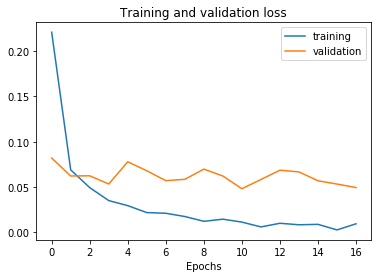

In [234]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
# plt.ylablel('Loss')
plt.legend(['training', 'validation'], loc = 'best')
plt.show()